In [1]:
import pandas as pd
import numpy as np

In [2]:
armstrong_data = []
prime_data = []
BASENAME = "V3_sub{}.xlsx"
ARMSTRONG_DIR = "./data/armstrong_dataset/"
PRIME_DIR = "./data/prime_dataset/"
NUM_SUBJECTS = 4

In [3]:
for sub in range(1,NUM_SUBJECTS+1):
    filename = ARMSTRONG_DIR + BASENAME.format(sub)
    armstrong_data.append(pd.read_excel(filename))
    filename = PRIME_DIR + BASENAME.format(sub)
    prime_data.append(pd.read_excel(filename))

In [3]:
#percent lines in sequence
def get_percent_lines_in_seq(data):
    data = np.array(data)
    count = 0
    last_line = 0
    total_lines = 0
    for line in data:
        if line[1]==0:
            continue
        if line[1] != last_line:
            total_lines += 1
        if line[1] == last_line+1:
            count += 1
        last_line = line[1]
    print(count, total_lines)
    return count, total_lines, count/total_lines

In [5]:
armstrong_perc_in_seq = []
prime_perc_in_seq = []
for sub in range(NUM_SUBJECTS):
    armstrong_perc_in_seq.append(get_percent_lines_in_seq(armstrong_data[sub]))
    prime_perc_in_seq.append(get_percent_lines_in_seq(prime_data[sub]))
print("Armstrong\nInSeq Total Percentage")
print(armstrong_perc_in_seq)
print("Prime\nInSeq Total Percentage")
print(prime_perc_in_seq)

199 746
106 390
128 645
57 212
85 283
137 364
162 516
155 498
Armstrong
InSeq Total Percentage
[(199, 746, 0.2667560321715818), (128, 645, 0.19844961240310077), (85, 283, 0.3003533568904594), (162, 516, 0.313953488372093)]
Prime
InSeq Total Percentage
[(106, 390, 0.2717948717948718), (57, 212, 0.2688679245283019), (137, 364, 0.37637362637362637), (155, 498, 0.3112449799196787)]


In [4]:
def get_seq_map(data):
    data = np.array(data)
    counts = {}
    last_line = 0
    total_lines = 0
    for line in data:
        if line[0]==0:
            continue
        if line[1] != last_line:
            total_lines += 1
        if line[1] == last_line+1:
            if line[1] not in counts:
                counts[line[1]] = 0
            counts[line[1]] += 1
        last_line = line[1]
    return counts, total_lines

In [7]:
armstrong_seq_maps = []
prime_seq_maps = []
for sub in range(NUM_SUBJECTS):
    armstrong_seq_maps.append(get_seq_map(armstrong_data[sub]))
    prime_seq_maps.append(get_seq_map(prime_data[sub]))

In [8]:
LINES_ARMSTRONG = 32
LINES_PRIME = 41
armstrong_tok_analysis = []
prime_tok_analysis = []

for m, total in armstrong_seq_maps:
    armstrong_line_ct = np.zeros(LINES_ARMSTRONG)
    for k,v in m.items():
        armstrong_line_ct[k] = v/total
    armstrong_tok_analysis.append(armstrong_line_ct)
for m, total in prime_seq_maps:
    prime_line_ct = np.zeros(LINES_PRIME)
    for k,v in m.items():
        prime_line_ct[k] = v/total
    prime_tok_analysis.append(prime_line_ct)
armstrong_tok_analysis, prime_tok_analysis

([array([ 0.        ,  0.00158983,  0.00079491,  0.00238474,  0.00317965,
          0.        ,  0.        ,  0.00556439,  0.01192369,  0.00158983,
          0.00476948,  0.00397456,  0.01351351,  0.00476948,  0.        ,
          0.        ,  0.00238474,  0.0063593 ,  0.01589825,  0.01351351,
          0.        ,  0.00079491,  0.00079491,  0.        ,  0.00079491,
          0.00079491,  0.        ,  0.        ,  0.        ,  0.00079491,
          0.00476948,  0.00794913]),
  array([ 0.        ,  0.00642792,  0.00275482,  0.00367309,  0.00183655,
          0.        ,  0.        ,  0.00367309,  0.00642792,  0.00275482,
          0.00275482,  0.00826446,  0.00642792,  0.00091827,  0.        ,
          0.        ,  0.        ,  0.00091827,  0.00091827,  0.        ,
          0.        ,  0.        ,  0.00367309,  0.        ,  0.00091827,
          0.00091827,  0.00091827,  0.        ,  0.00918274,  0.01285583,
          0.00367309,  0.        ]),
  array([ 0.        ,  0.00606061,  0.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

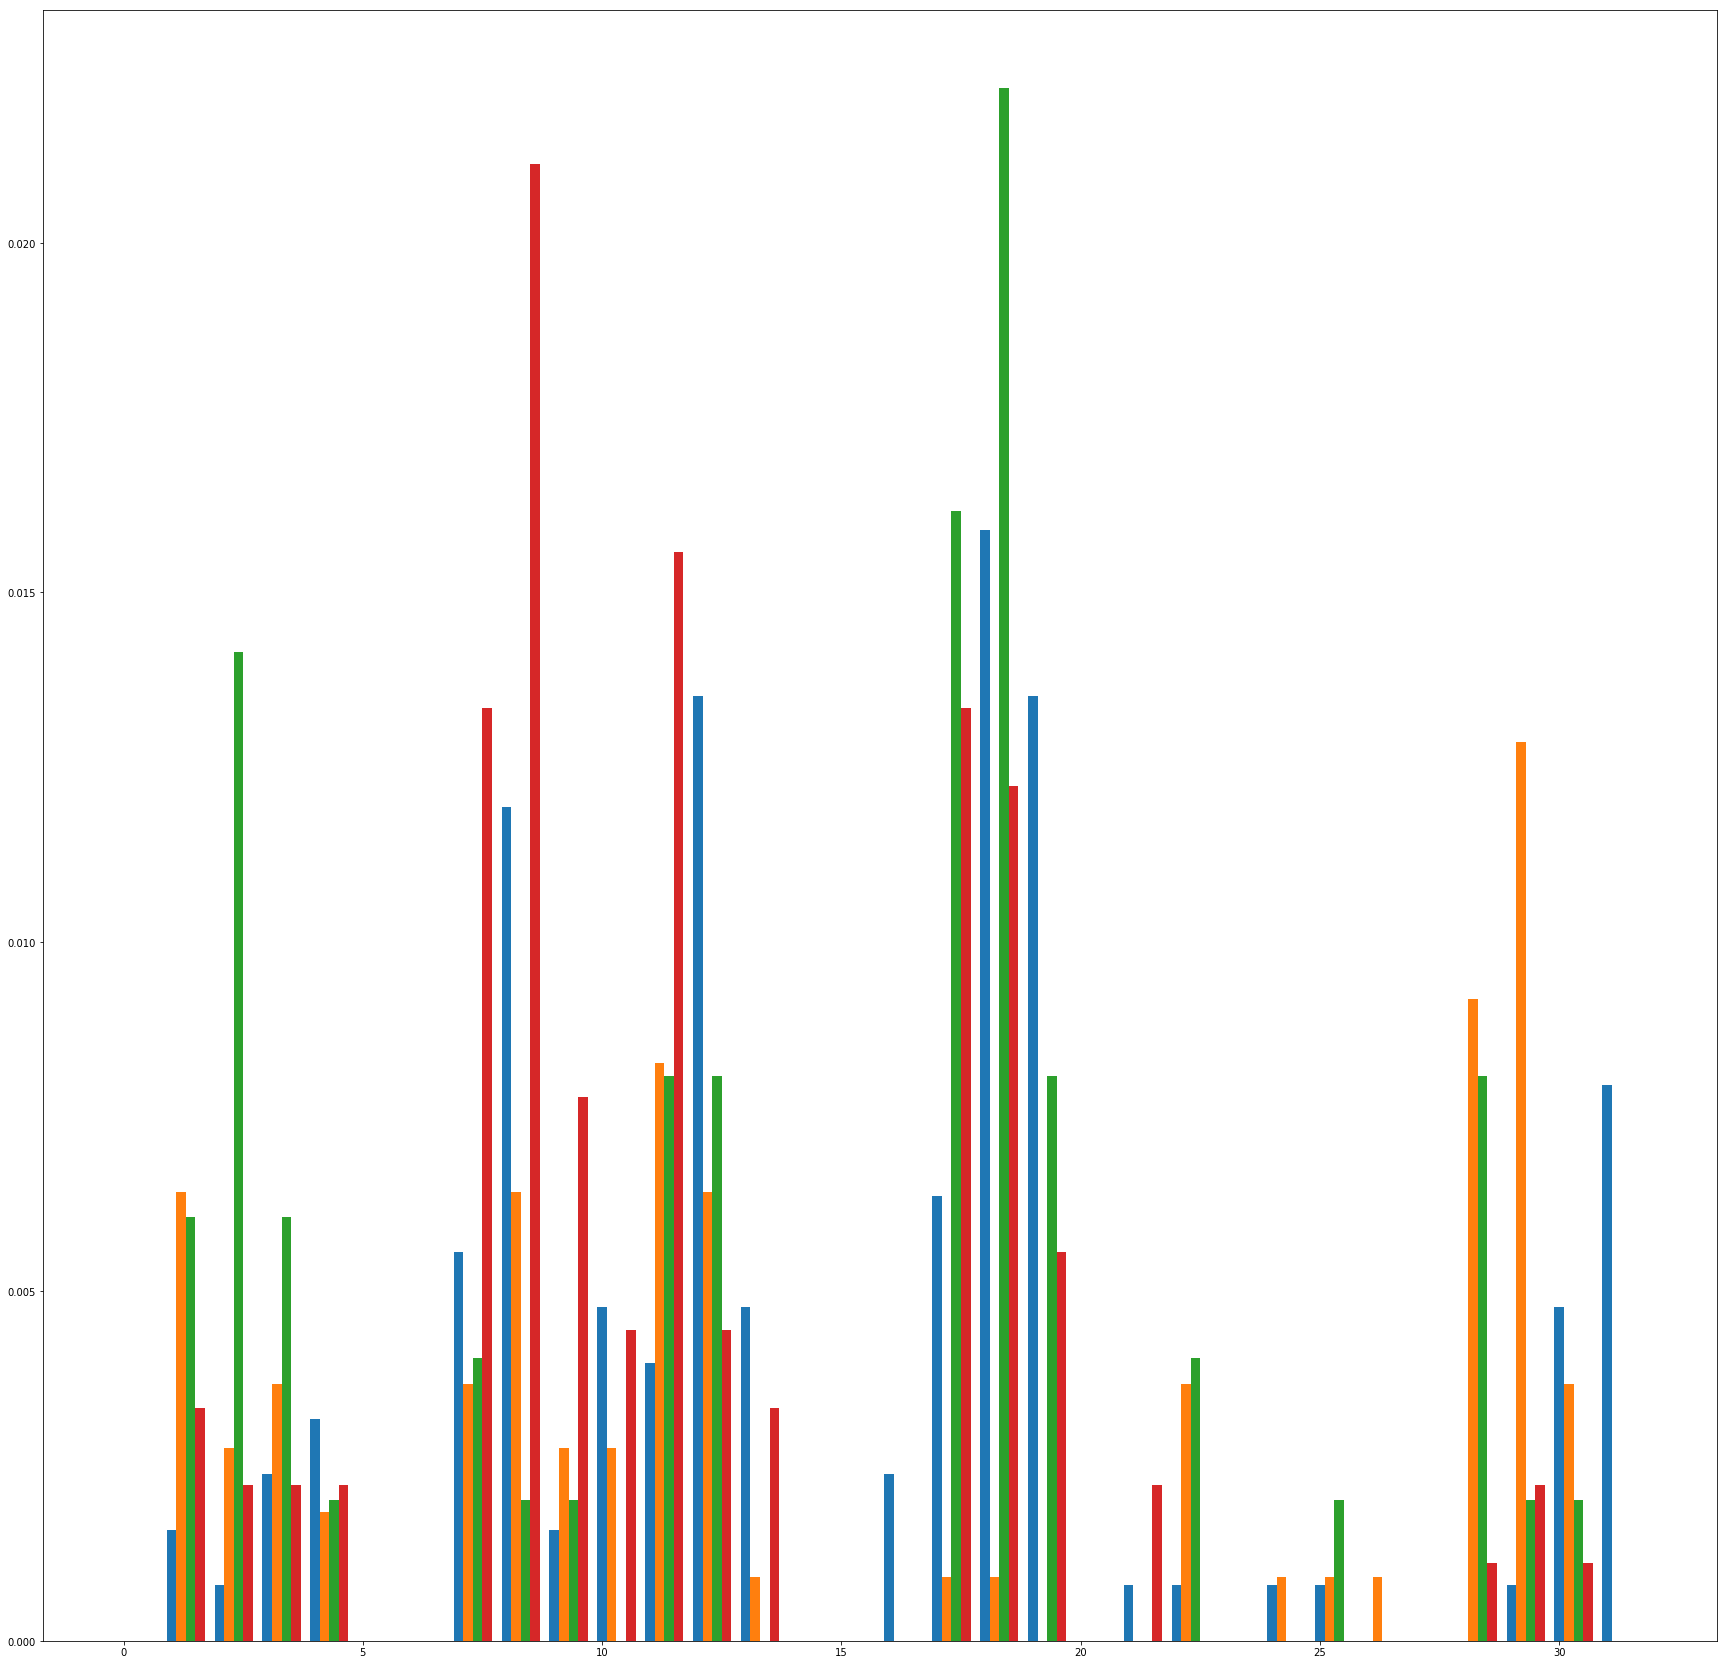

In [10]:
plt.figure(figsize=(30,30))
for sub in range(NUM_SUBJECTS):
    plt.bar(np.arange(LINES_ARMSTRONG)+sub*0.2,armstrong_tok_analysis[sub],width=0.2)

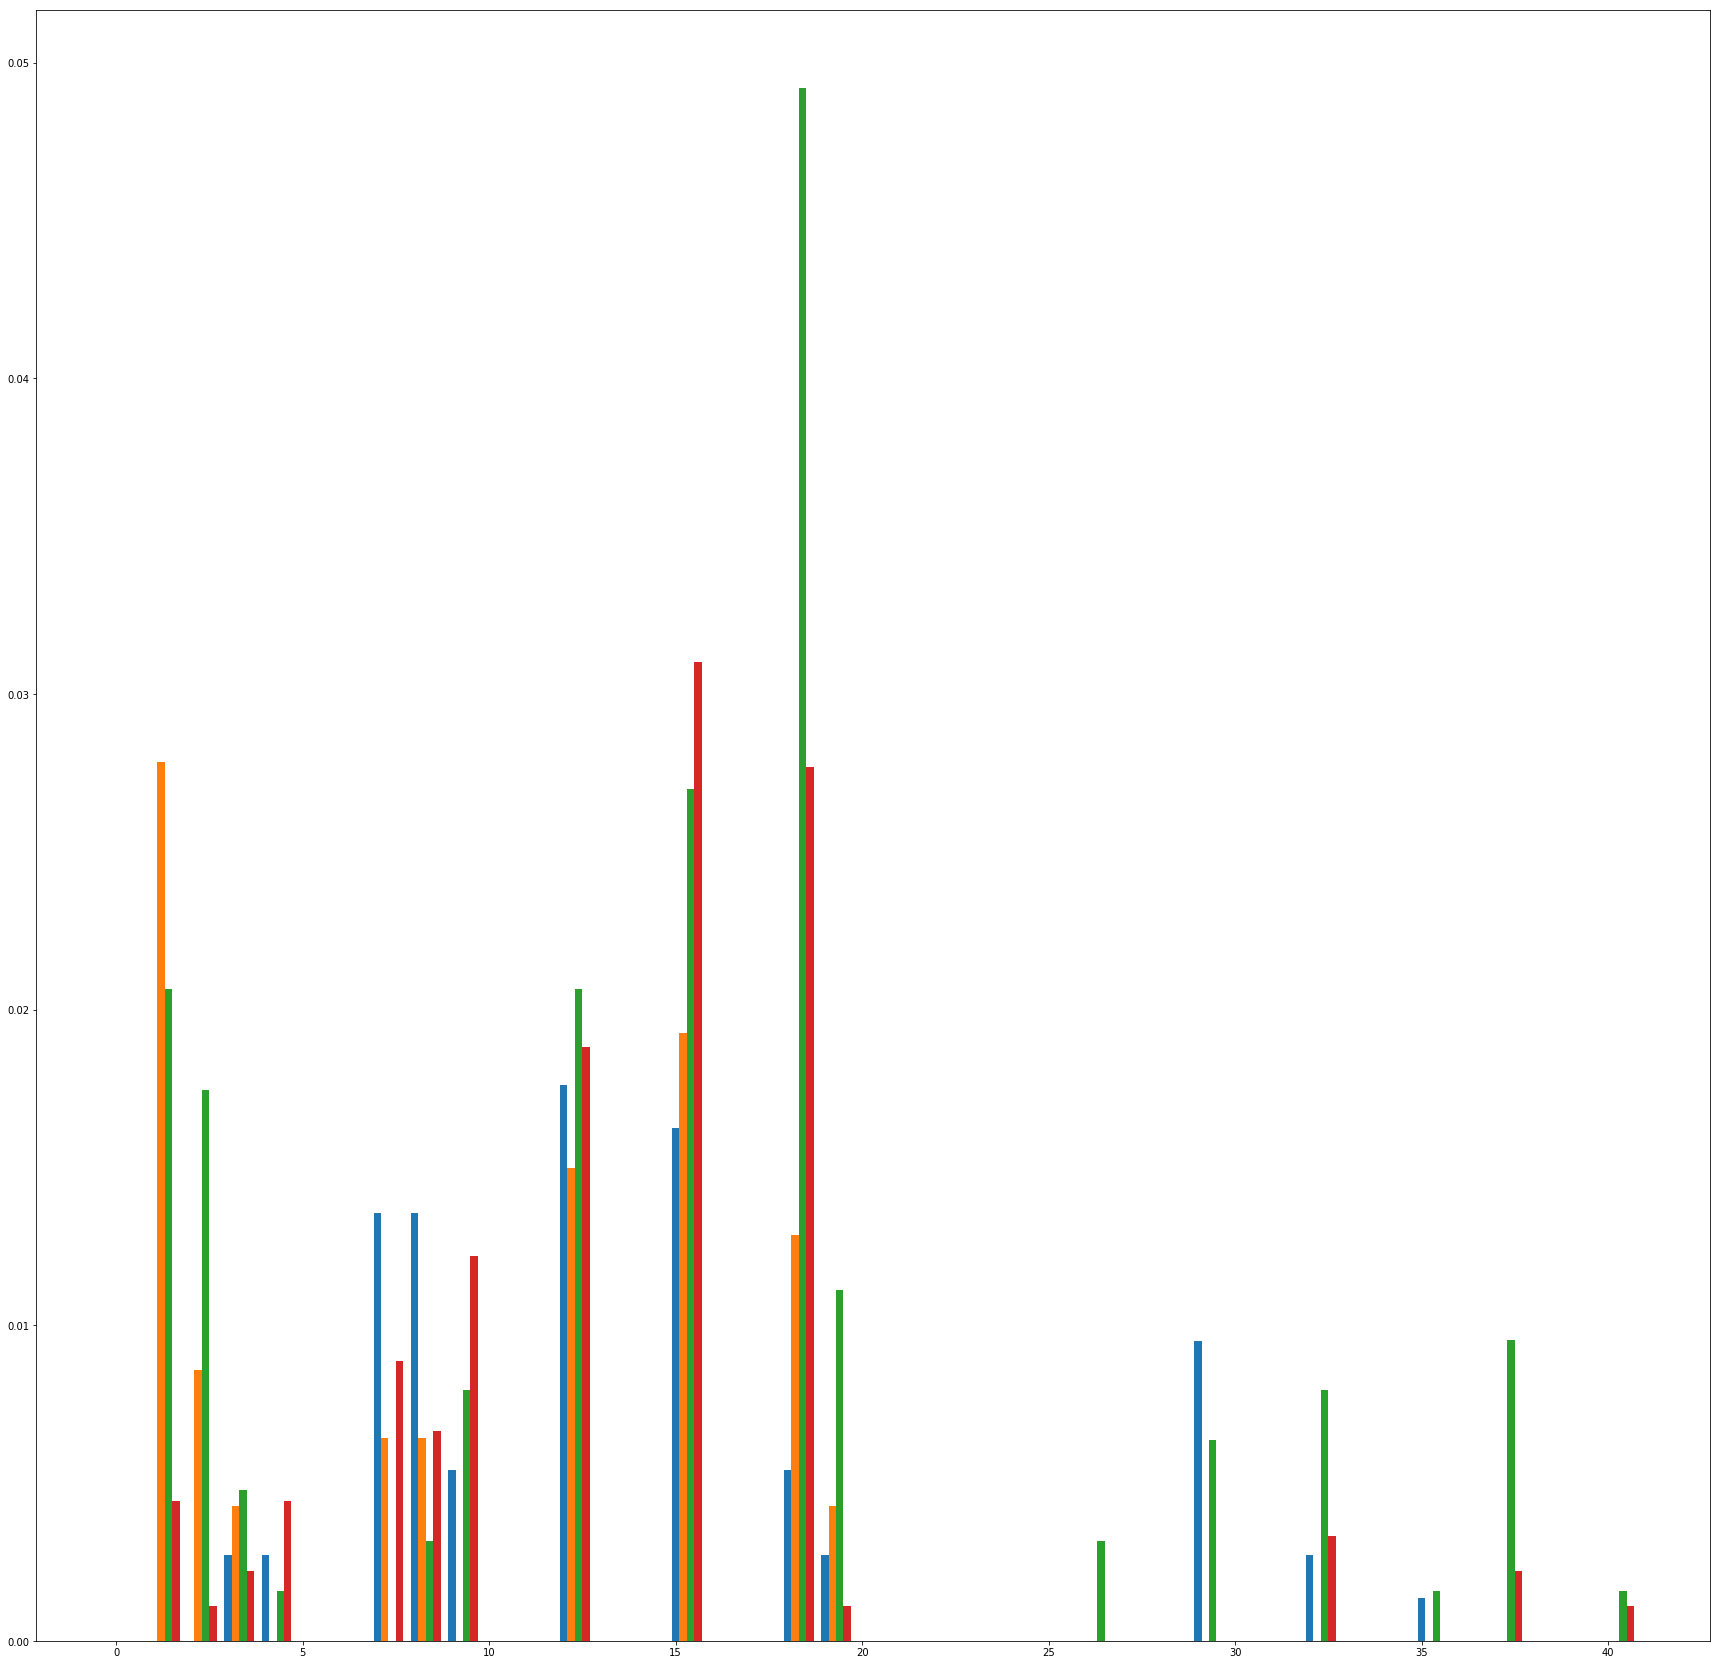

In [11]:
plt.figure(figsize=(30,30))
for sub in range(NUM_SUBJECTS):
    plt.bar(np.arange(LINES_PRIME)+sub*0.2,prime_tok_analysis[sub],width=0.2)

In [6]:
def get_gaze_time(data):
    data = np.array(data)
    last_line = 0
    gaze = 0
    ans = []
    for line in data:
        if line[1] == 0:
            continue
        if line[1] != last_line:
            ans.append((last_line,gaze))
            last_line = line[1]
            gaze = line[5] - line[4] + 1
        else:
            gaze += line[5] - line[4] + 1
    ans.append((last_line,gaze))
    return ans[1:]

In [13]:
armstrong_gaze_times = []
prime_gaze_times = []
for sub in range(NUM_SUBJECTS):
    armstrong_gaze_times.append(get_gaze_time(armstrong_data[sub]))
    prime_gaze_times.append(get_gaze_time(prime_data[sub]))

In [14]:
armstrong_gaze_times, prime_gaze_times

([[(2, 1),
   (3, 1),
   (2, 1),
   (3, 1),
   (2, 1),
   (1, 126),
   (2, 1),
   (1, 1),
   (3, 435),
   (7, 62),
   (8, 1),
   (6, 1),
   (7, 218),
   (16, 1),
   (28, 1),
   (25, 1),
   (4, 94),
   (3, 1),
   (4, 65),
   (3, 1),
   (2, 1),
   (1, 2),
   (4, 1),
   (3, 132),
   (4, 31),
   (3, 94),
   (4, 33),
   (2, 1),
   (3, 277),
   (4, 1),
   (3, 1),
   (7, 156),
   (8, 1),
   (3, 1),
   (4, 1),
   (3, 226),
   (7, 279),
   (6, 32),
   (7, 33),
   (8, 1),
   (7, 33),
   (8, 1),
   (7, 33),
   (8, 2),
   (7, 184),
   (6, 2),
   (7, 1),
   (8, 1),
   (7, 307),
   (8, 34),
   (7, 1),
   (8, 91),
   (7, 310),
   (8, 33),
   (10, 1),
   (8, 2),
   (12, 124),
   (11, 1),
   (12, 1),
   (11, 30),
   (12, 62),
   (13, 62),
   (9, 2),
   (10, 1),
   (9, 2),
   (10, 61),
   (9, 32),
   (10, 32),
   (8, 4),
   (7, 152),
   (10, 2),
   (11, 2),
   (12, 2),
   (11, 31),
   (12, 1),
   (11, 1),
   (12, 32),
   (11, 1),
   (12, 91),
   (11, 1),
   (12, 124),
   (13, 1),
   (12, 93),
   (13, 34

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
IMP_LINES_ARMSTRONG = [11,12,13,16,17,18,19,29,30]
IMP_LINES_PRIME = [9,12,15,18,19,31,33,35]

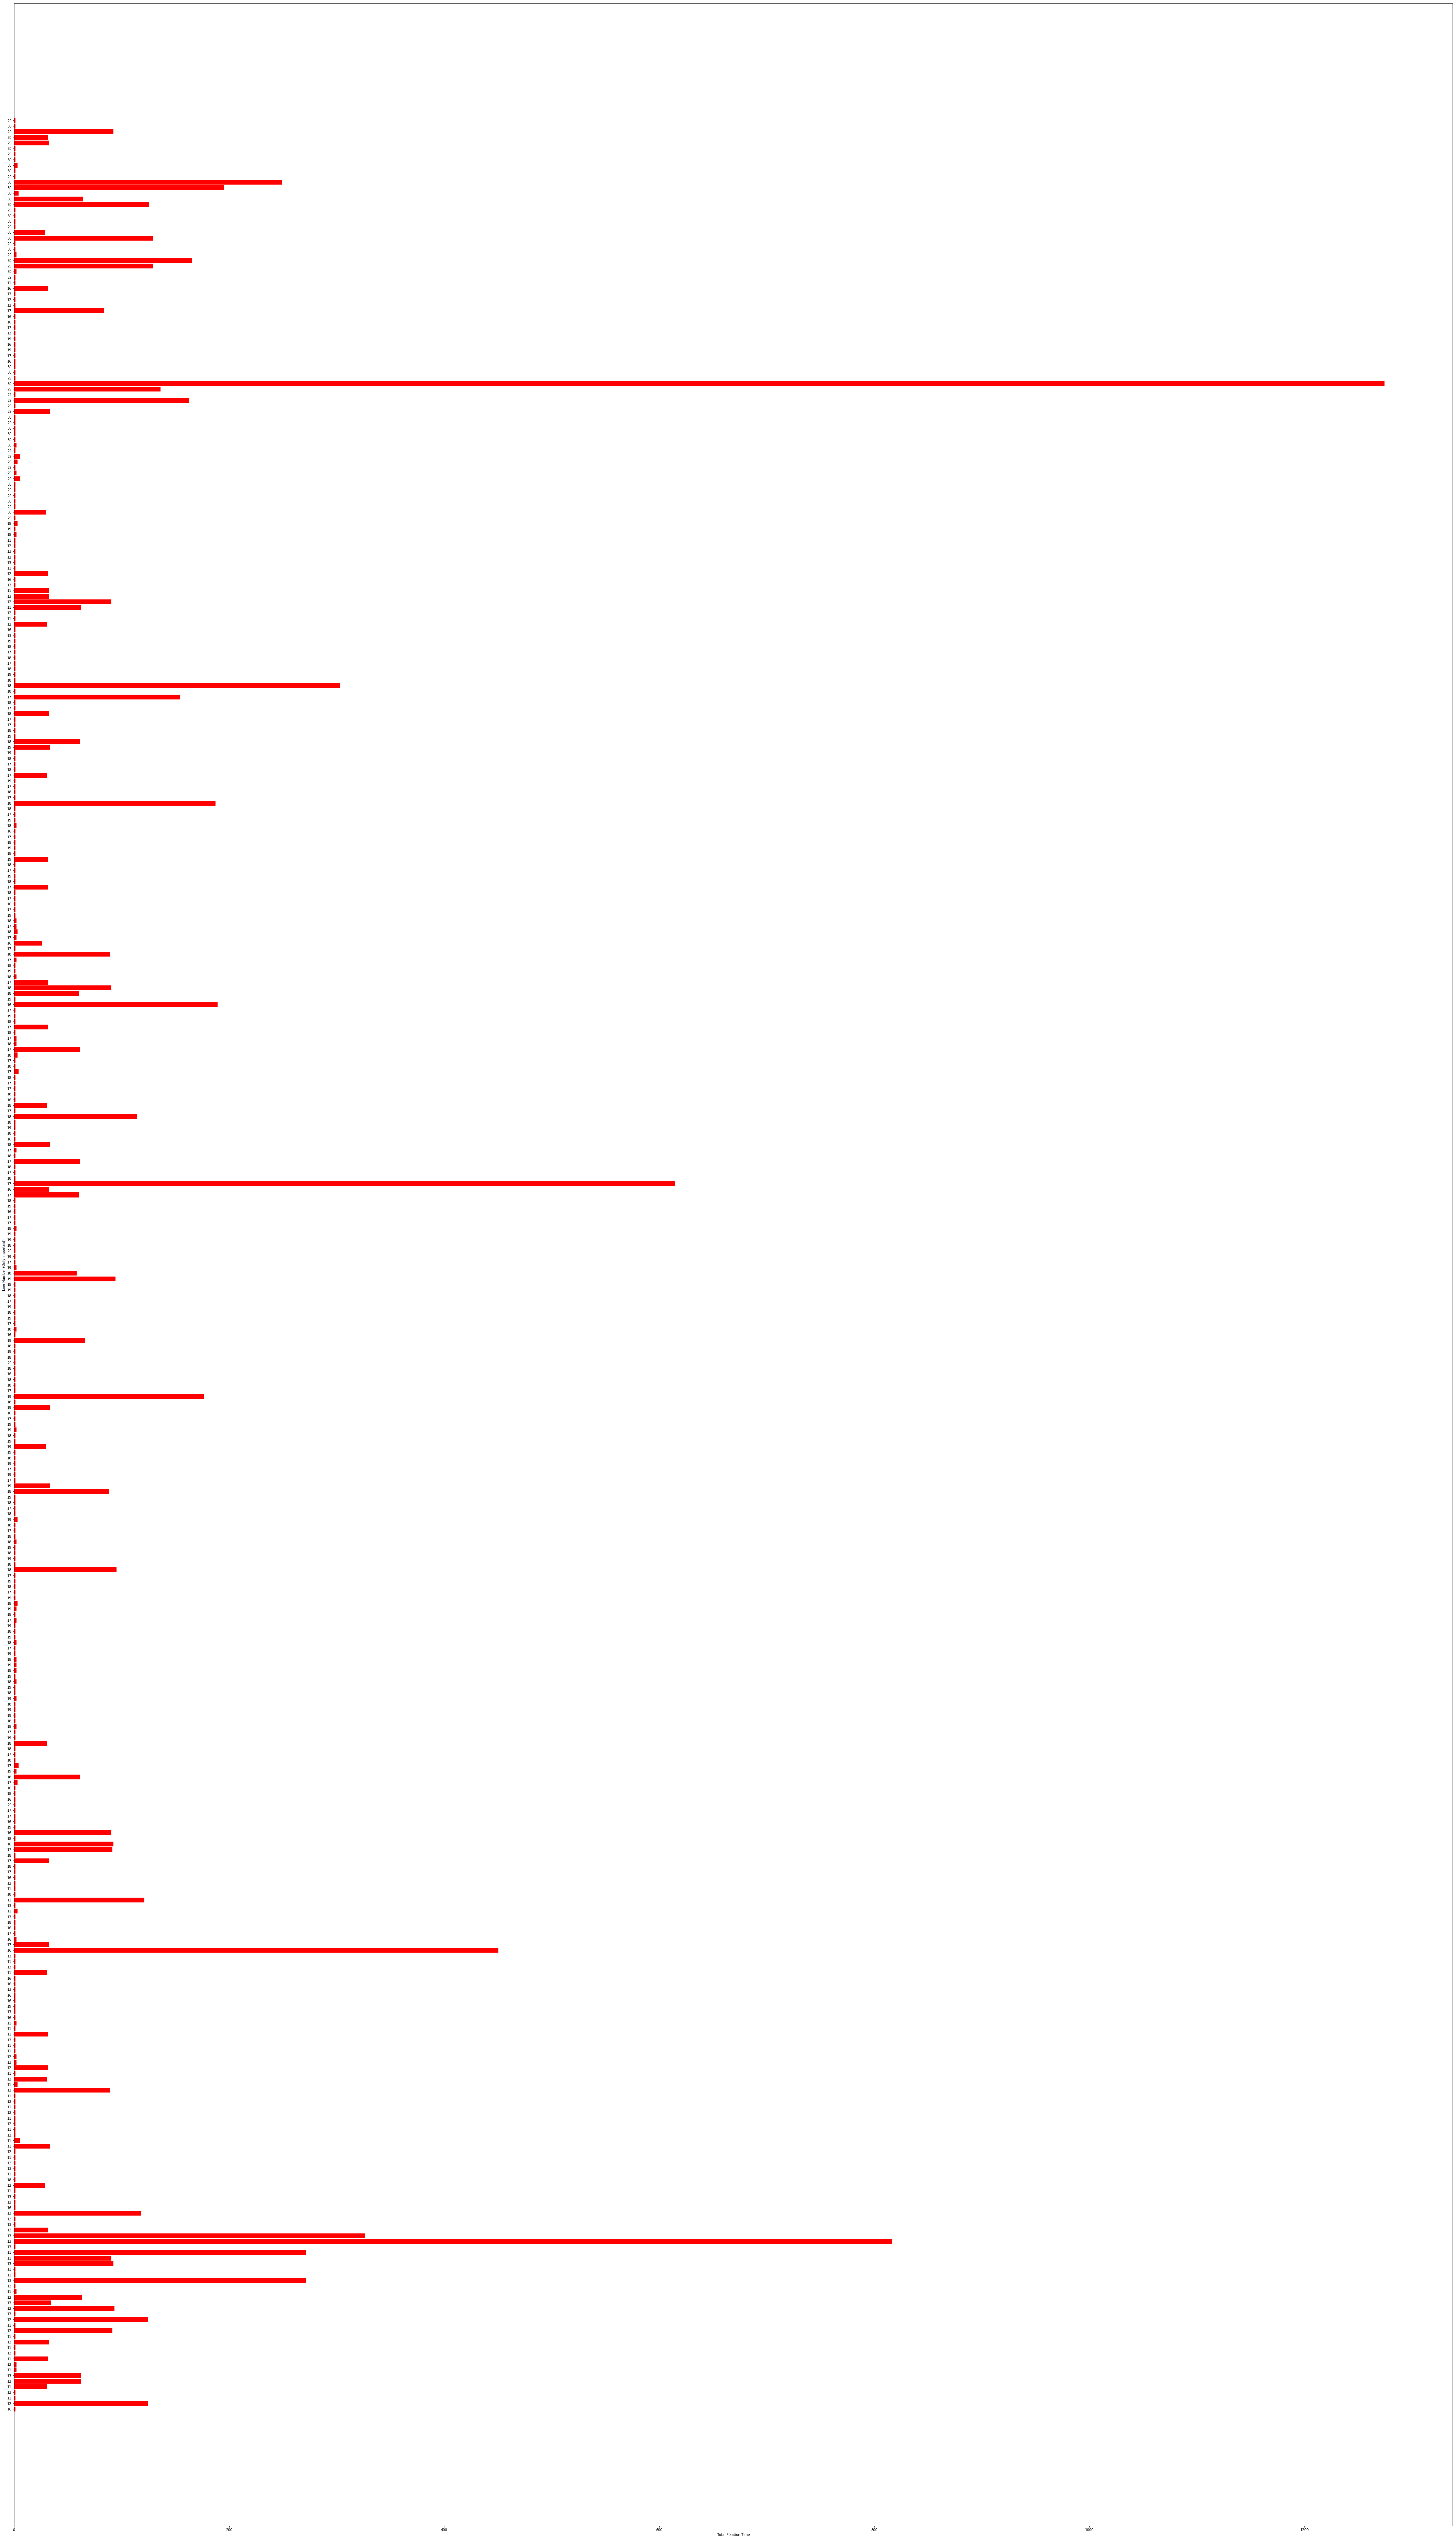

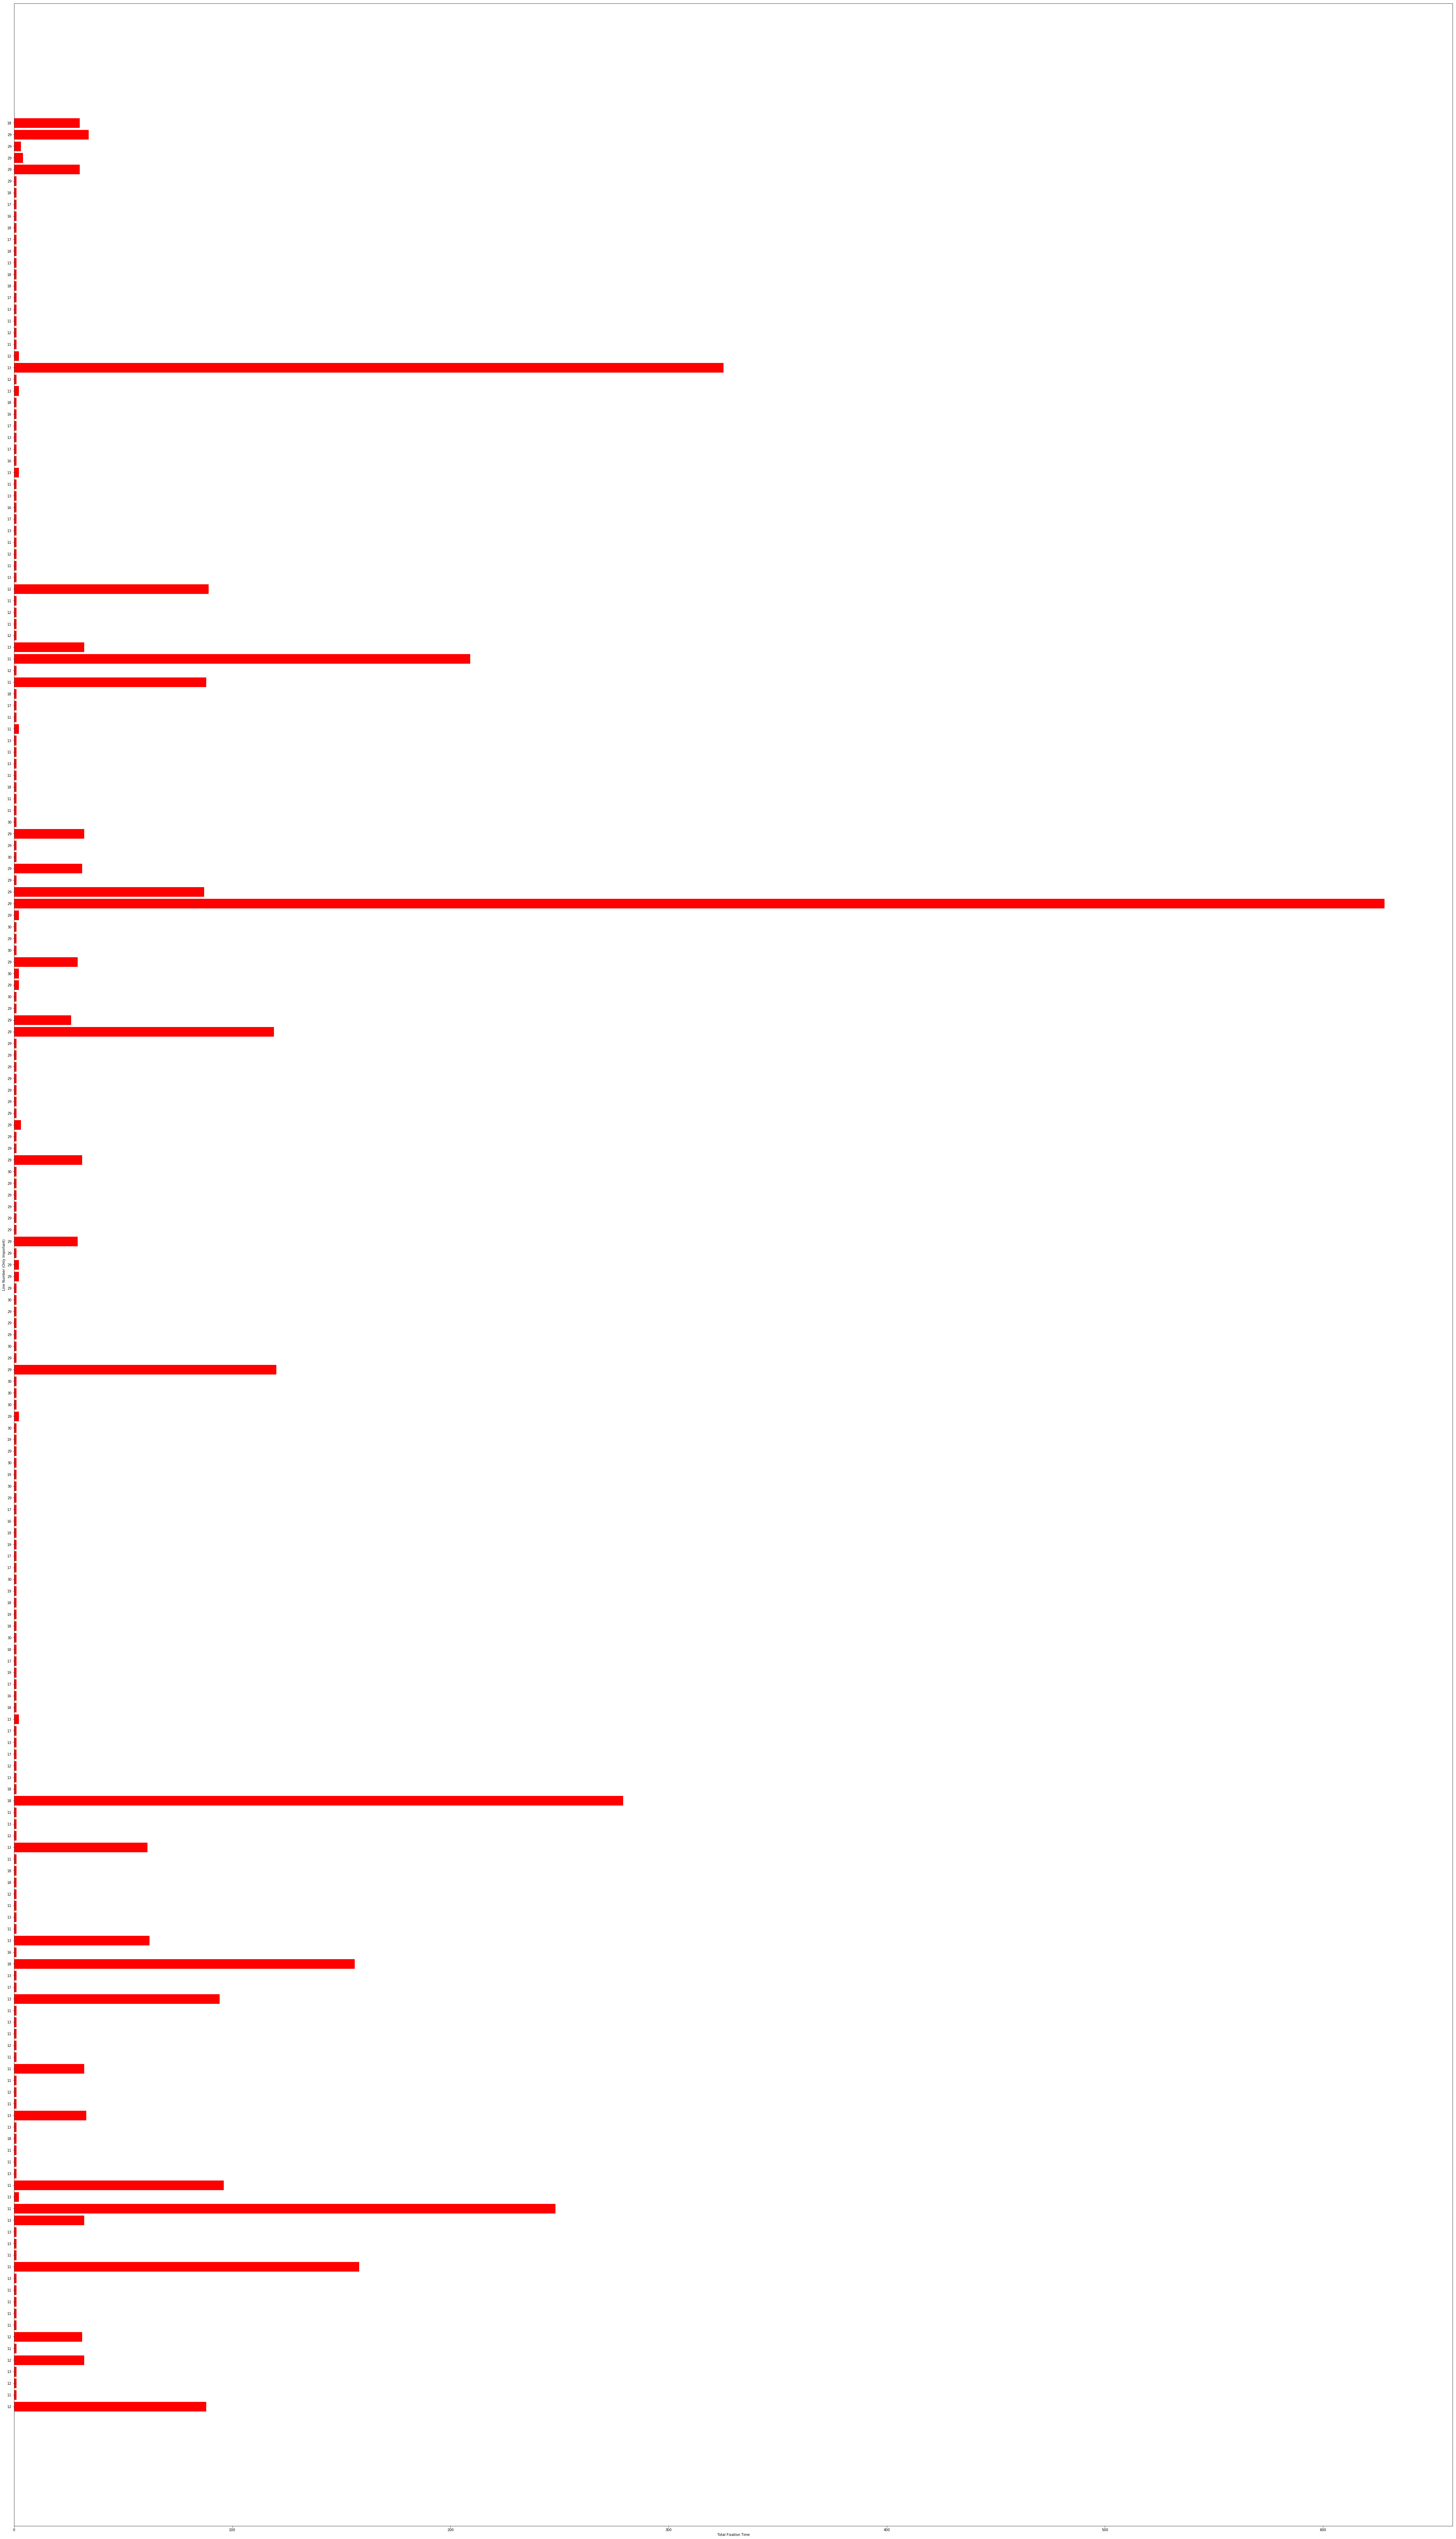

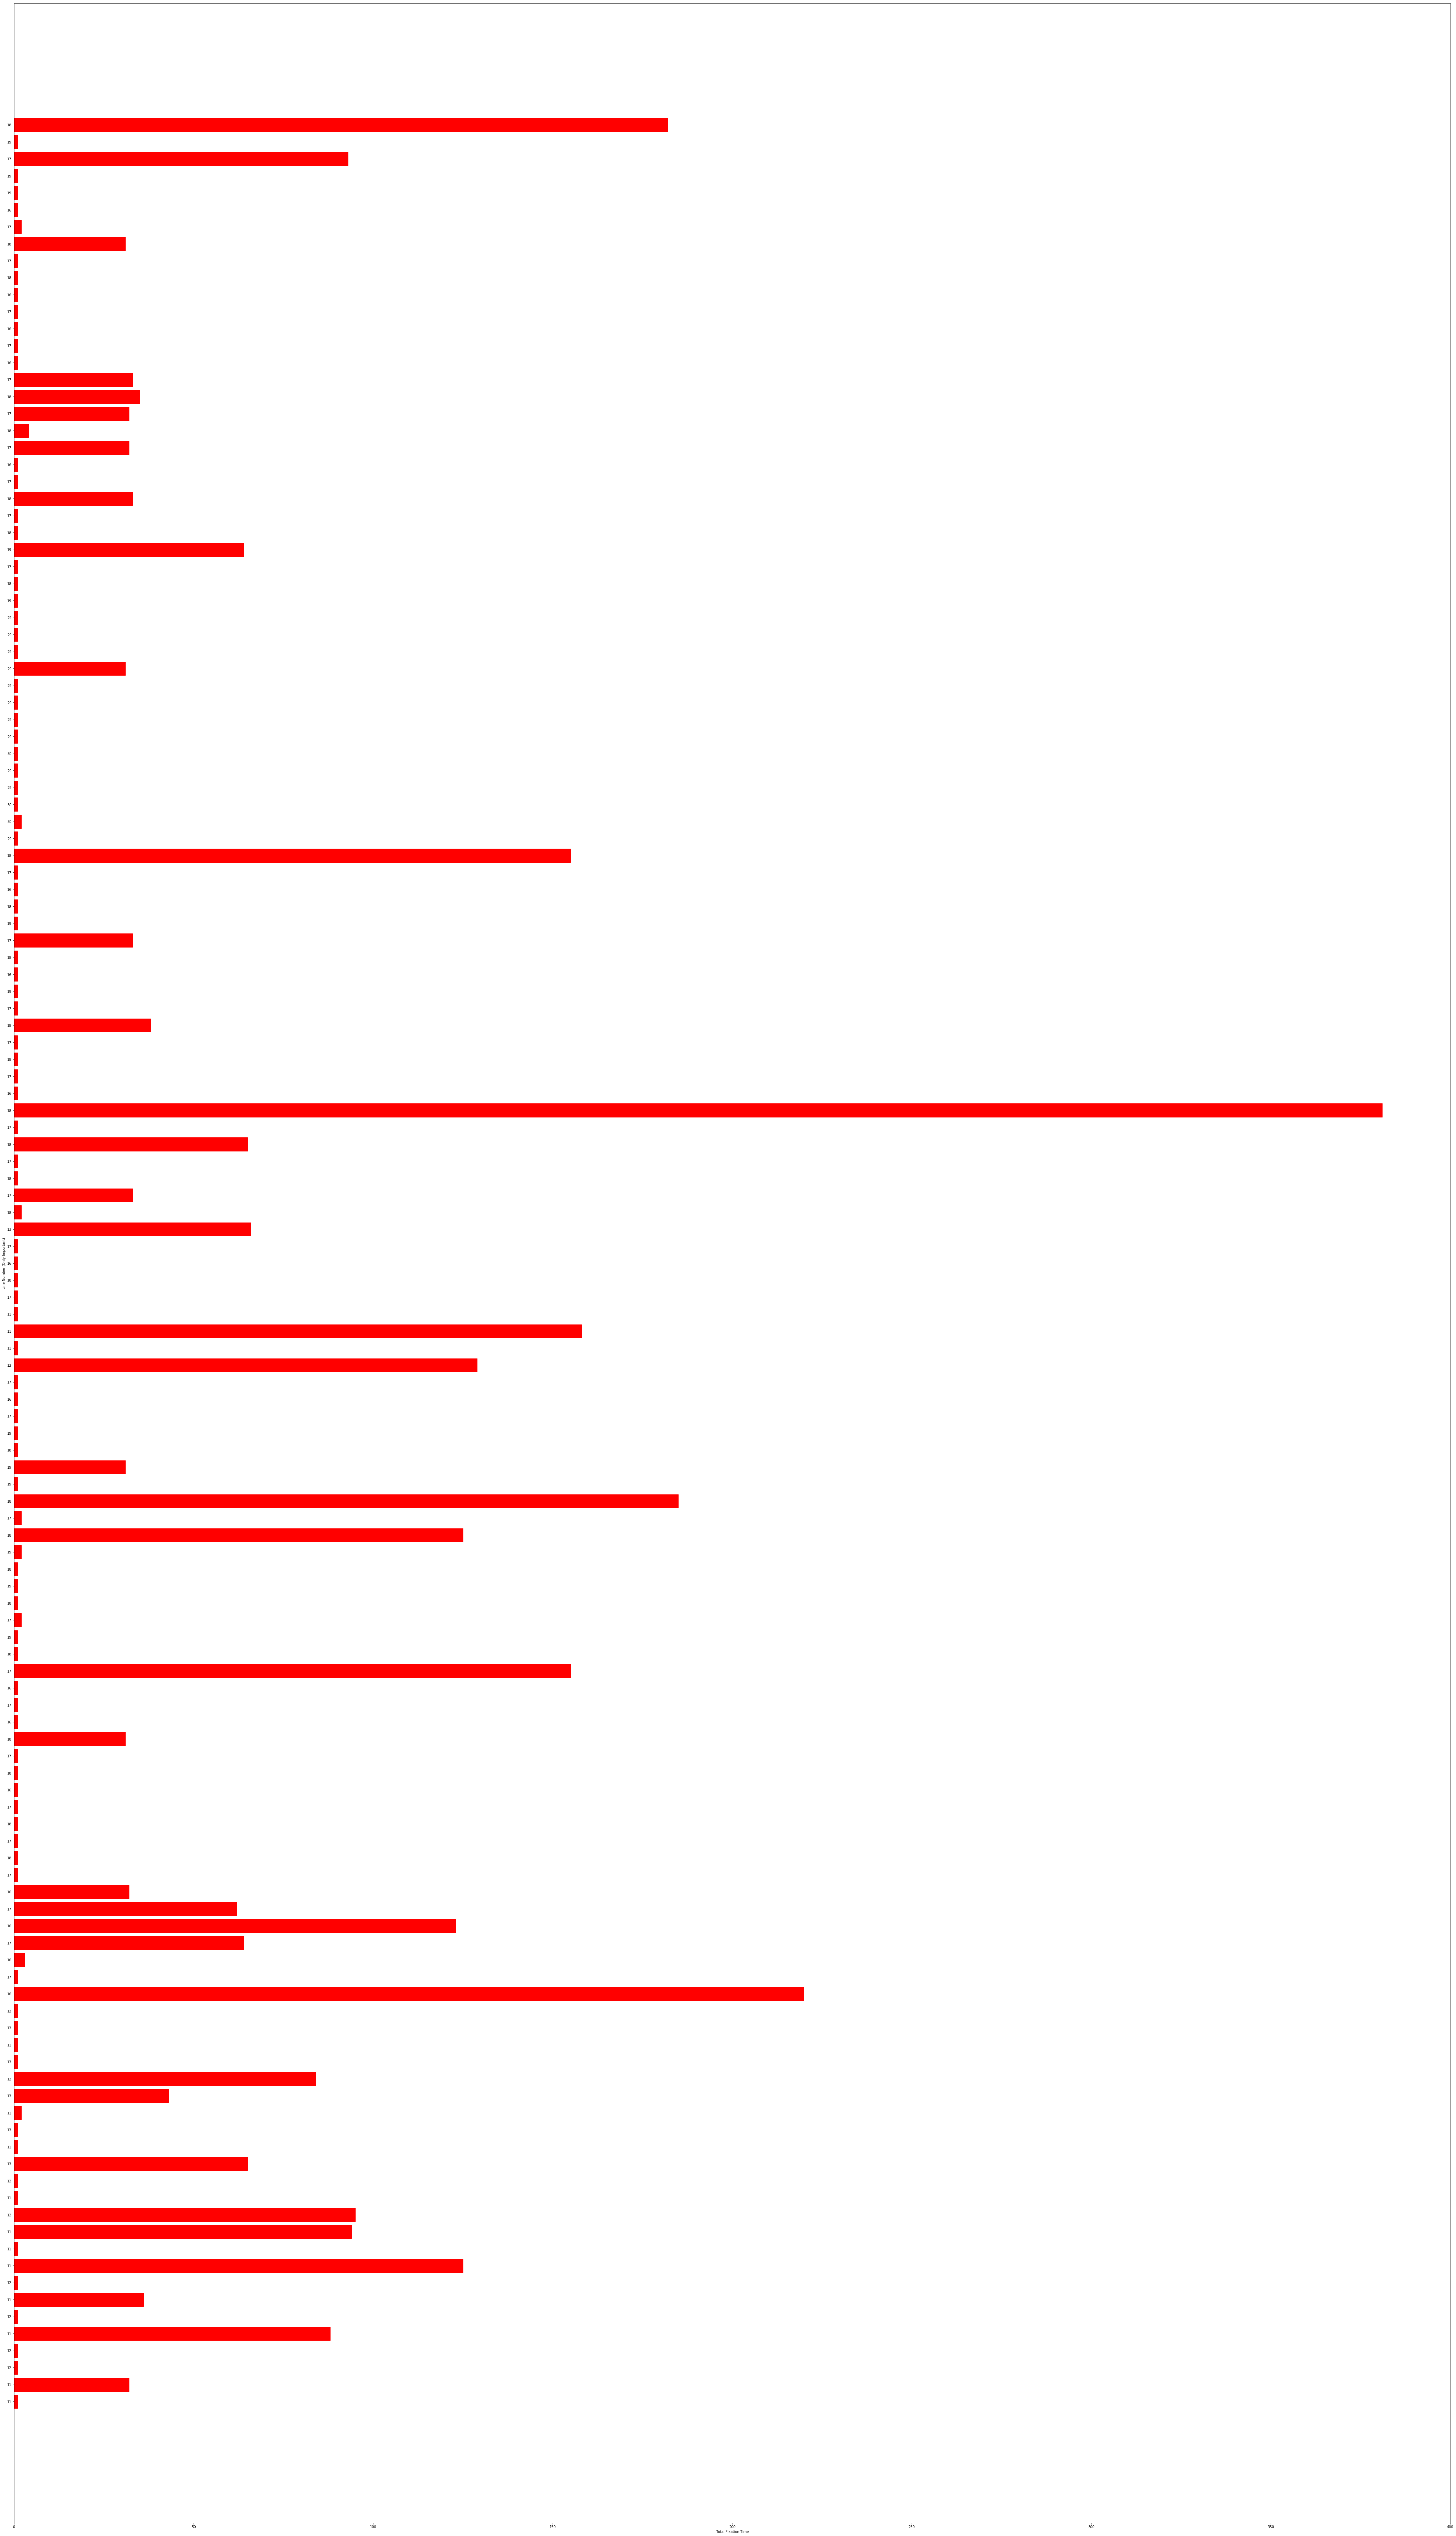

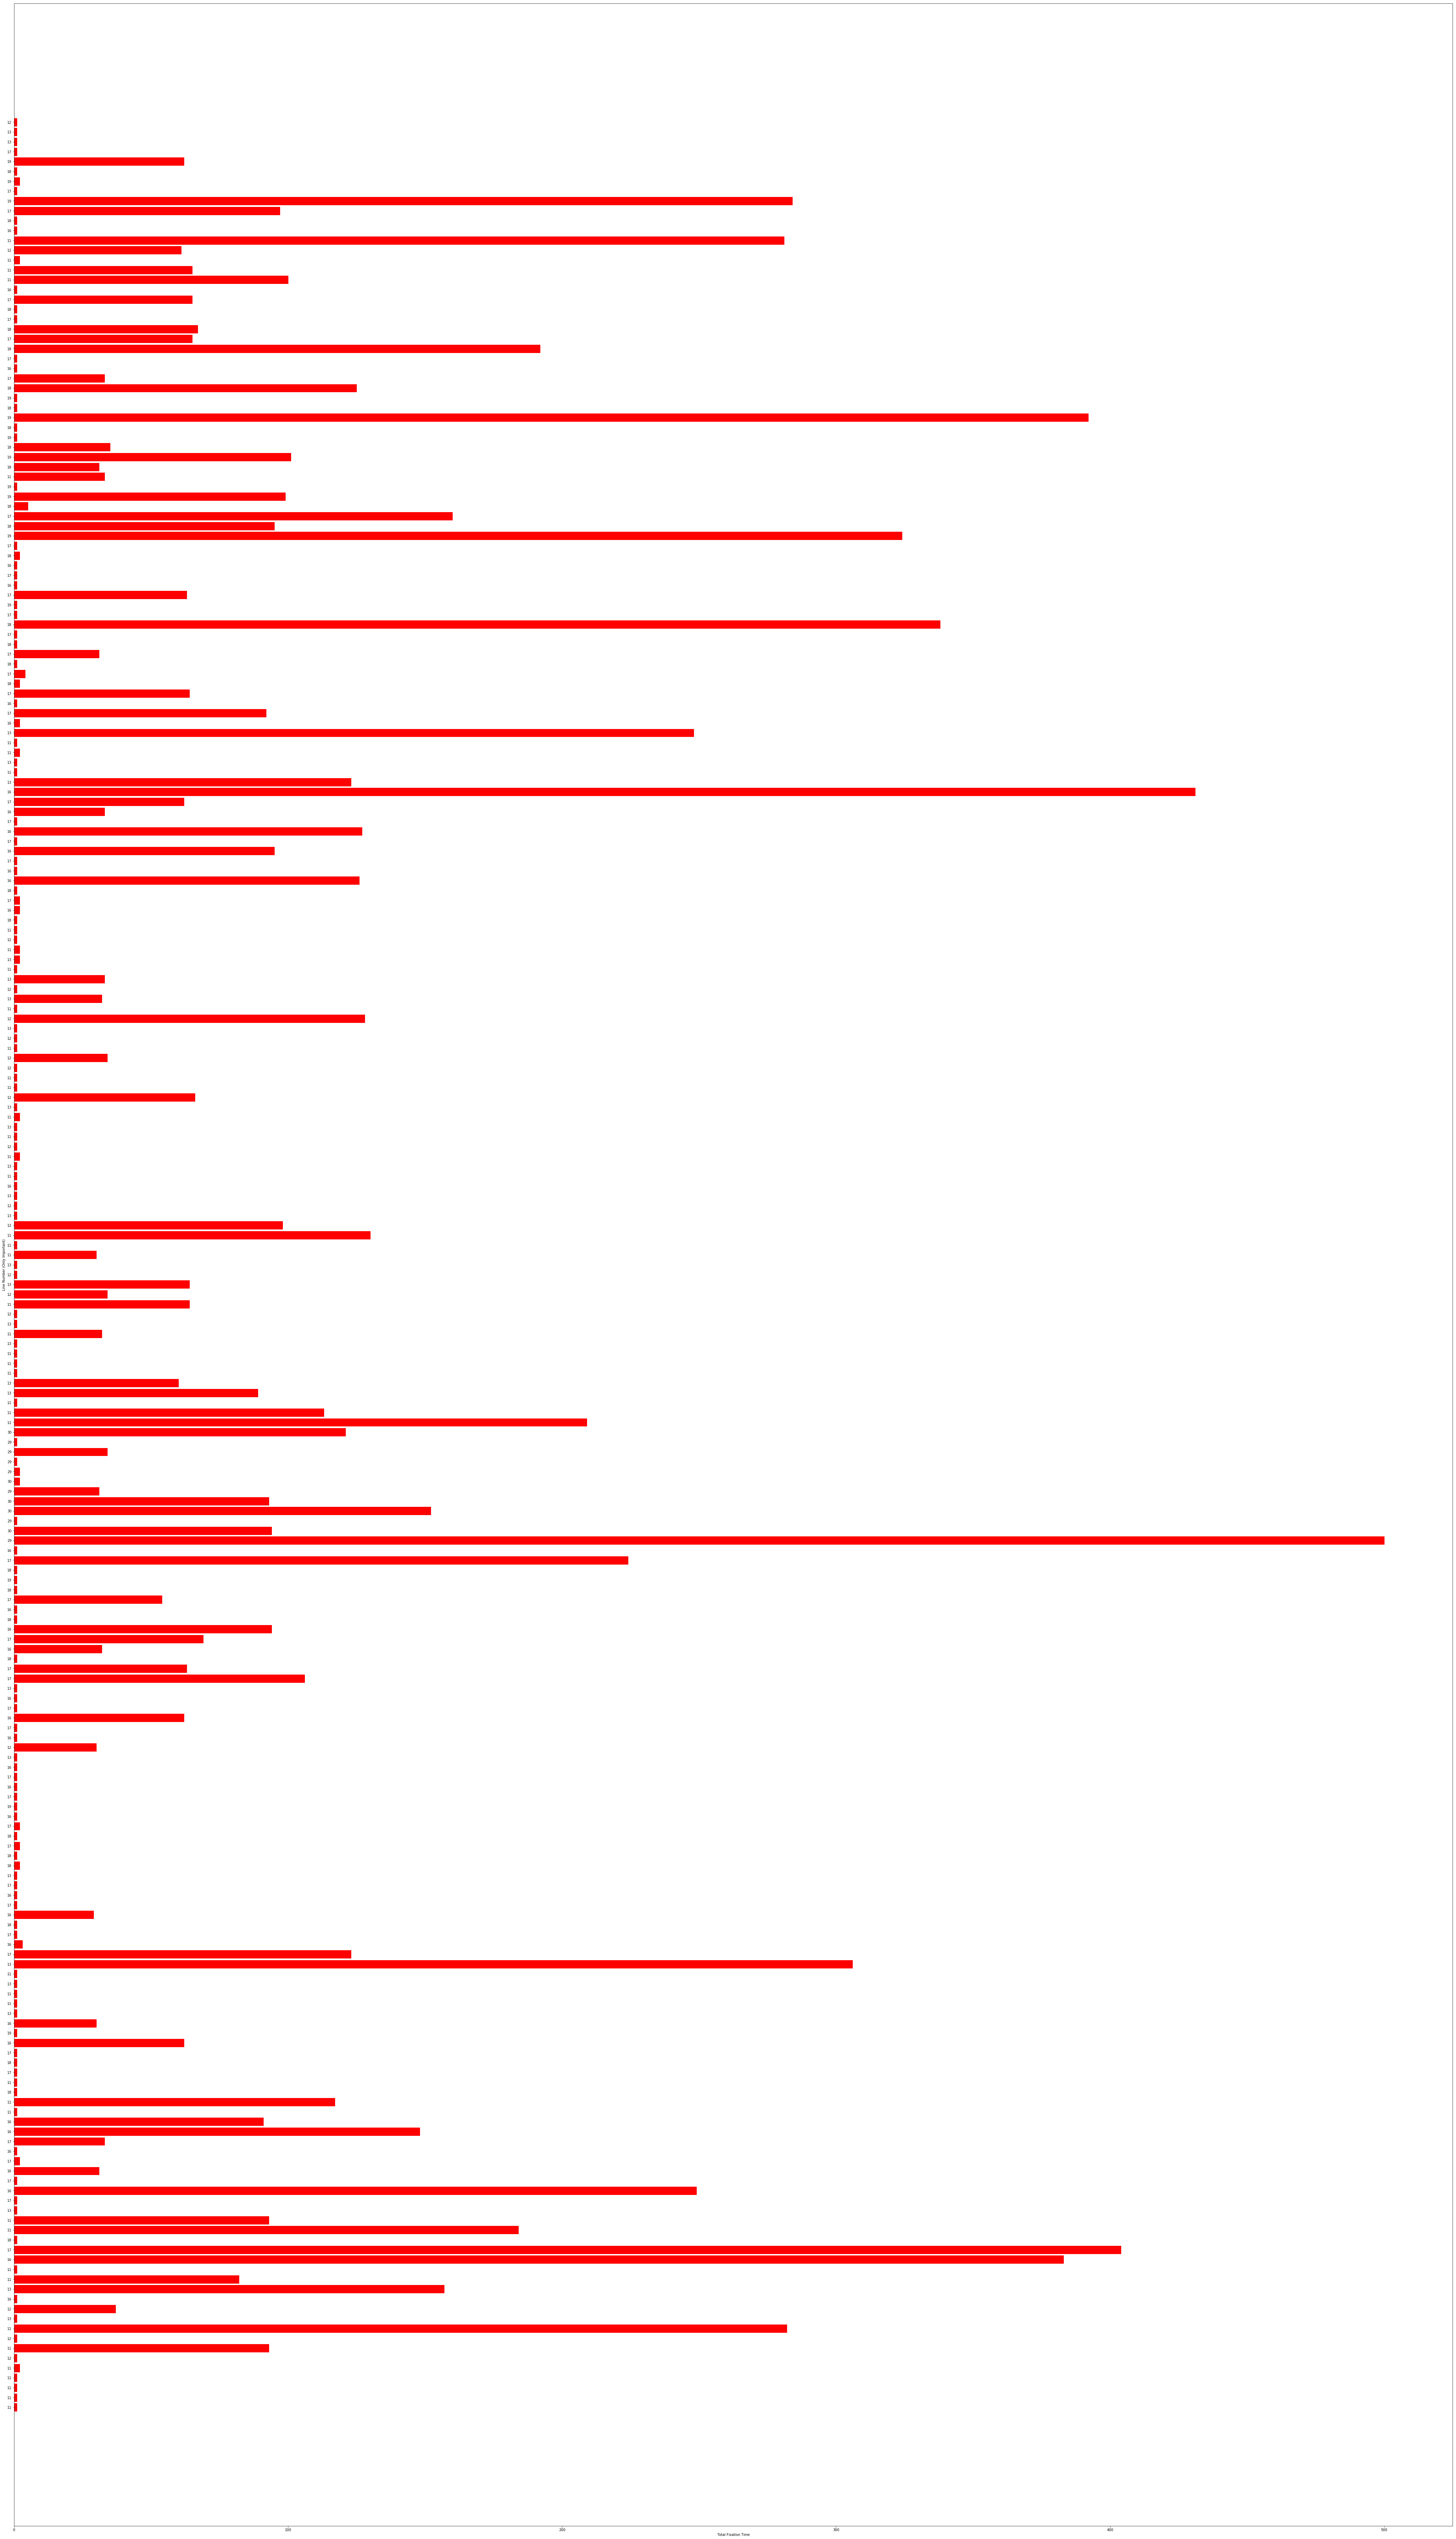

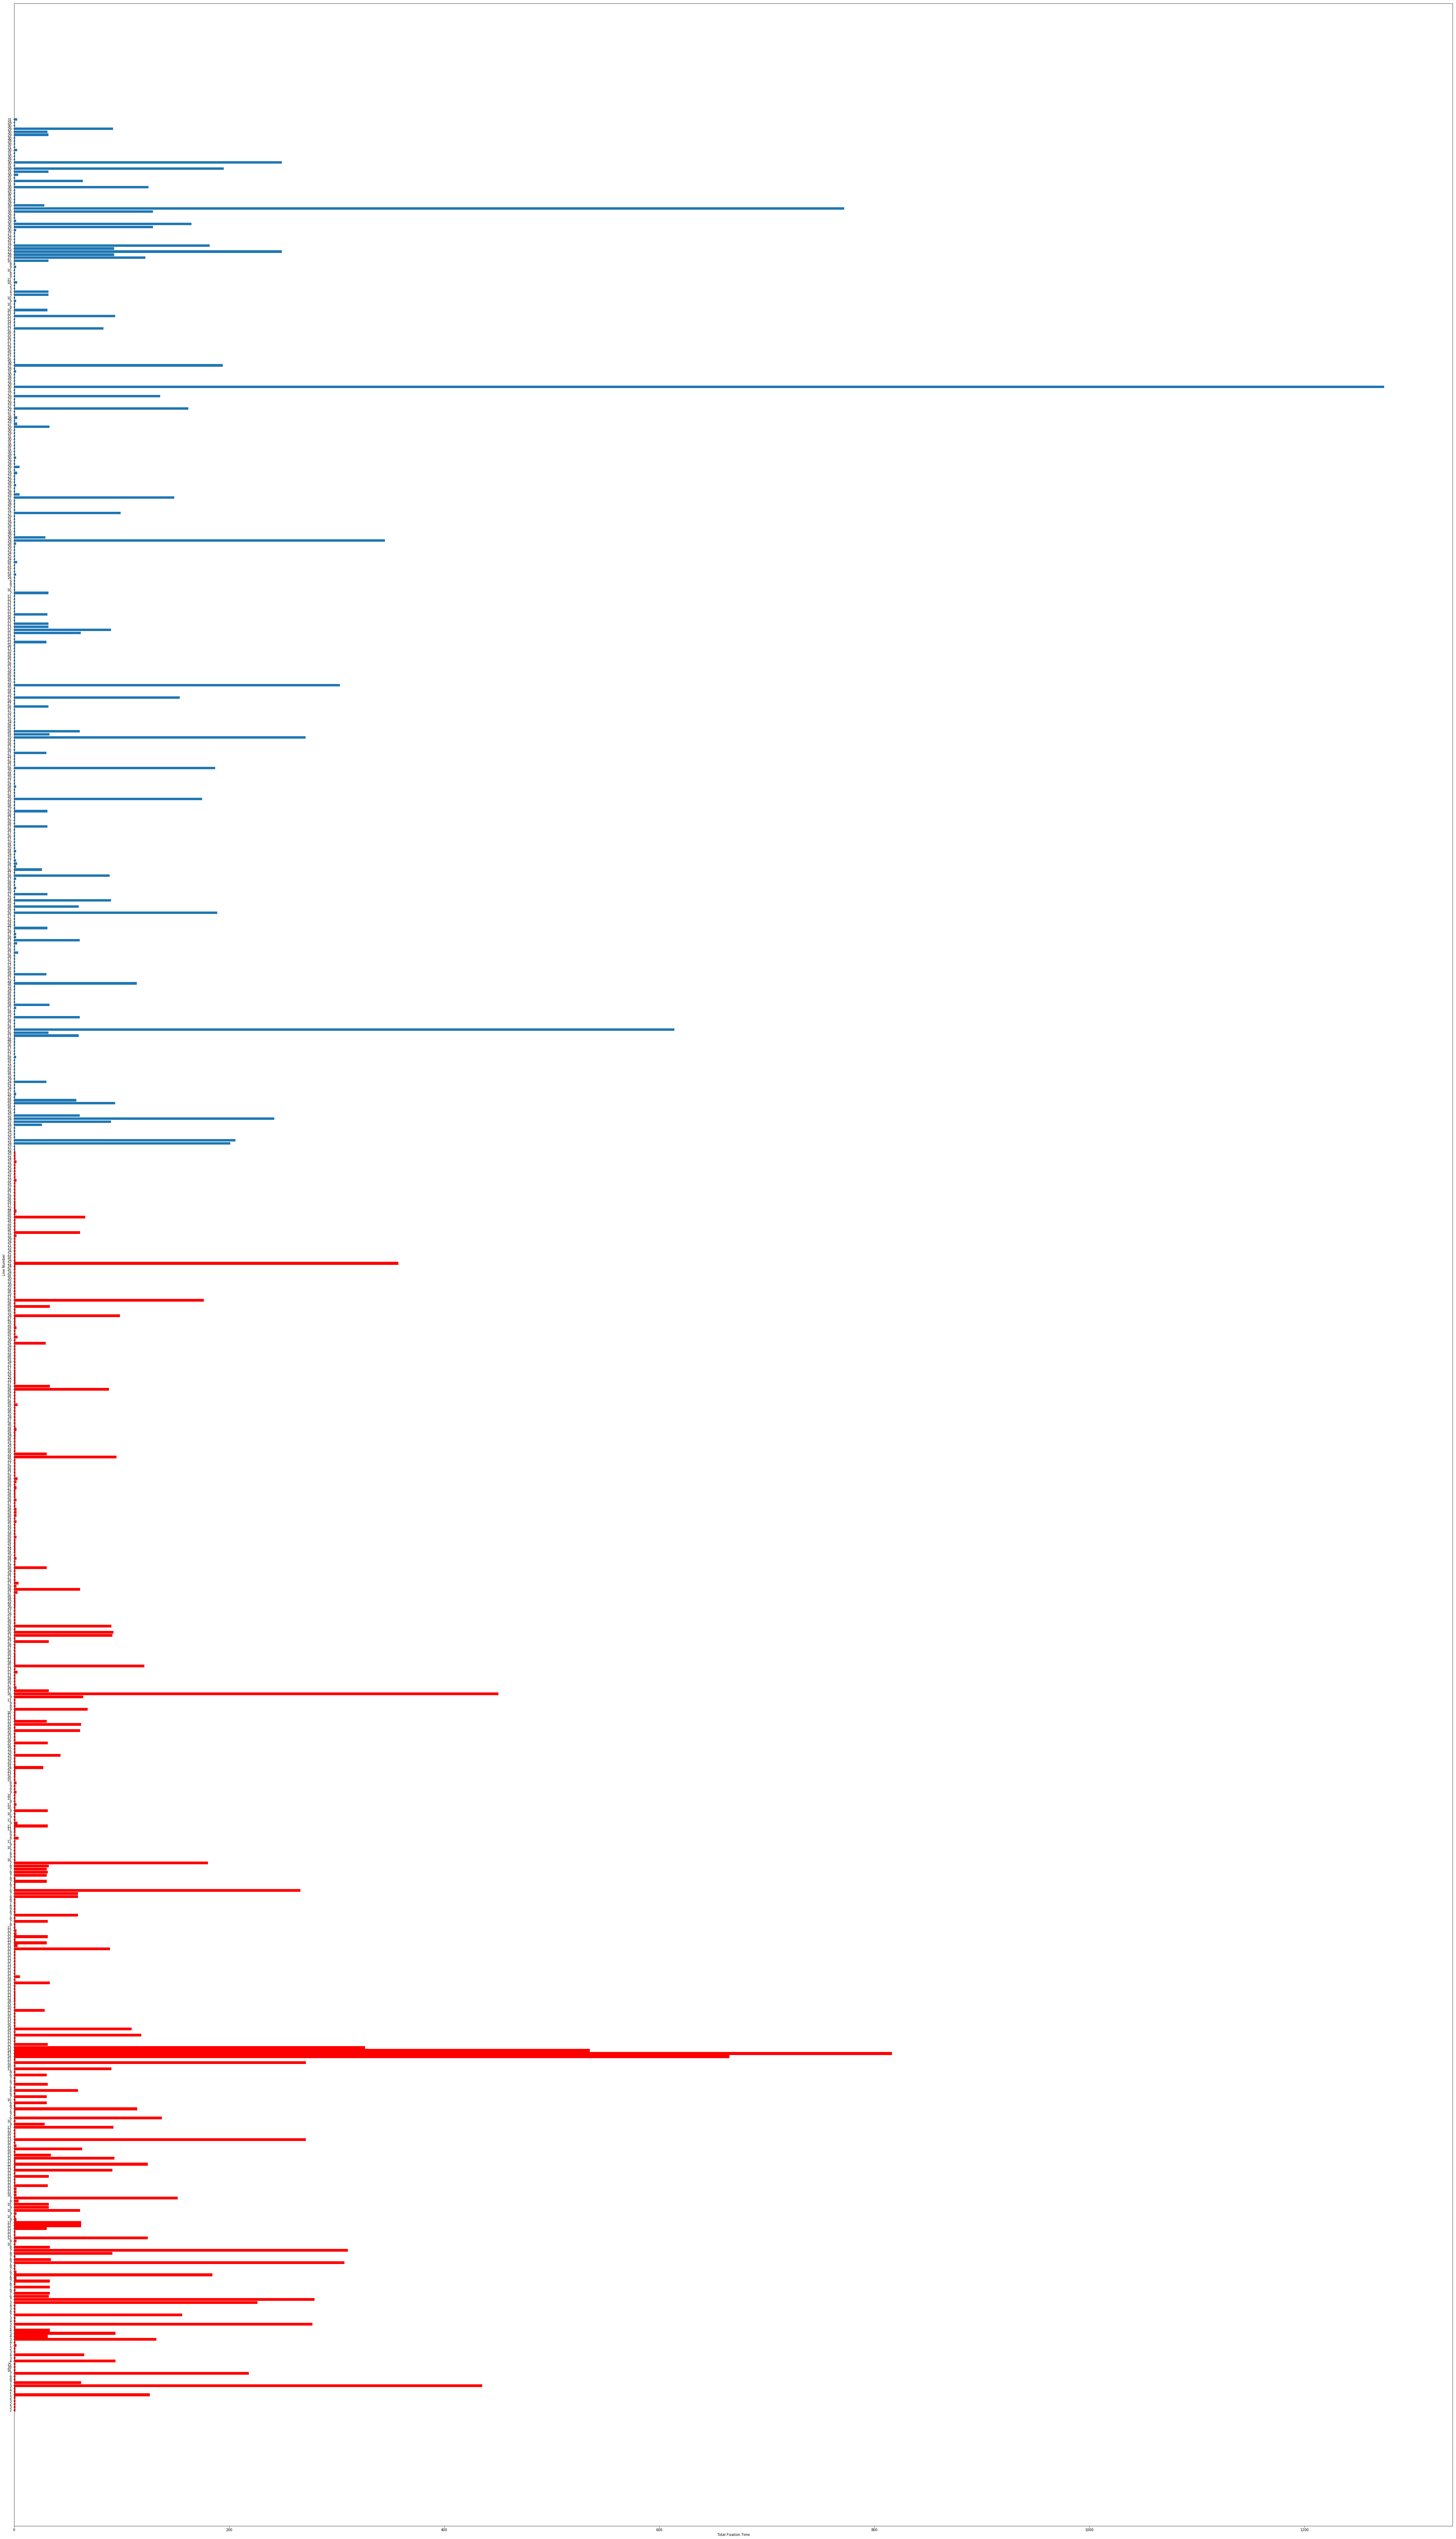

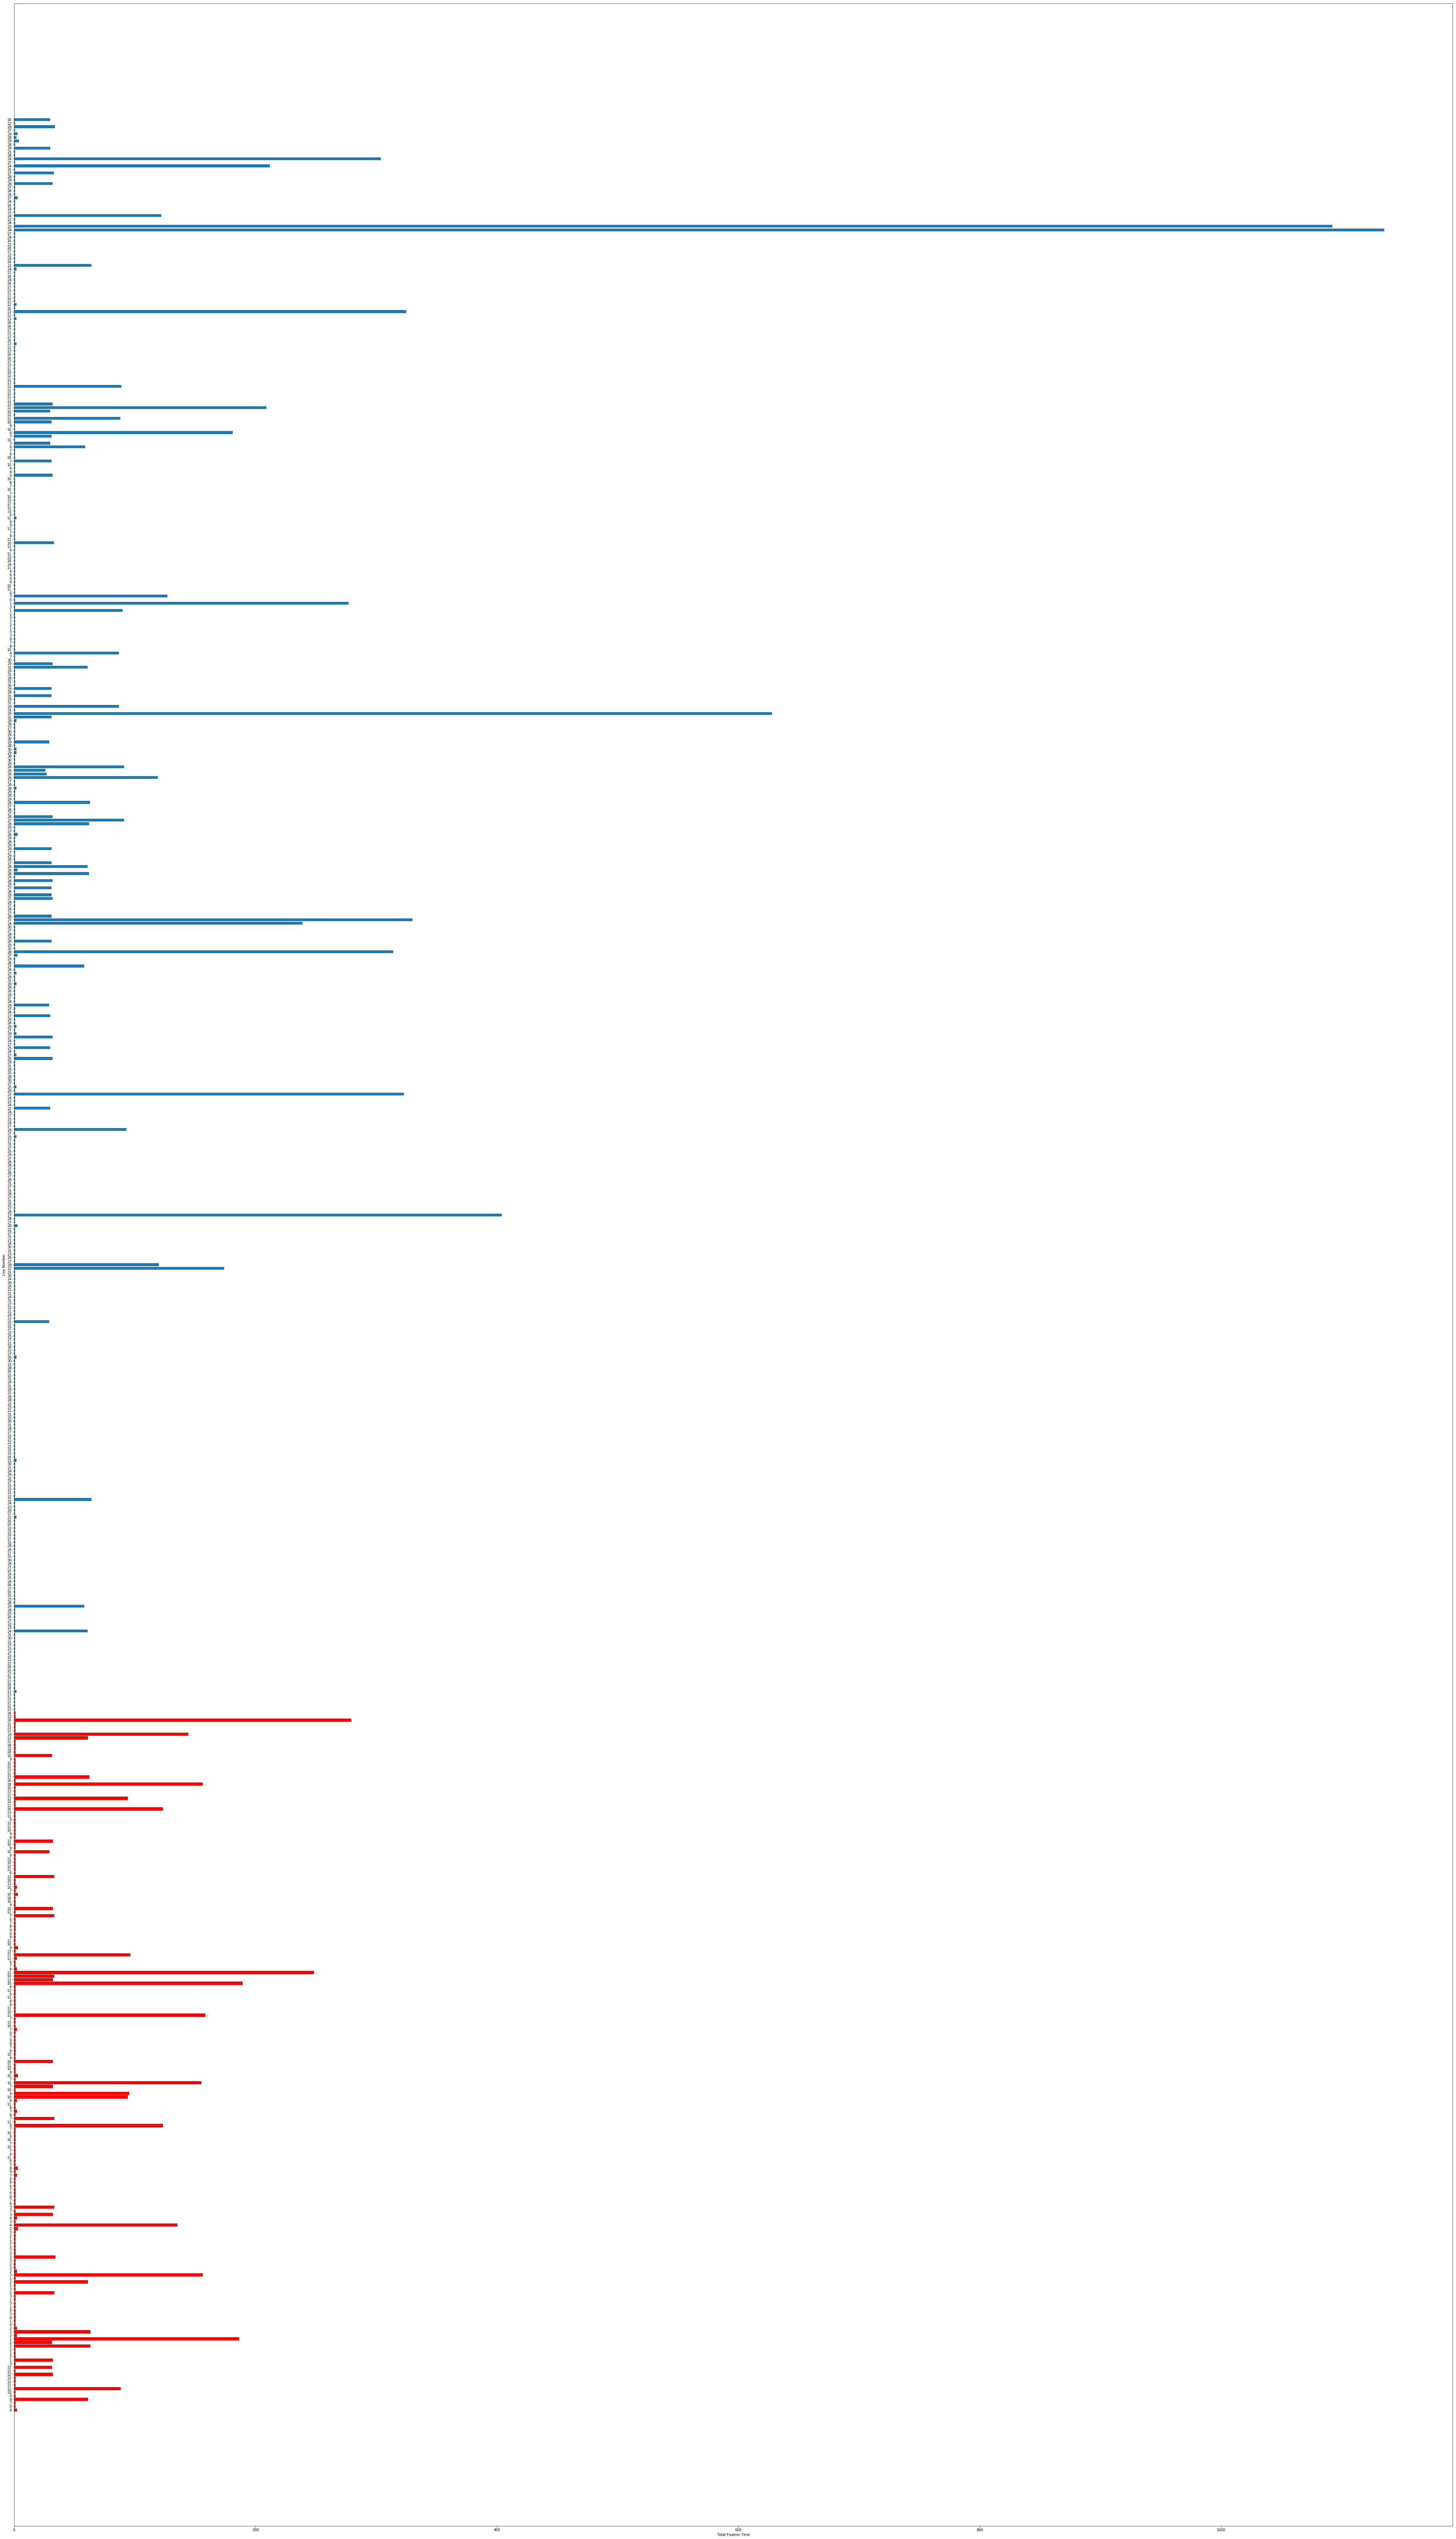

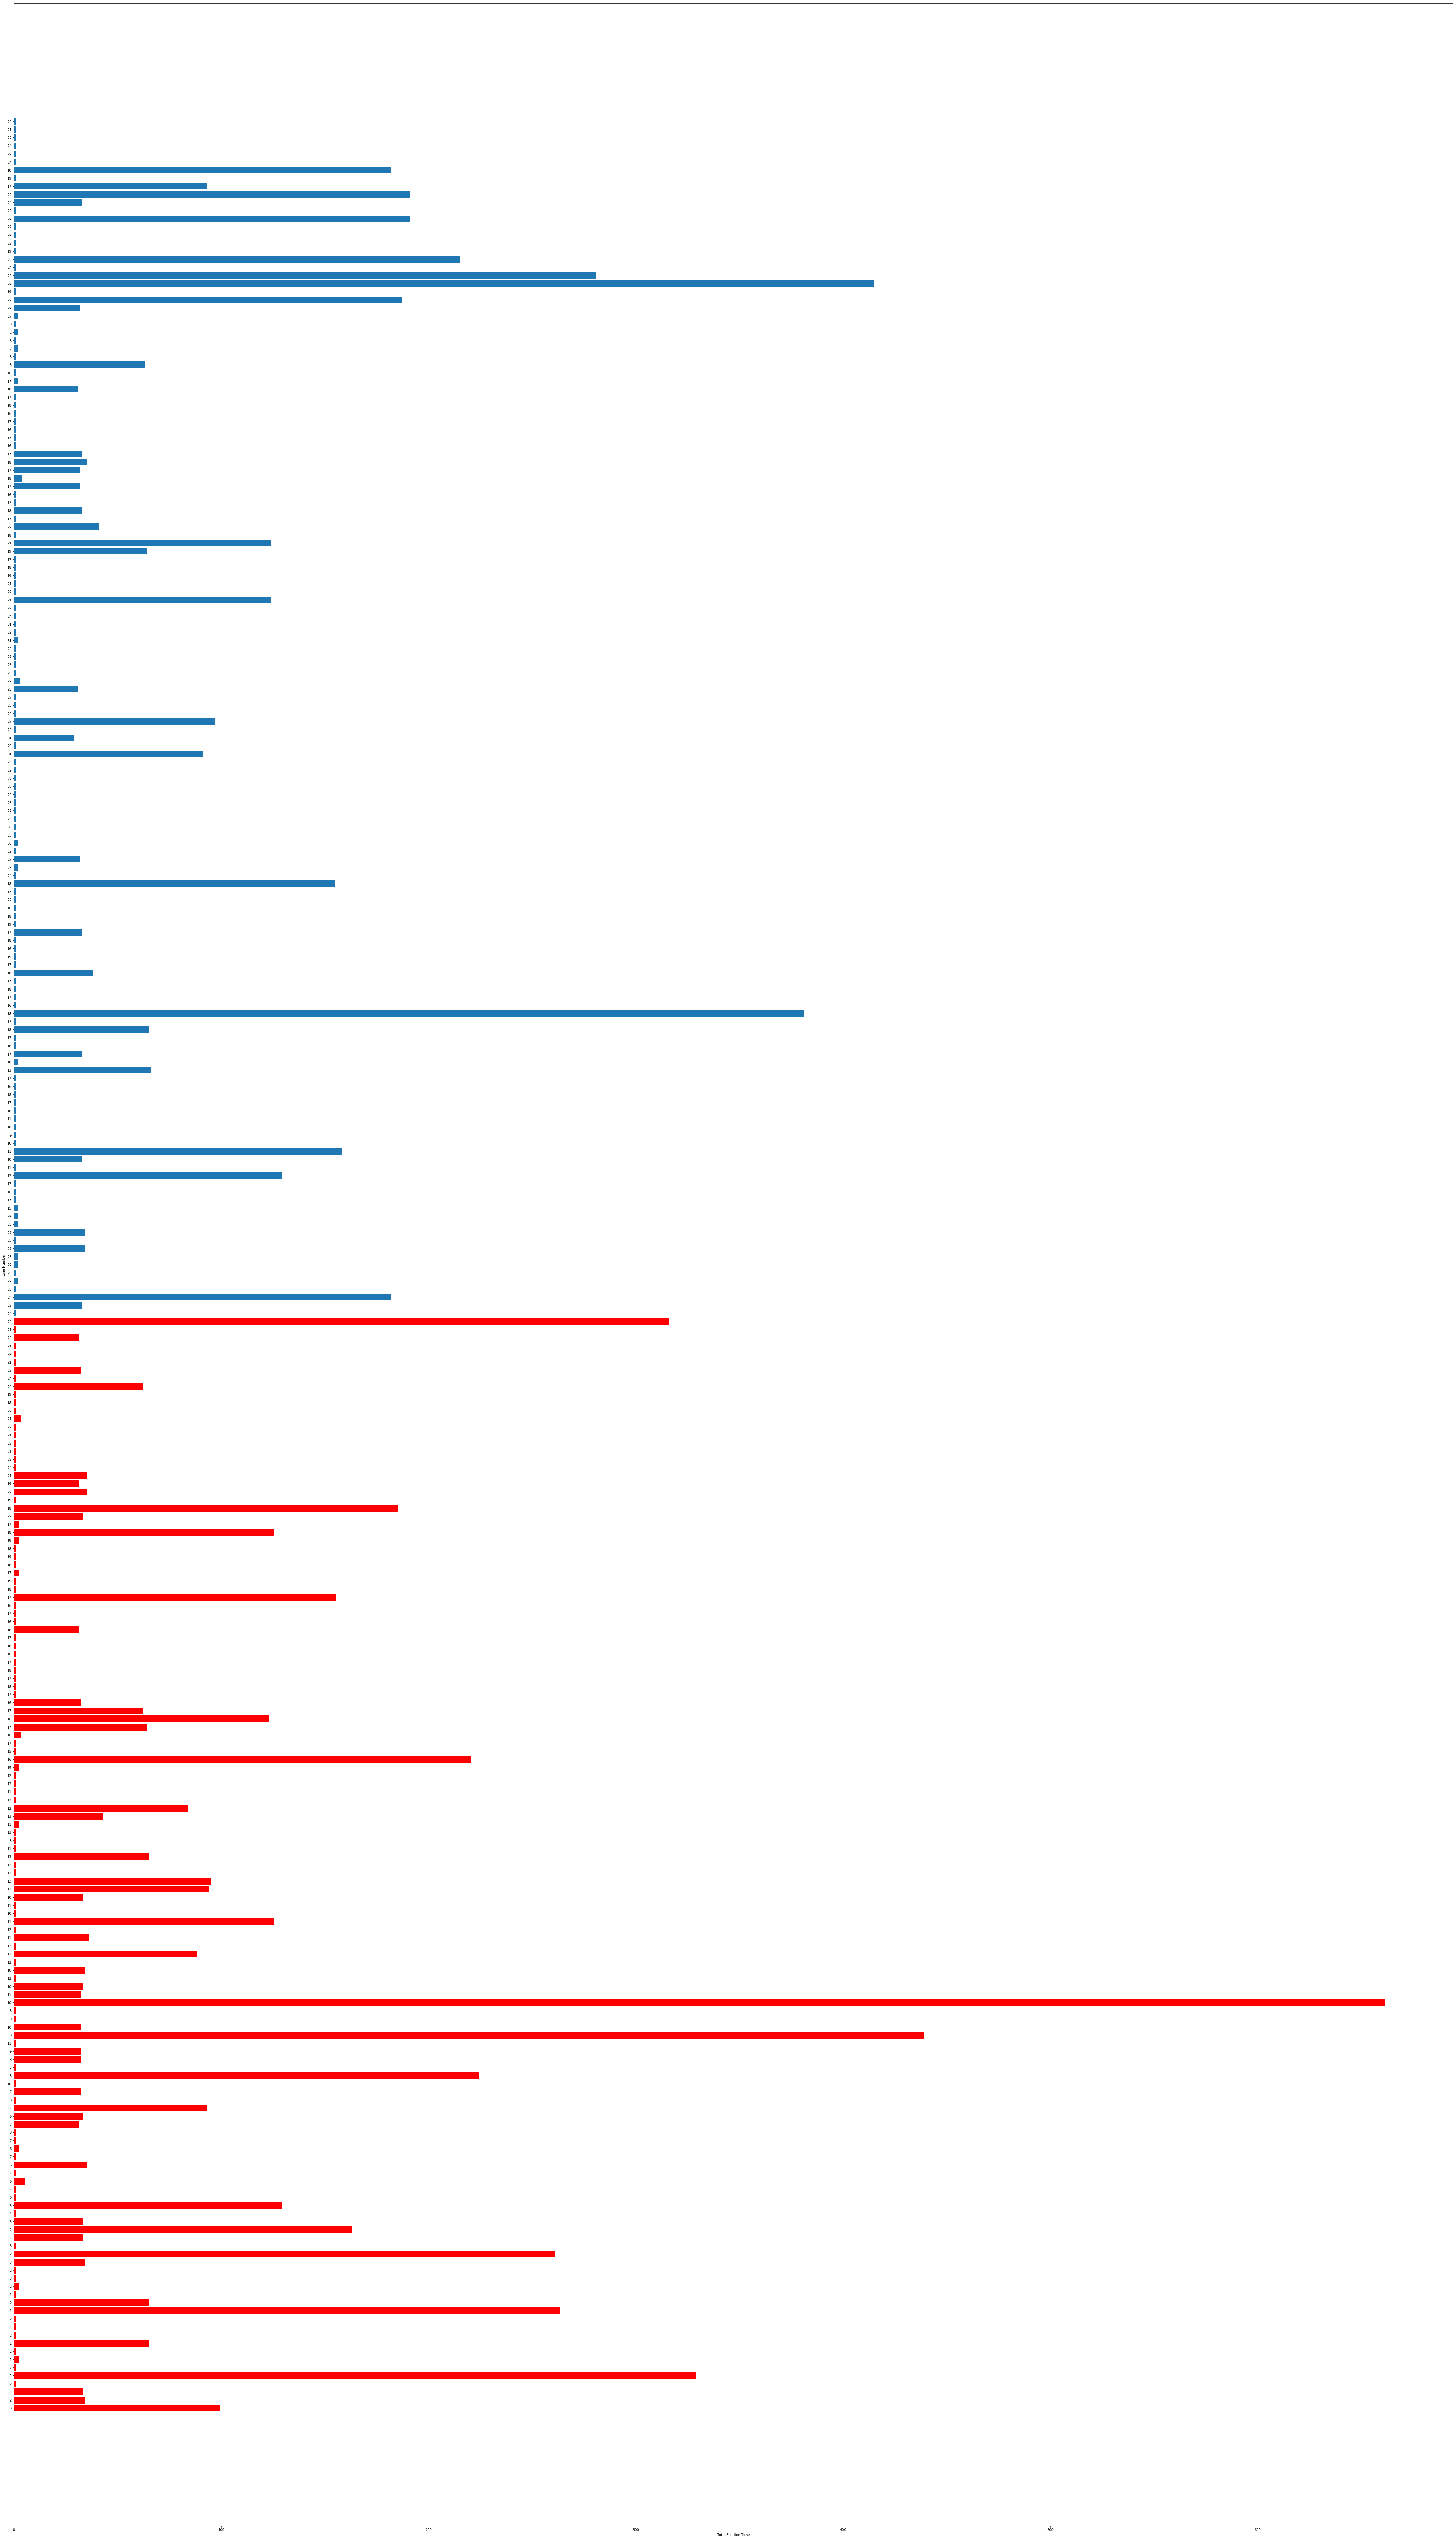

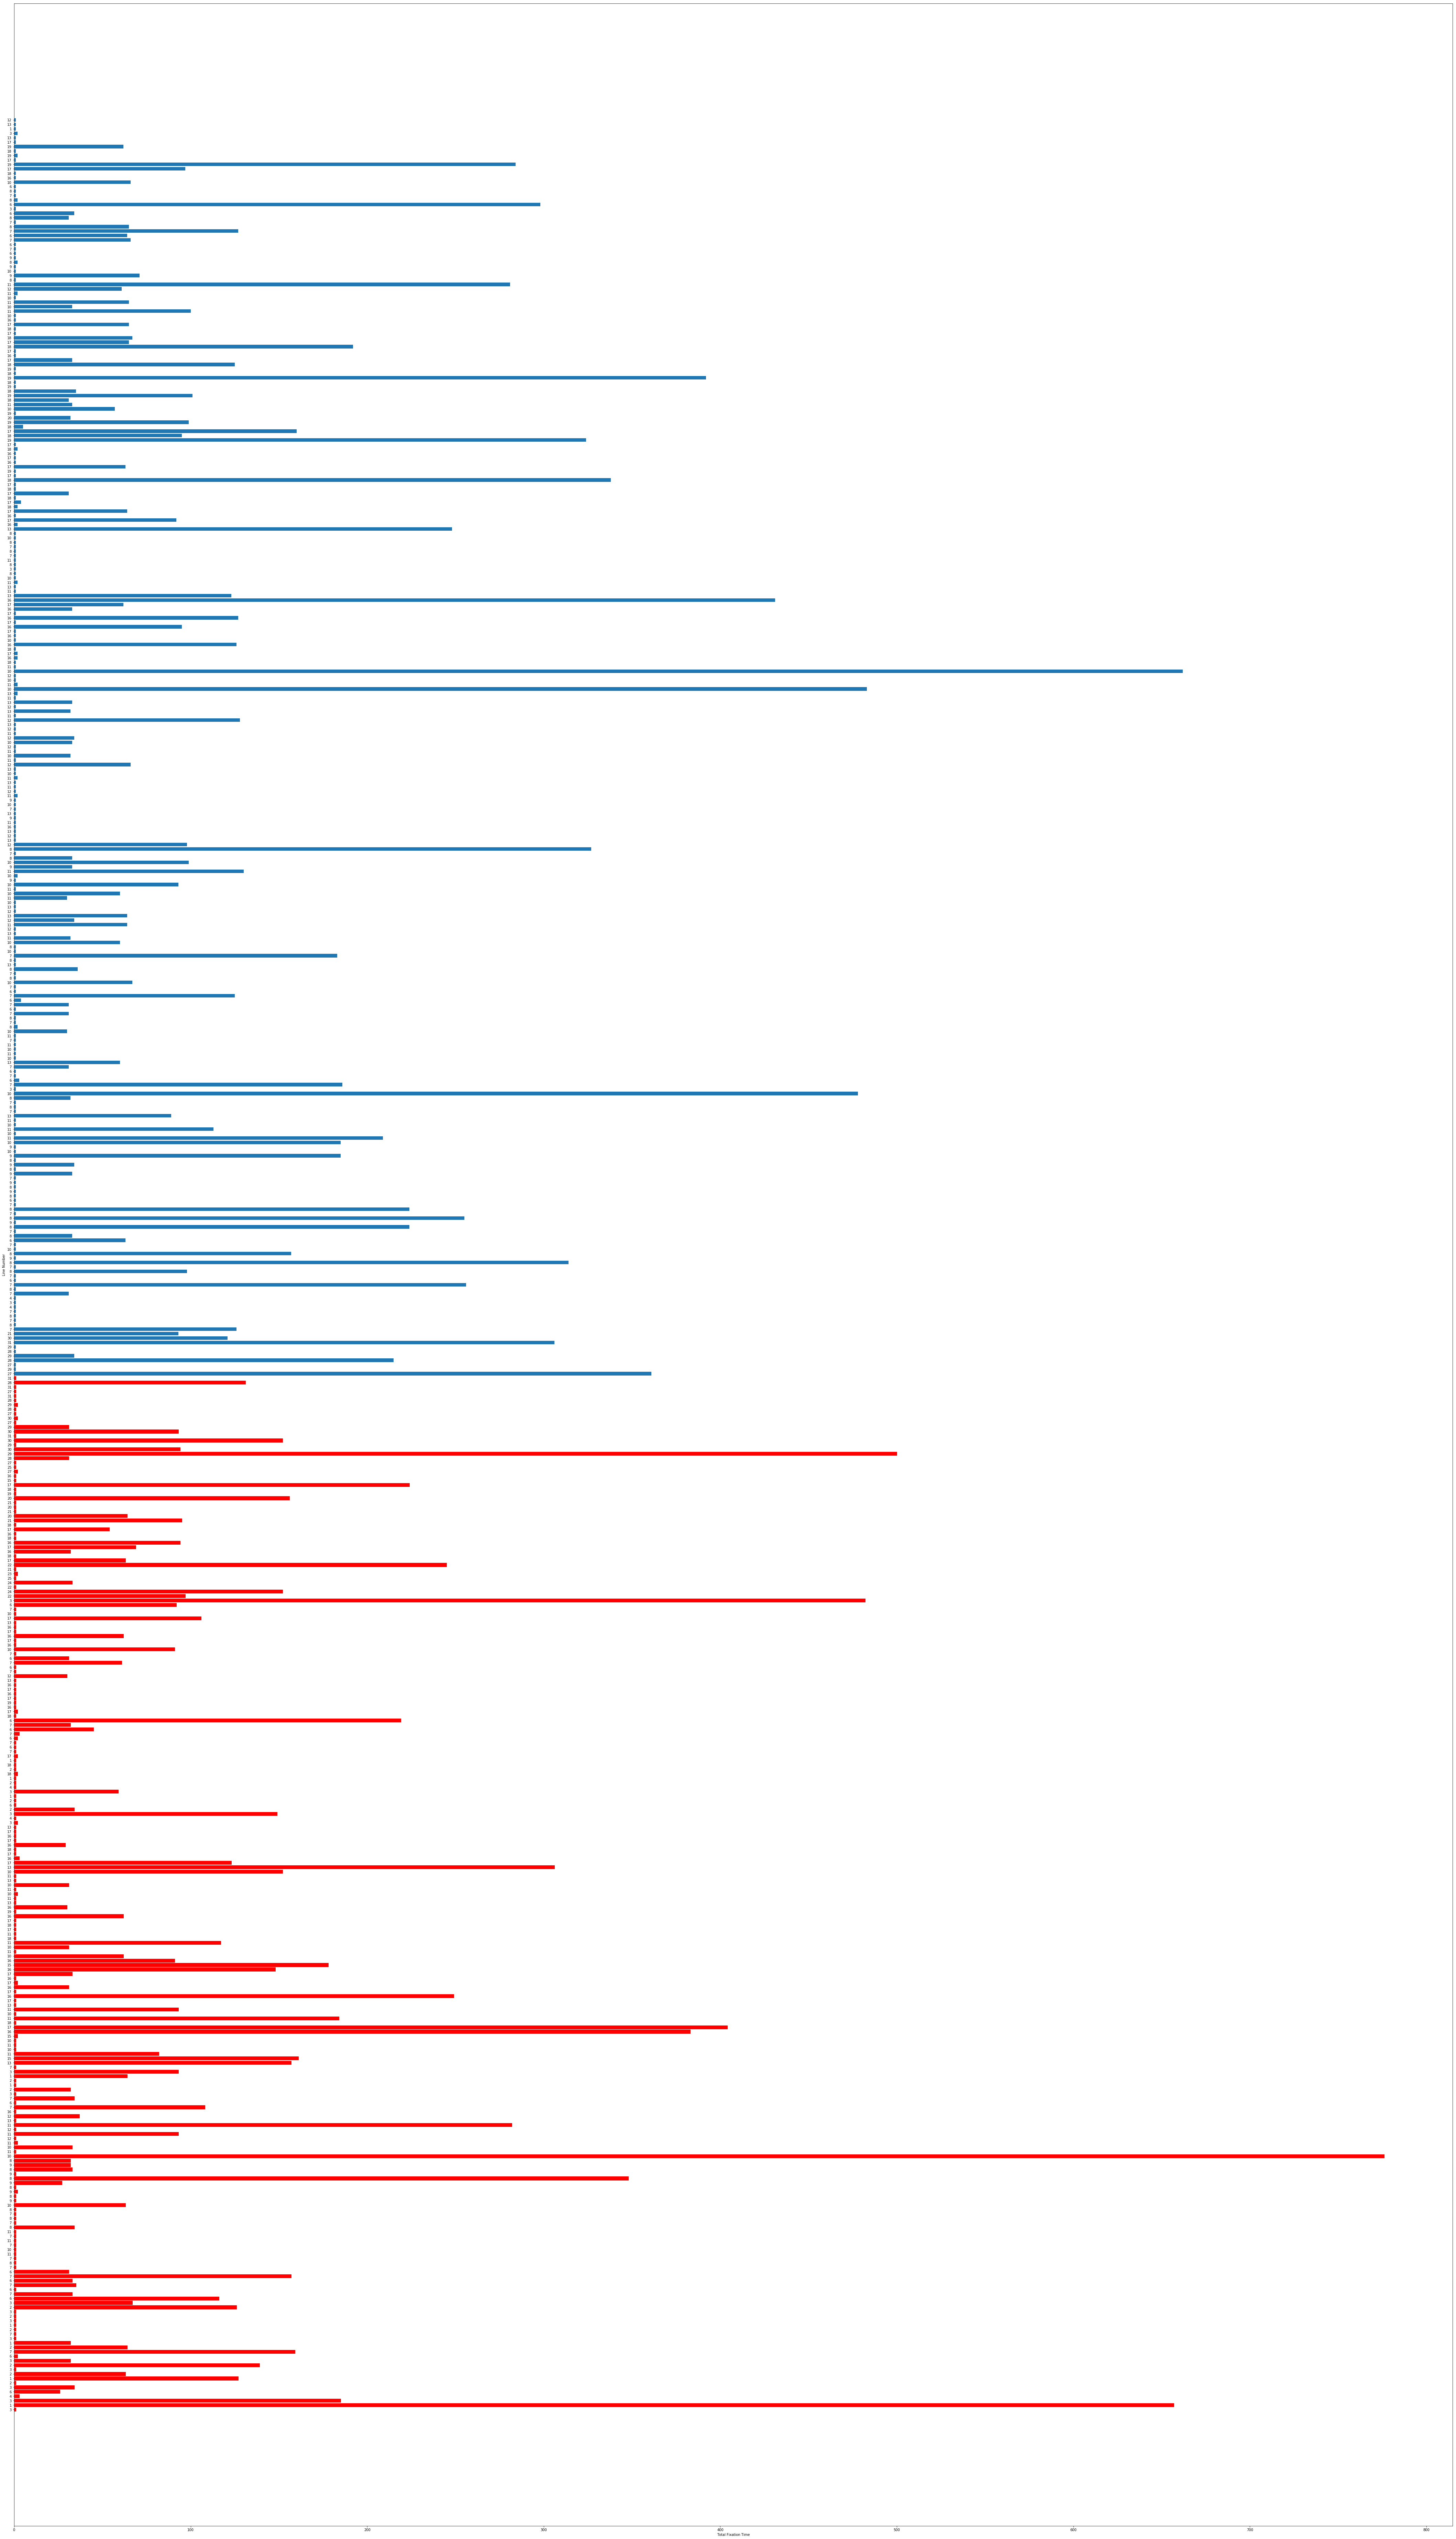

In [16]:
for sub in range(NUM_SUBJECTS):
    plt.figure(figsize=(75,135))
    xs = [x for x,y in armstrong_gaze_times[sub] if x in IMP_LINES_ARMSTRONG]
    ys = [y for x,y in armstrong_gaze_times[sub] if x in IMP_LINES_ARMSTRONG]
    plt.xlabel("Total Fixation Time")
    plt.ylabel("Line Number (Only Important)")
    rects = plt.barh(range(len(xs)),ys,tick_label=xs)
    i = 0
    for x,y in armstrong_gaze_times[sub]:
        if y == 0:
            continue
        if x in IMP_LINES_ARMSTRONG:
            rects[i].set_color('r')
        else:
            continue
        i+=1
    plt.savefig("./plots/gazetimes/armstrong/gaze_times_arms_imp{}.png".format(sub+1))
for sub in range(NUM_SUBJECTS):
    plt.figure(figsize=(75,135))
    xs = [x for x,y in armstrong_gaze_times[sub]]
    ys = [y for x,y in armstrong_gaze_times[sub]]
    plt.xlabel("Total Fixation Time")
    plt.ylabel("Line Number")
    rects = plt.barh(range(len(xs)),ys,tick_label=xs)
    i = 0
    for x,y in armstrong_gaze_times[sub]:
        if y == 0:
            continue
        if x in IMP_LINES_ARMSTRONG:
            rects[i].set_color('r')
        else:
            continue
        i+=1
    plt.savefig("./plots/gazetimes/armstrong/gaze_times_arms_all{}.png".format(sub+1))

SystemError: <built-in method write of _io.BufferedWriter object at 0x7fc446c4c048> returned a result with an error set

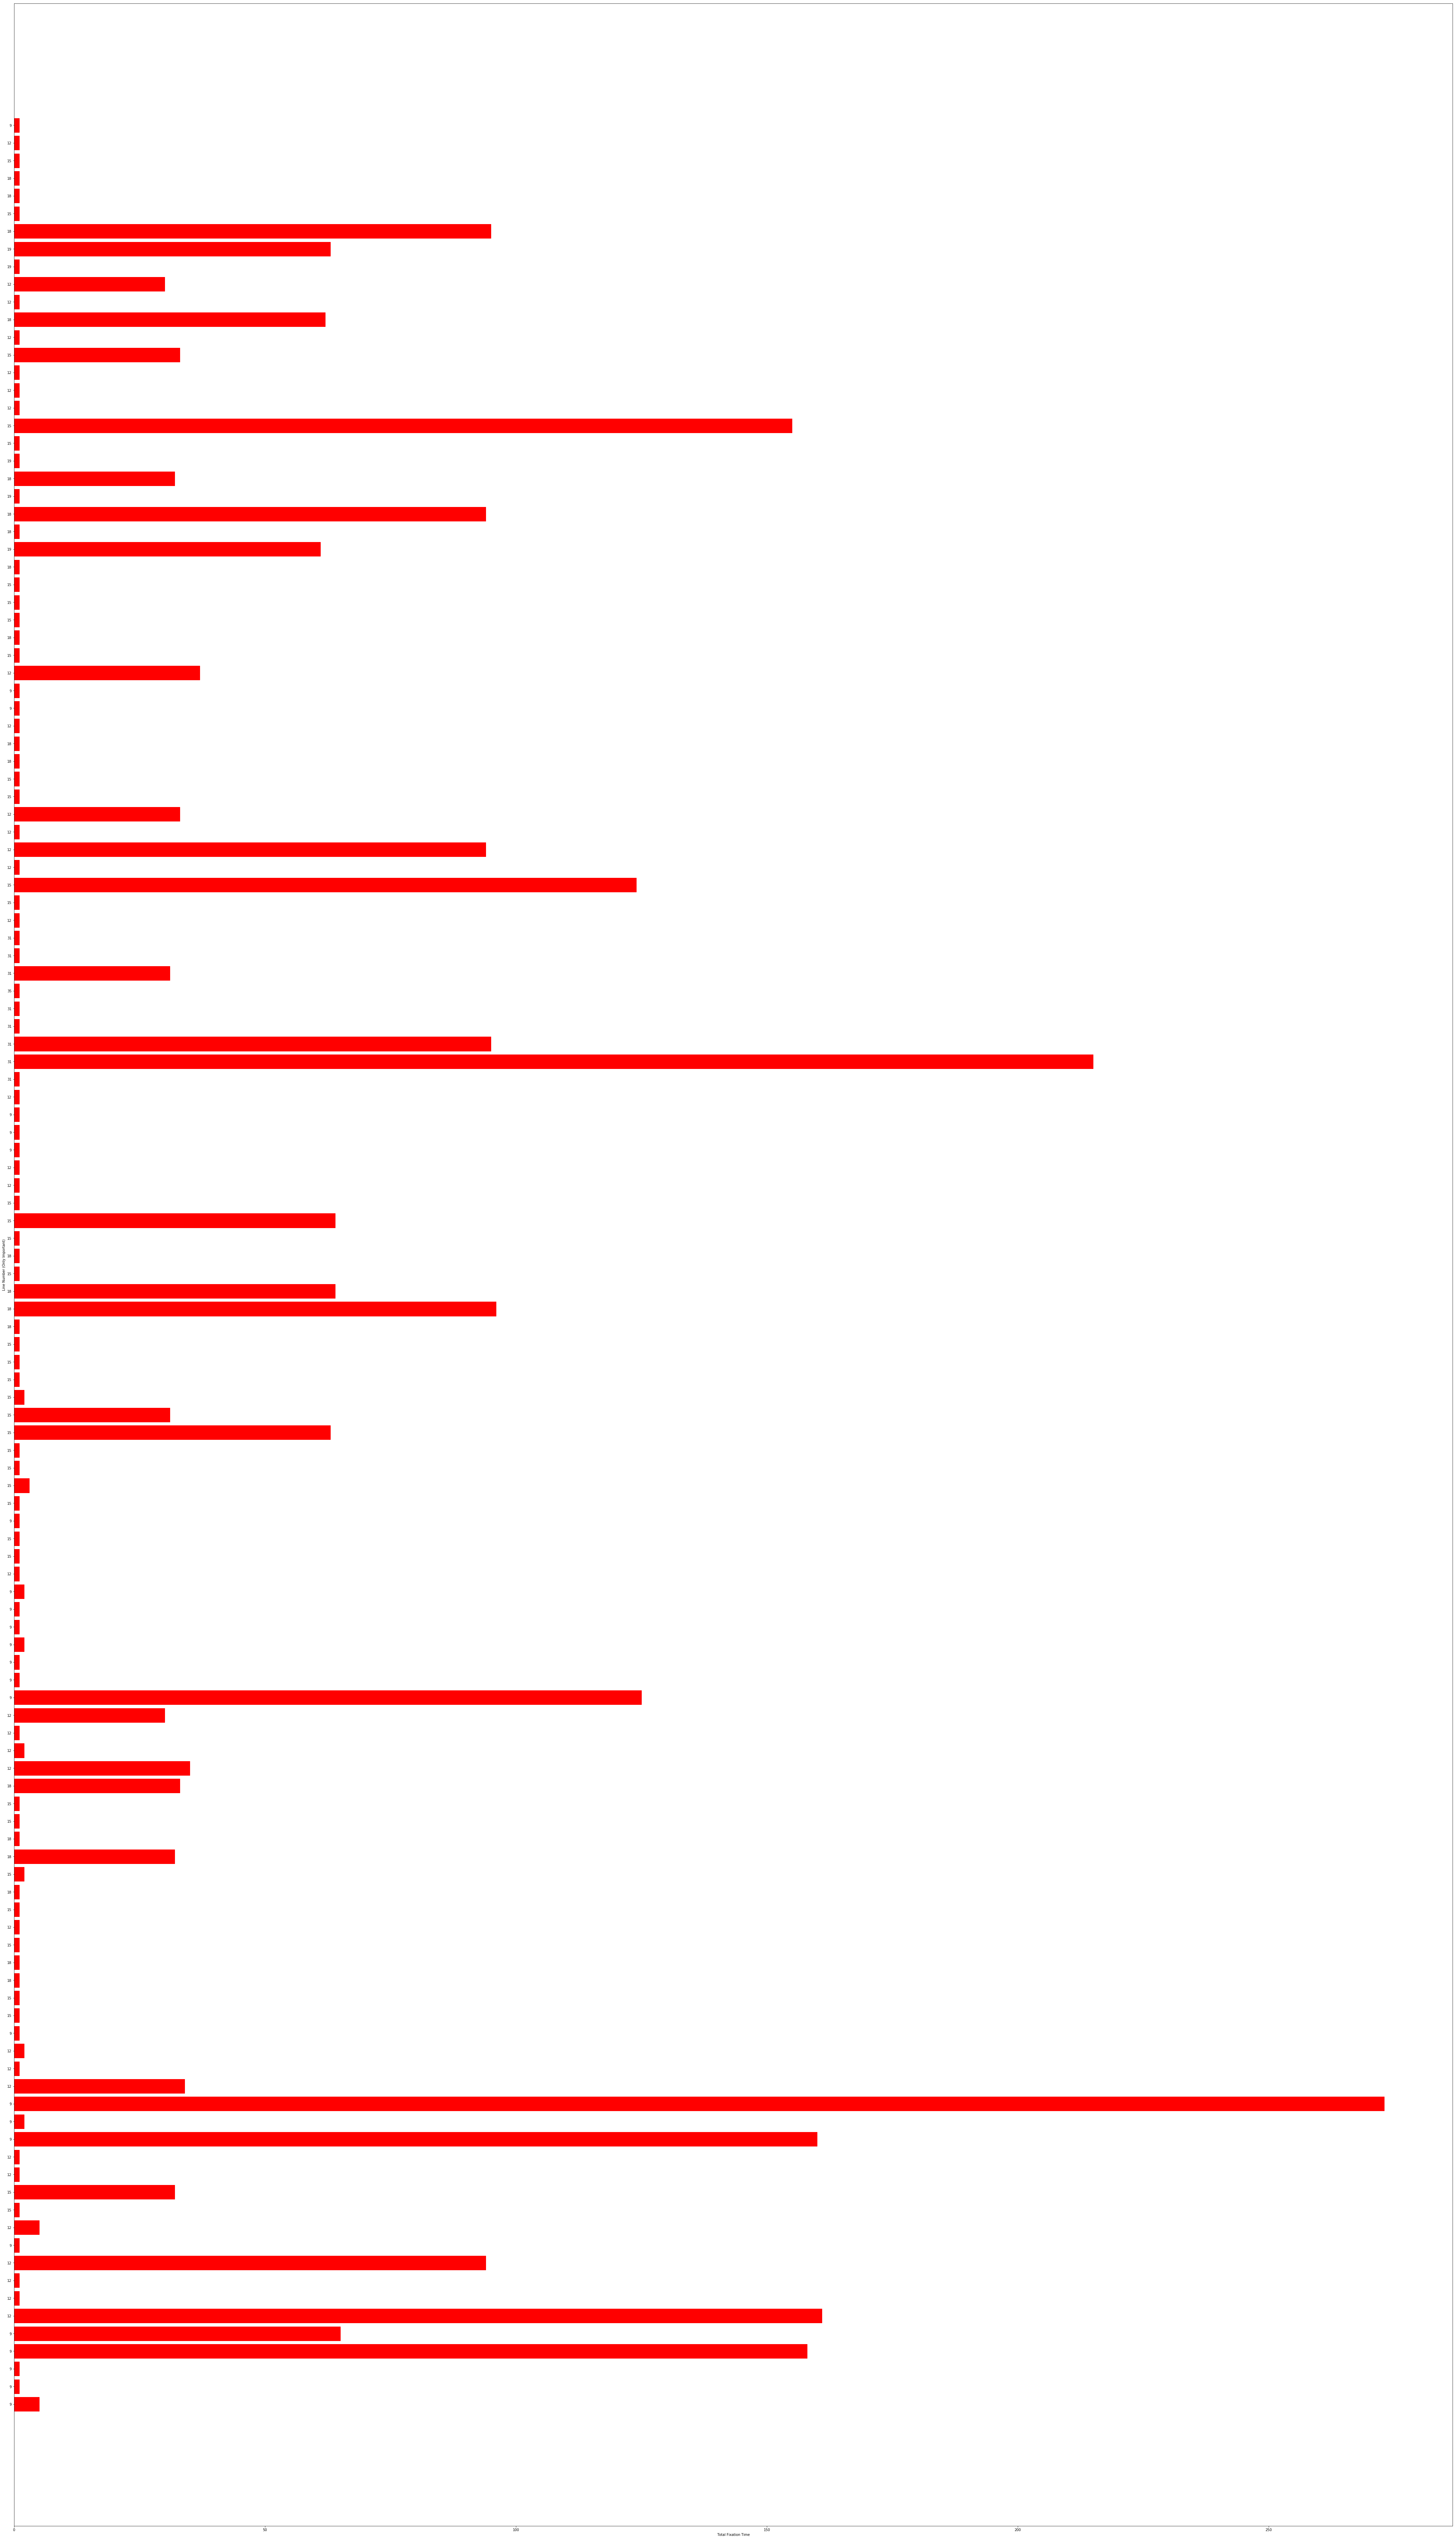

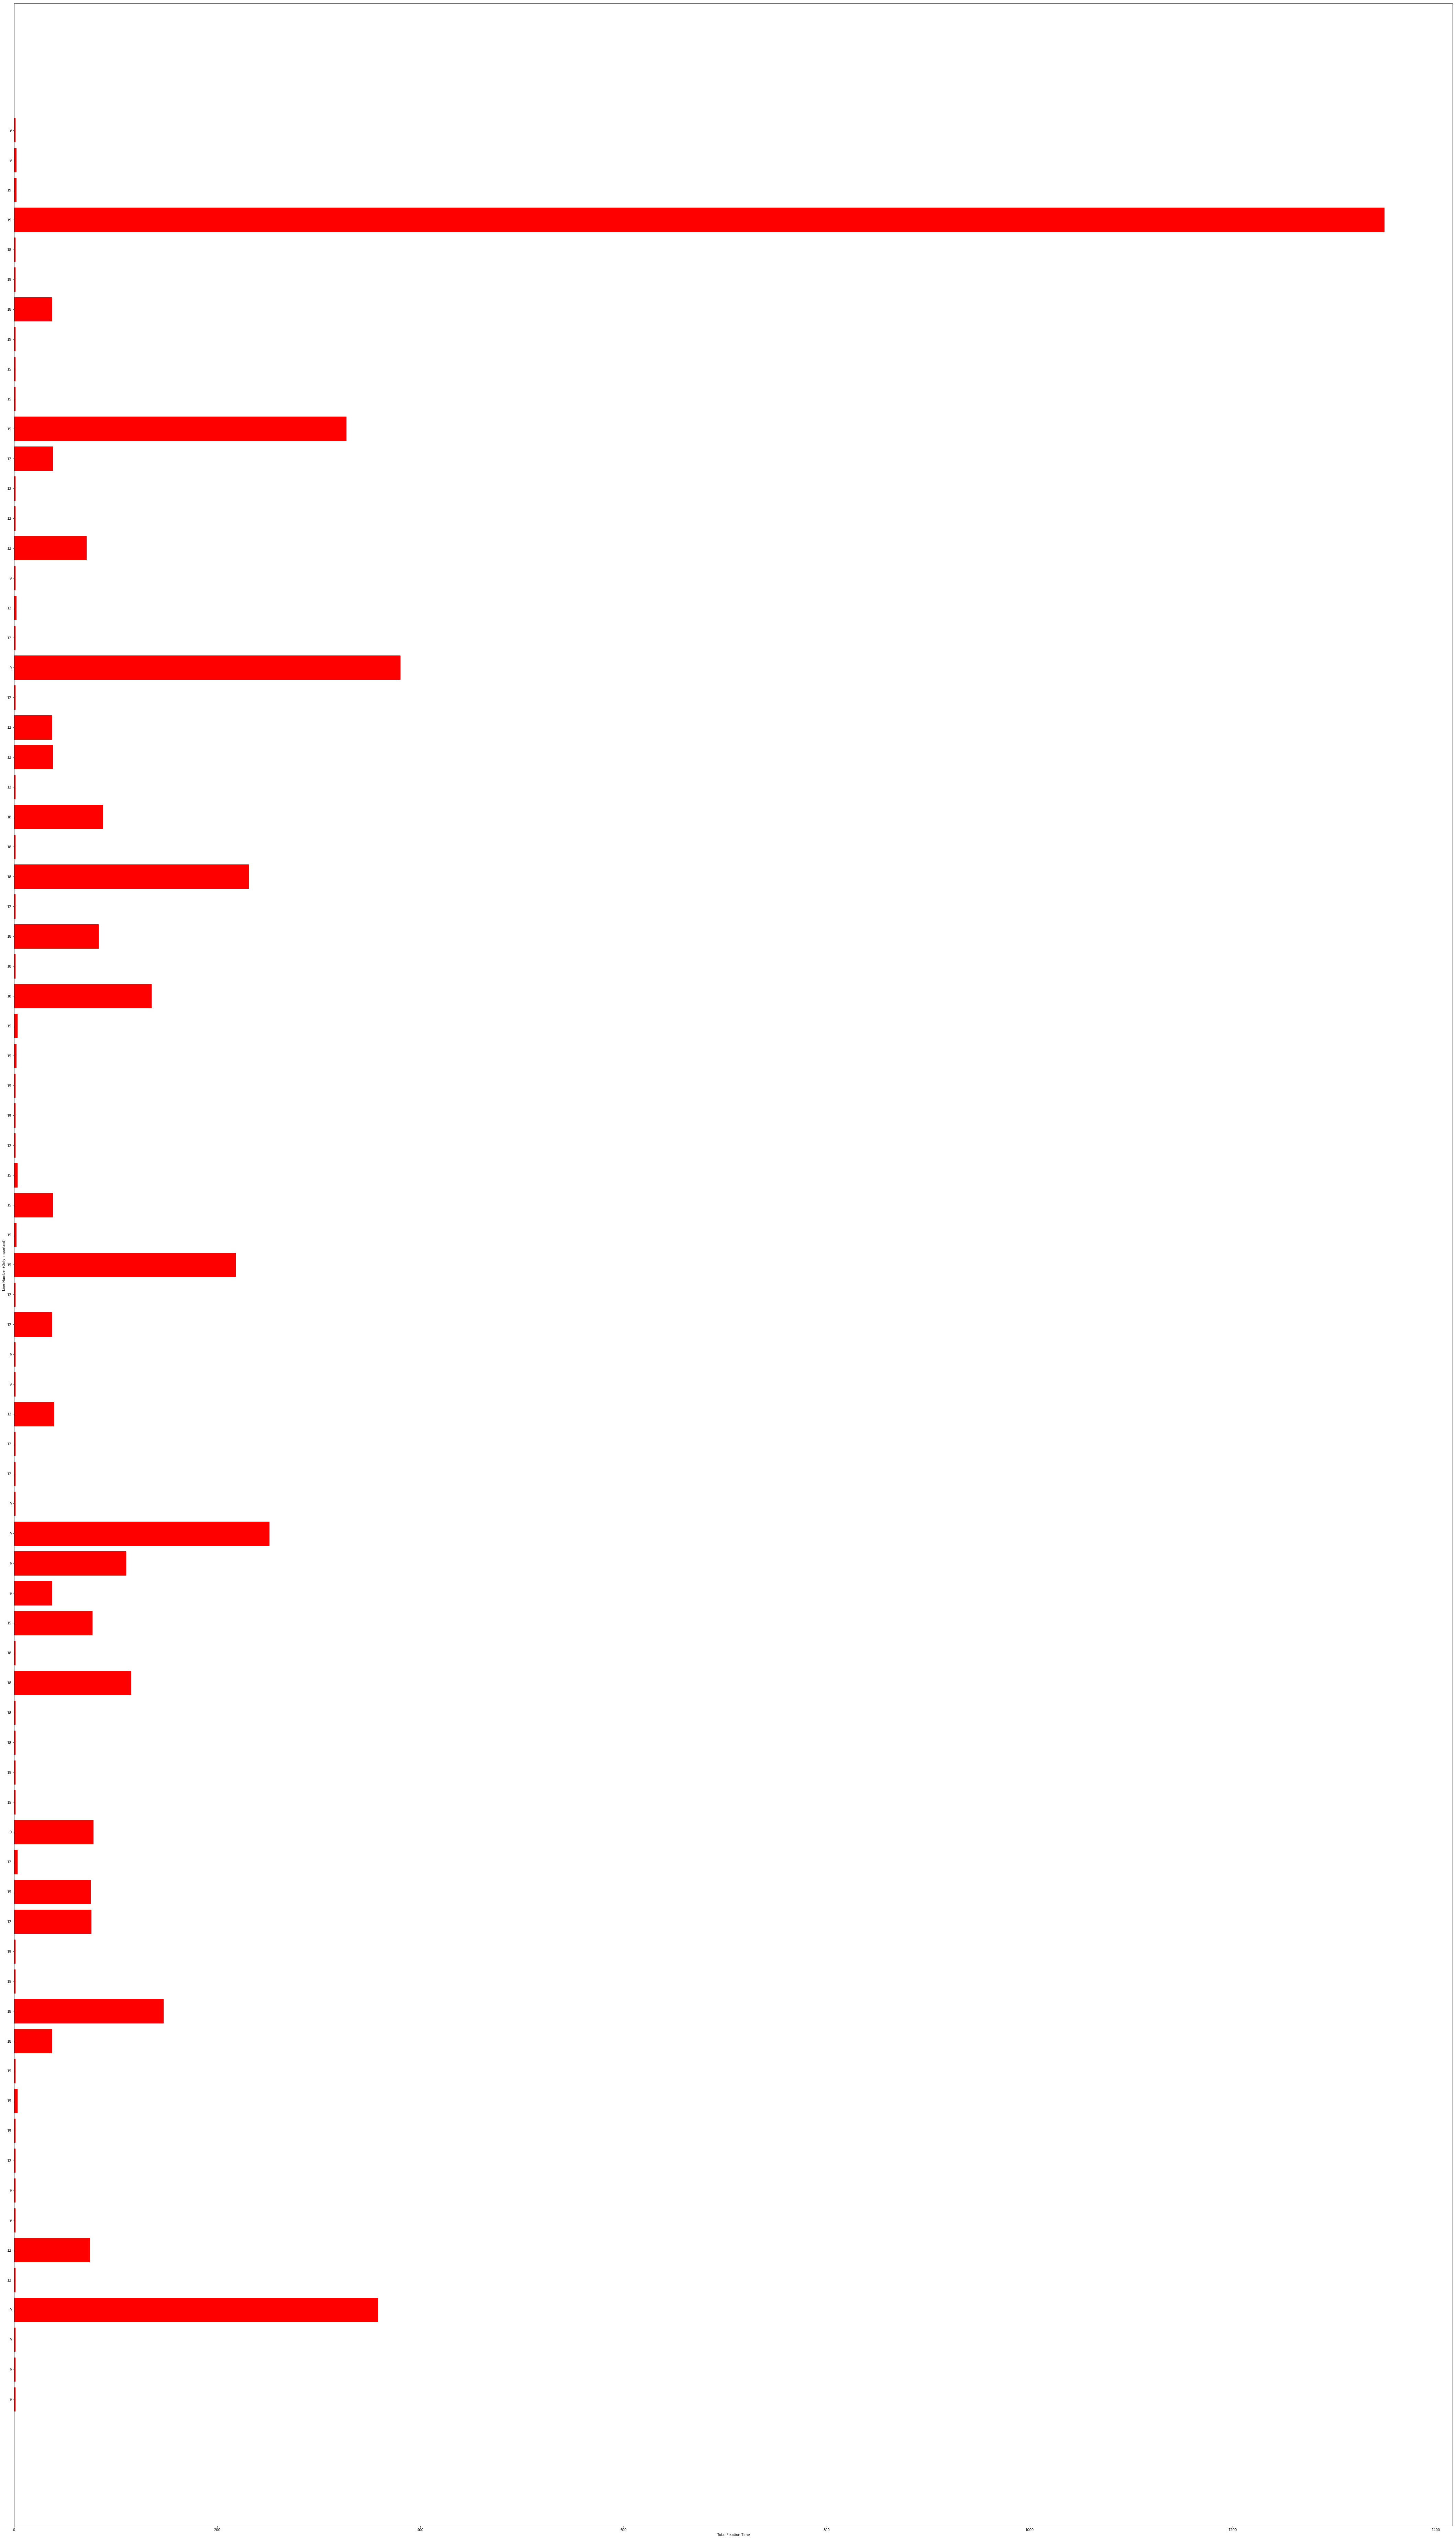

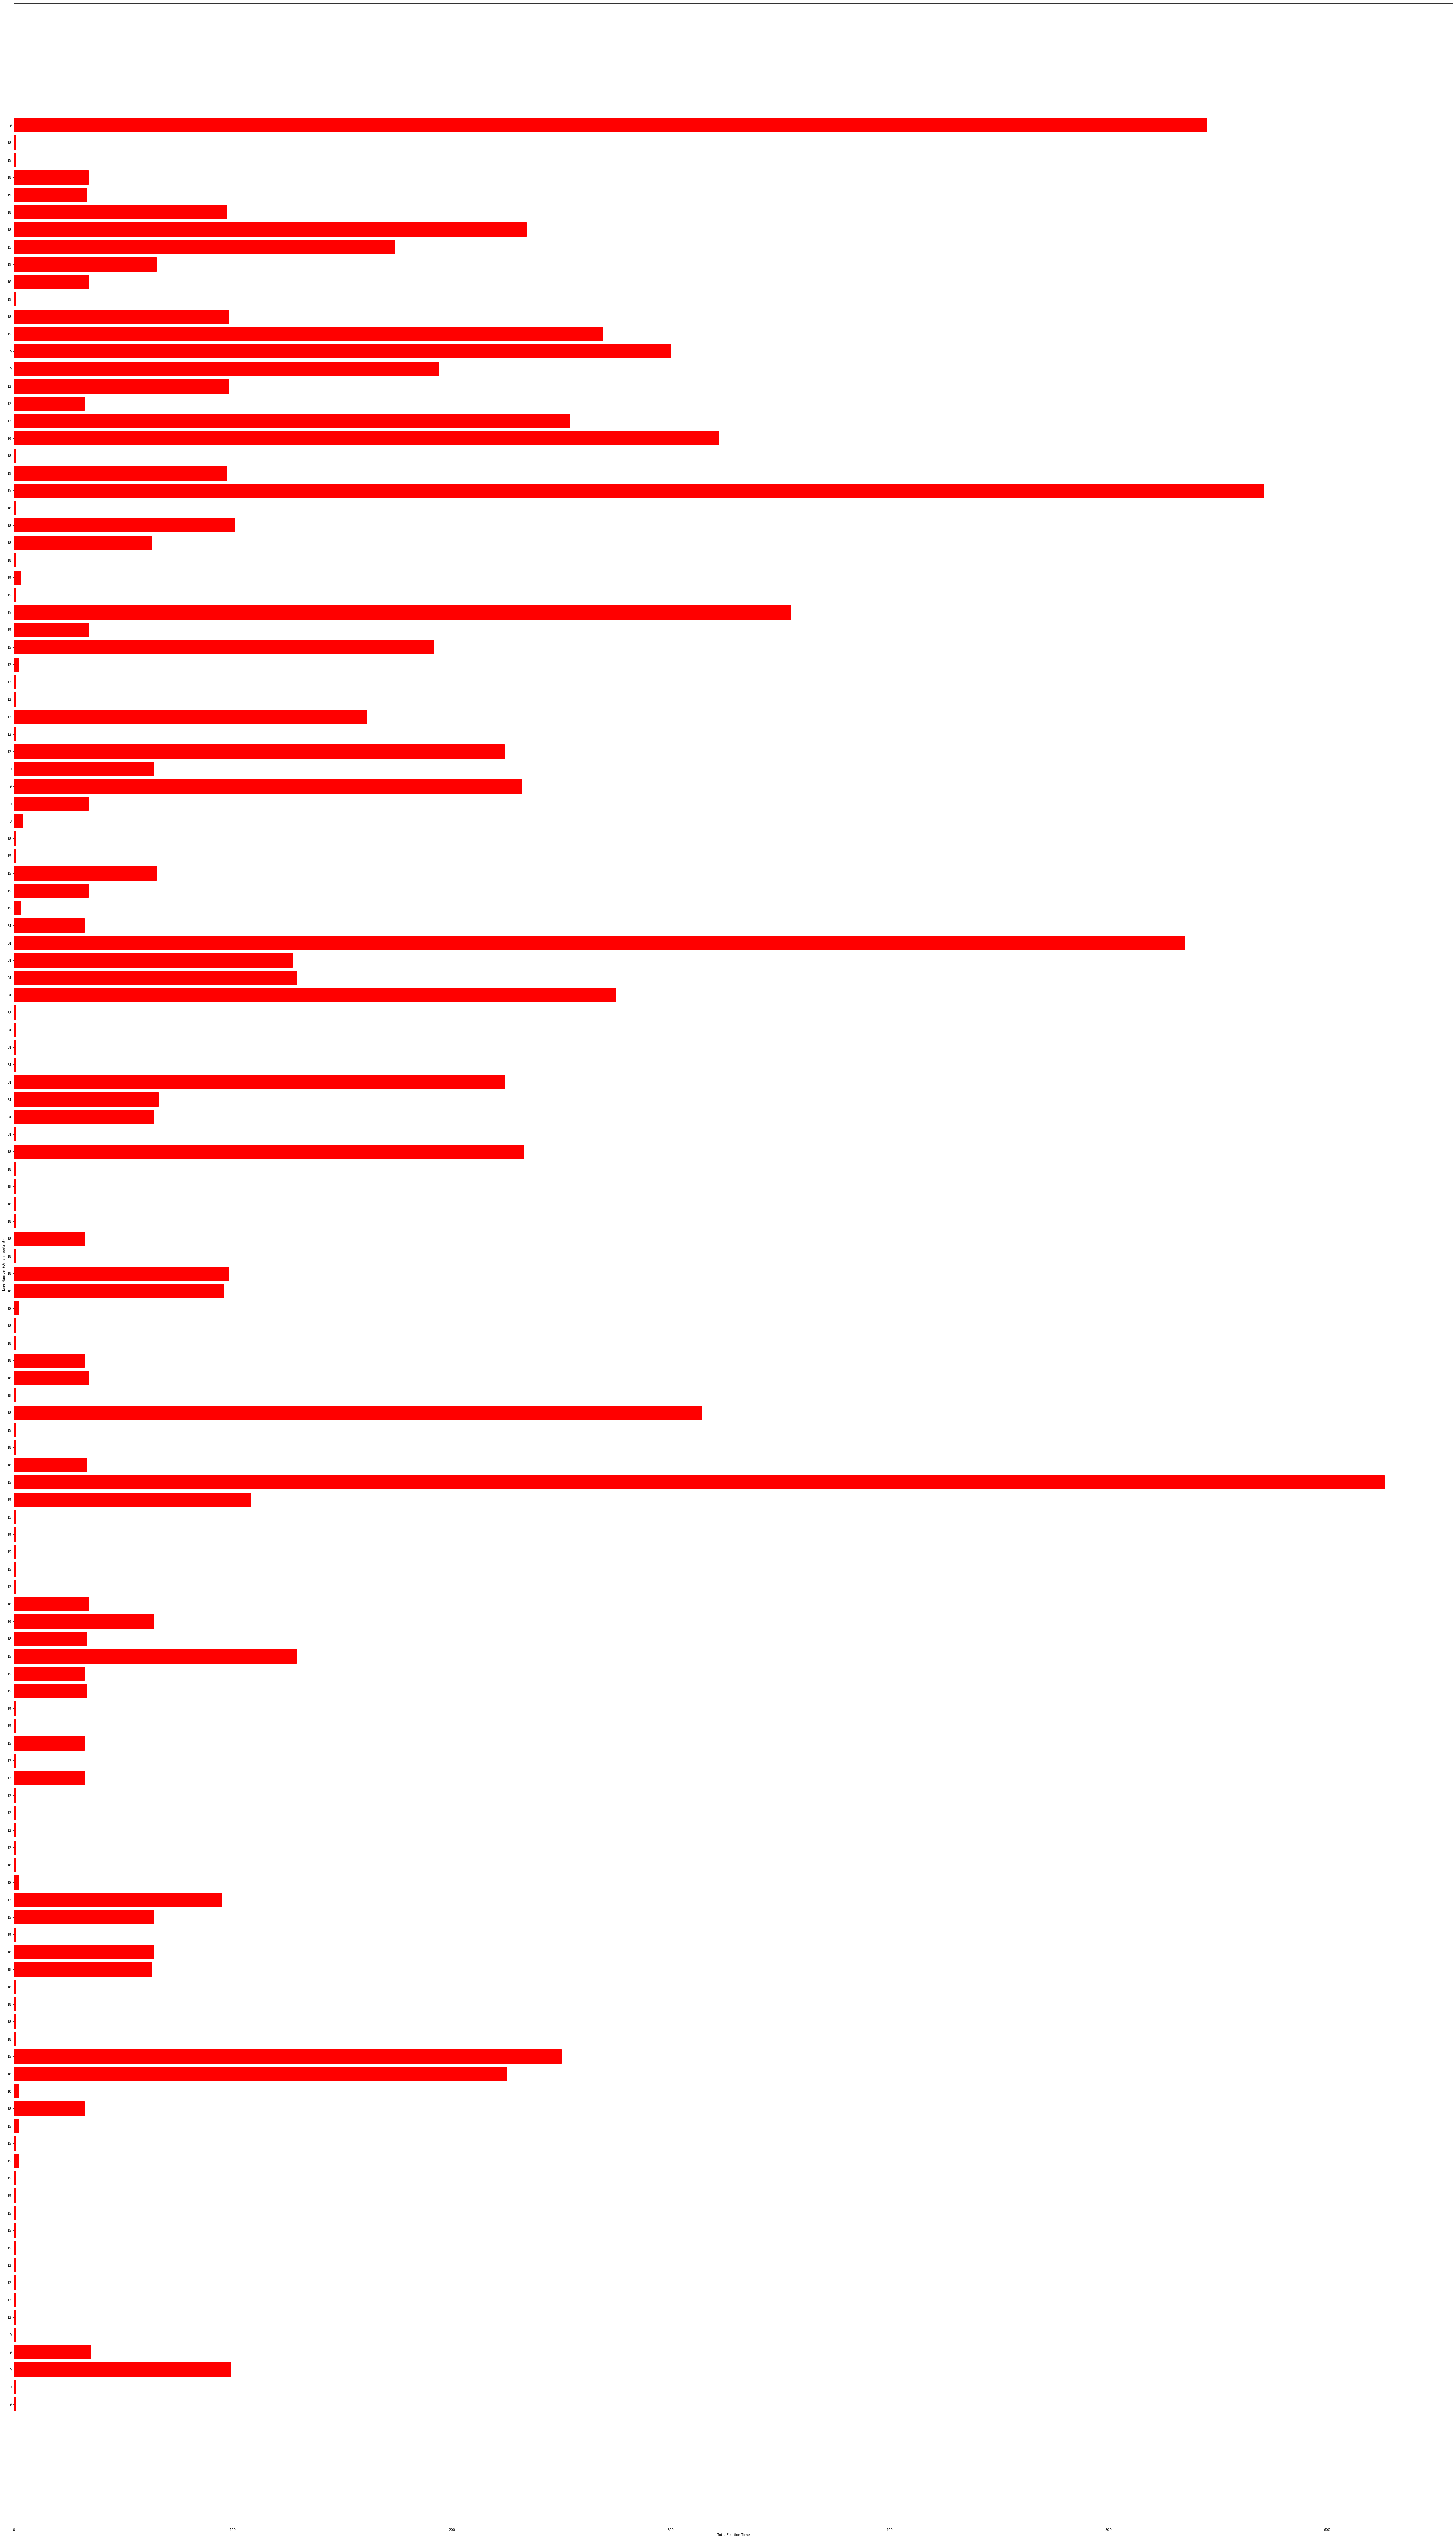

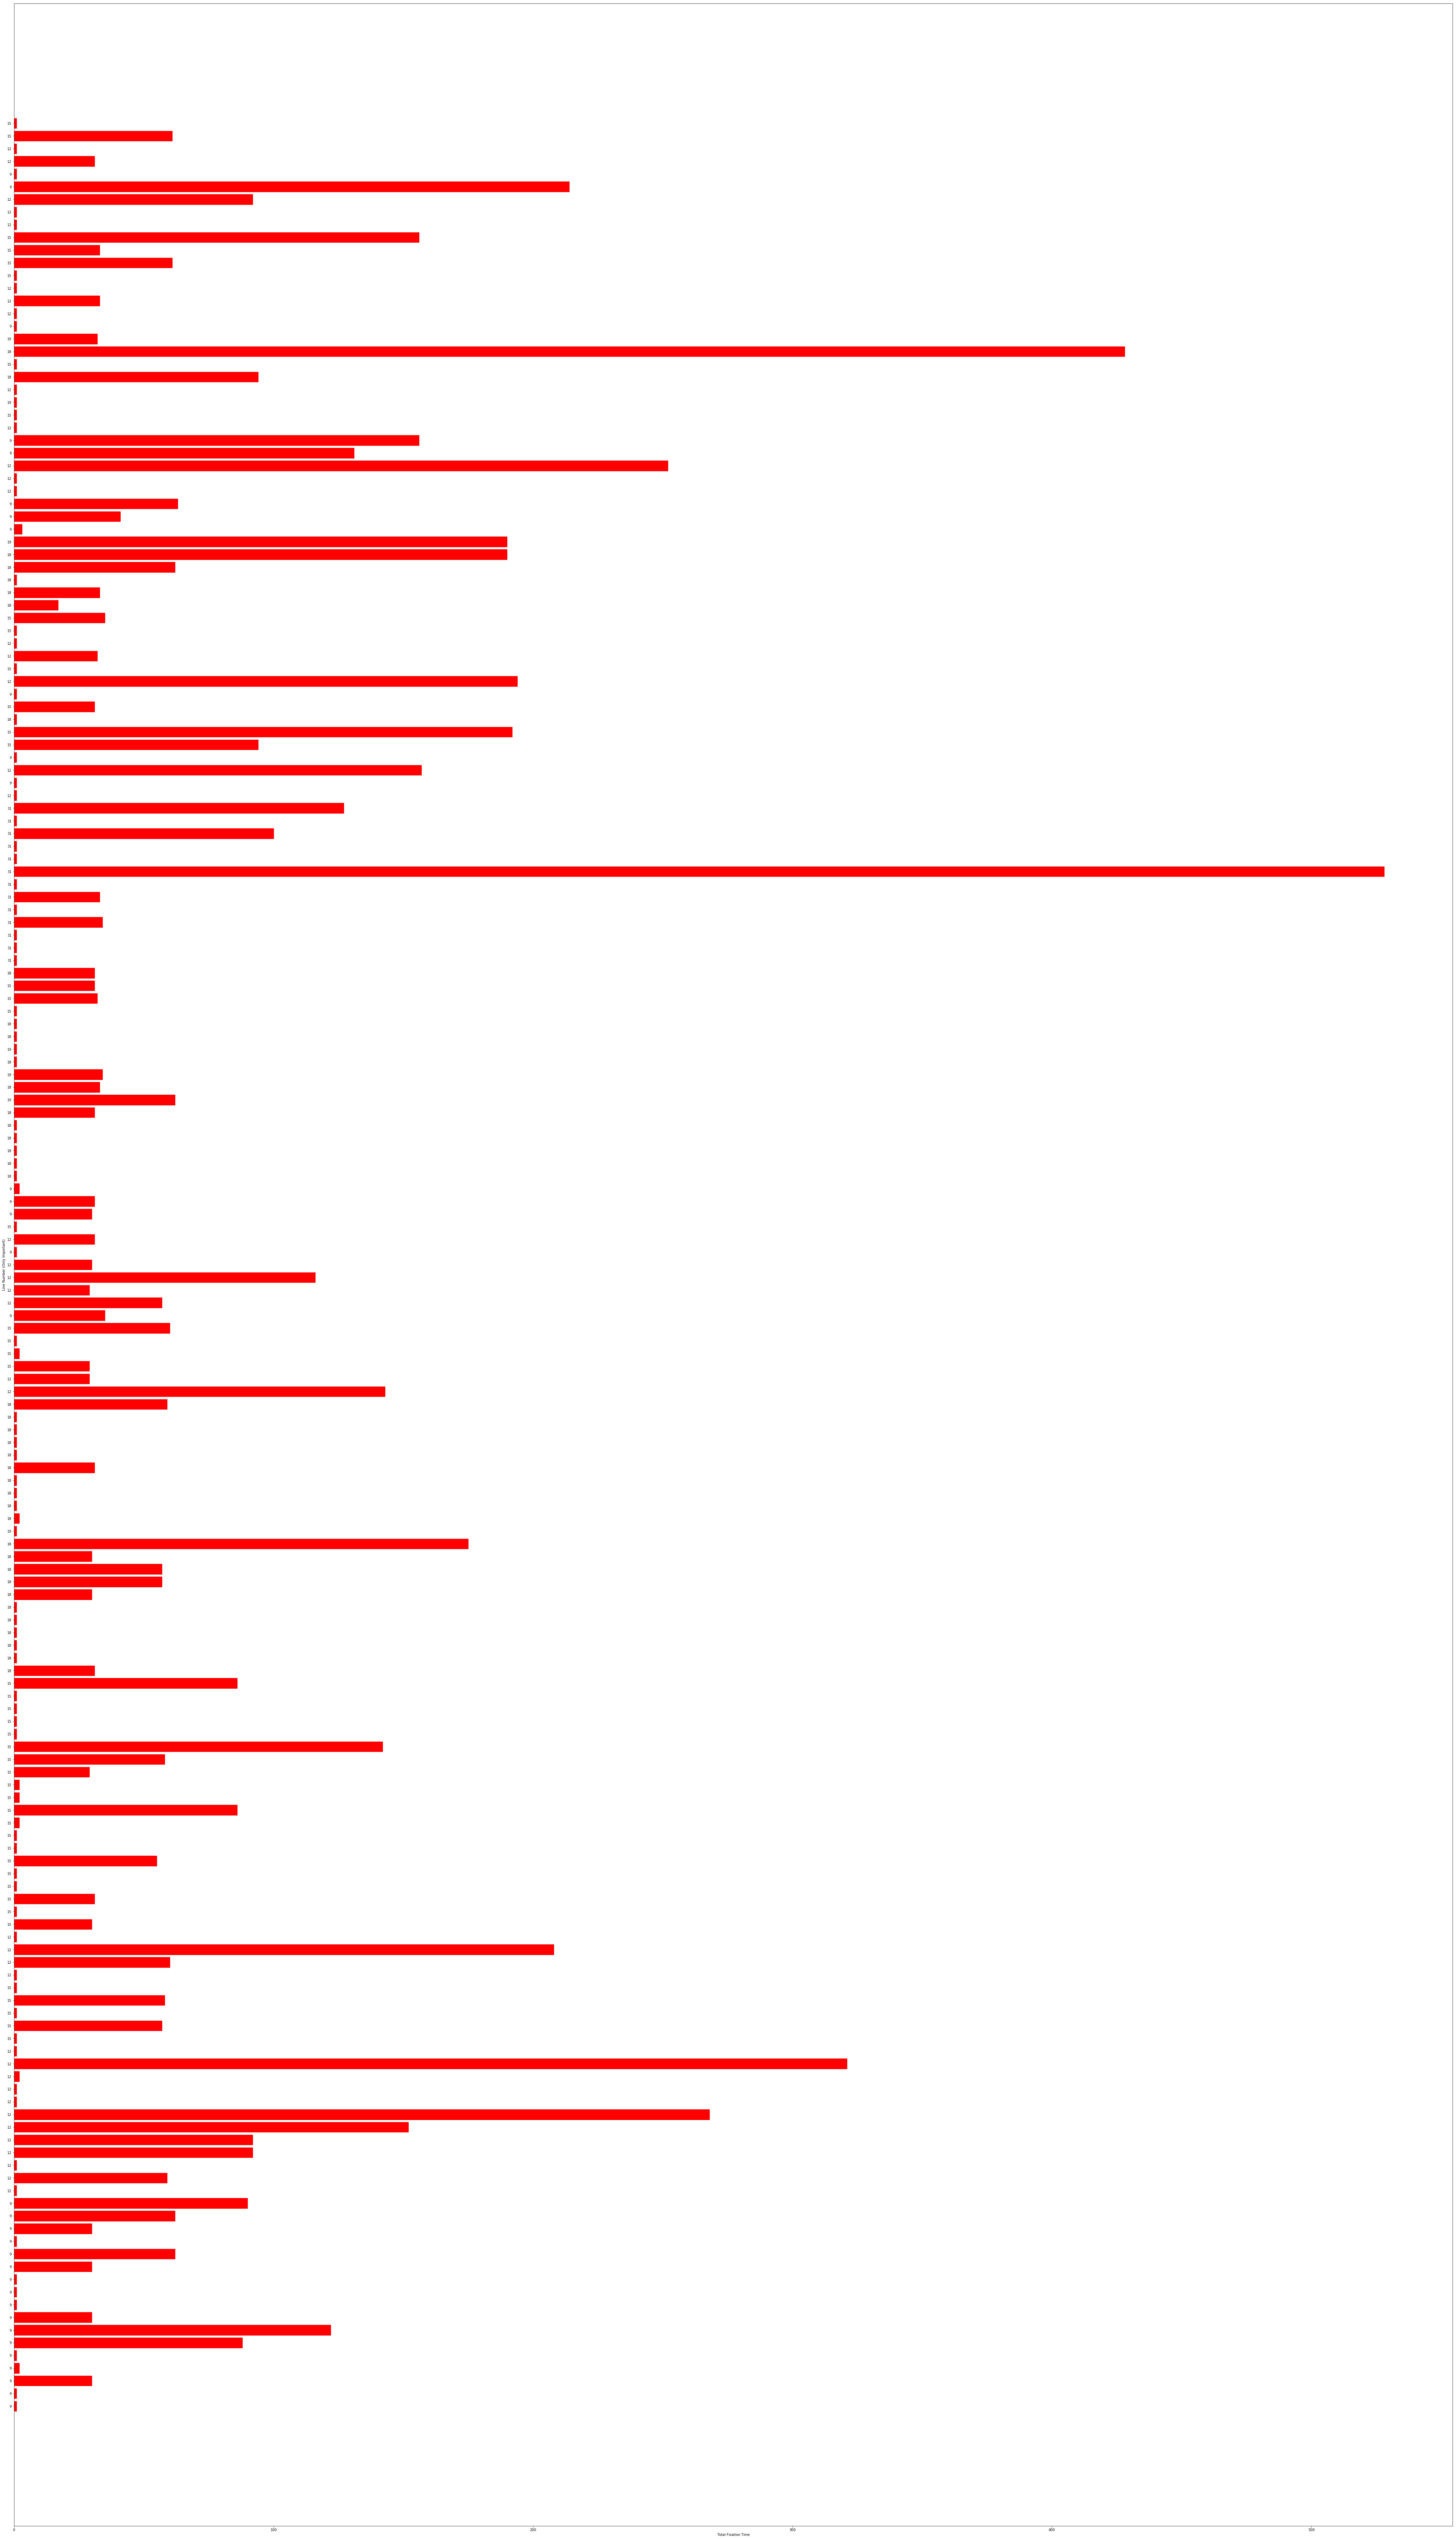

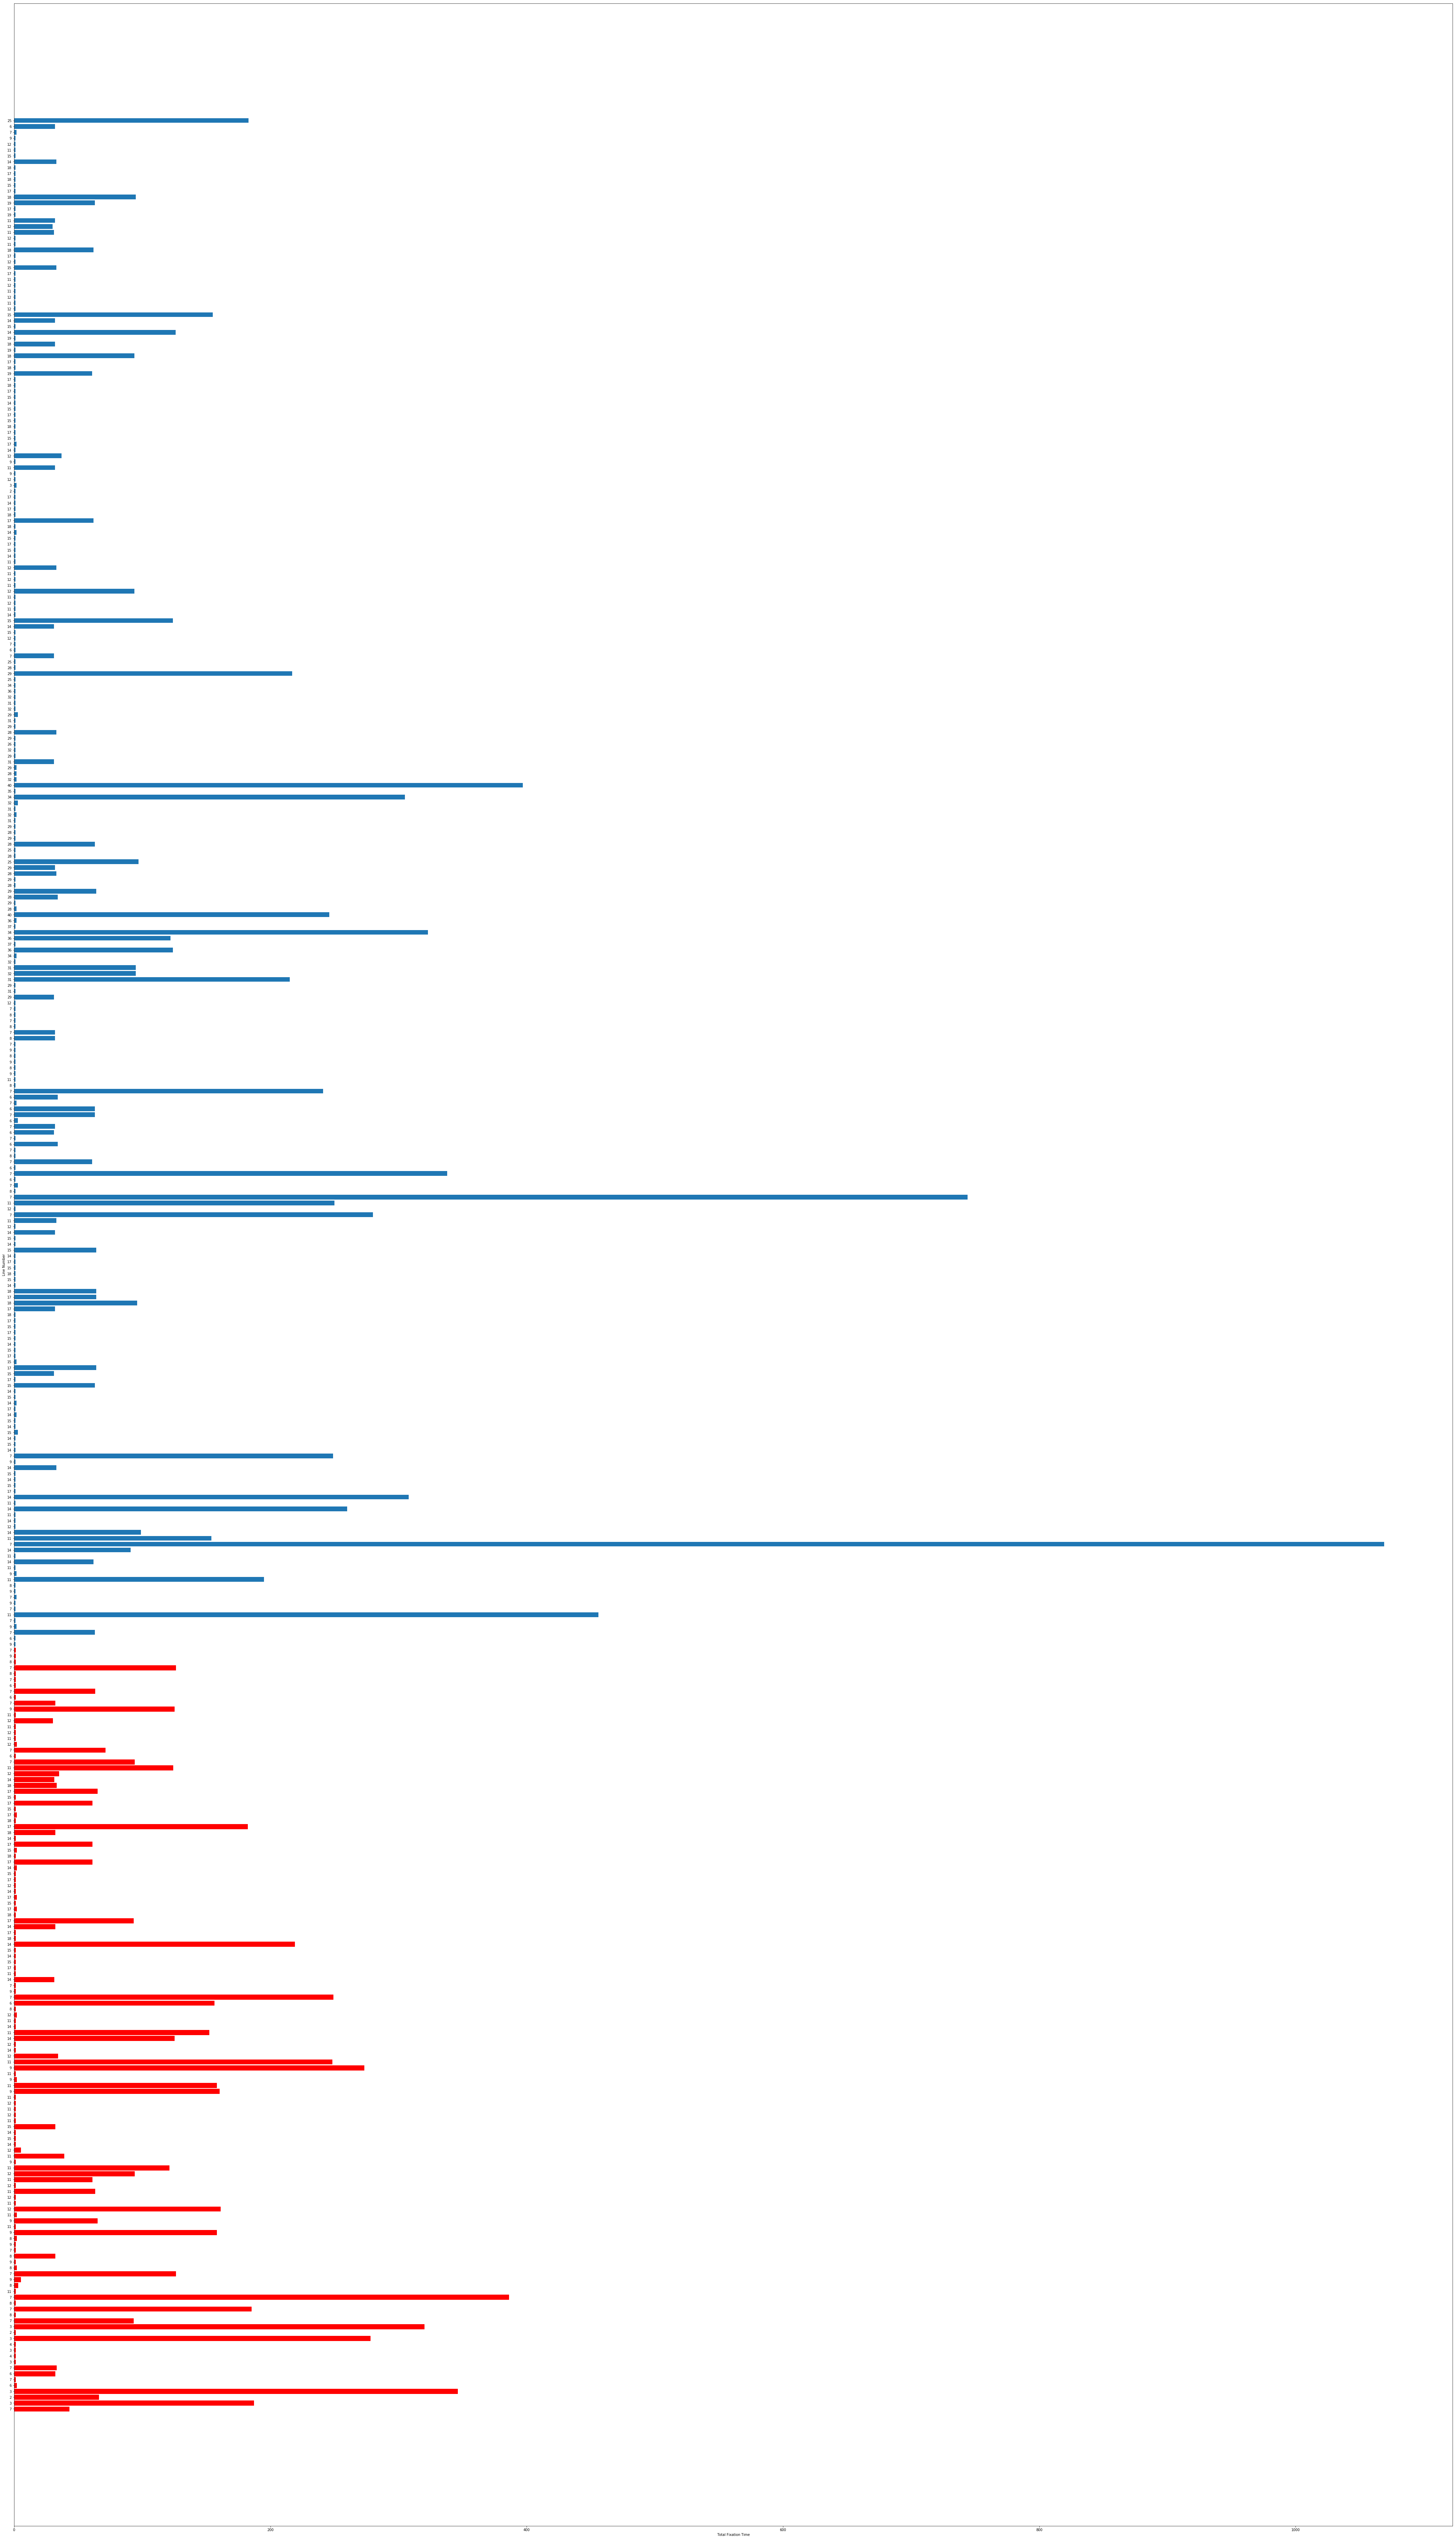

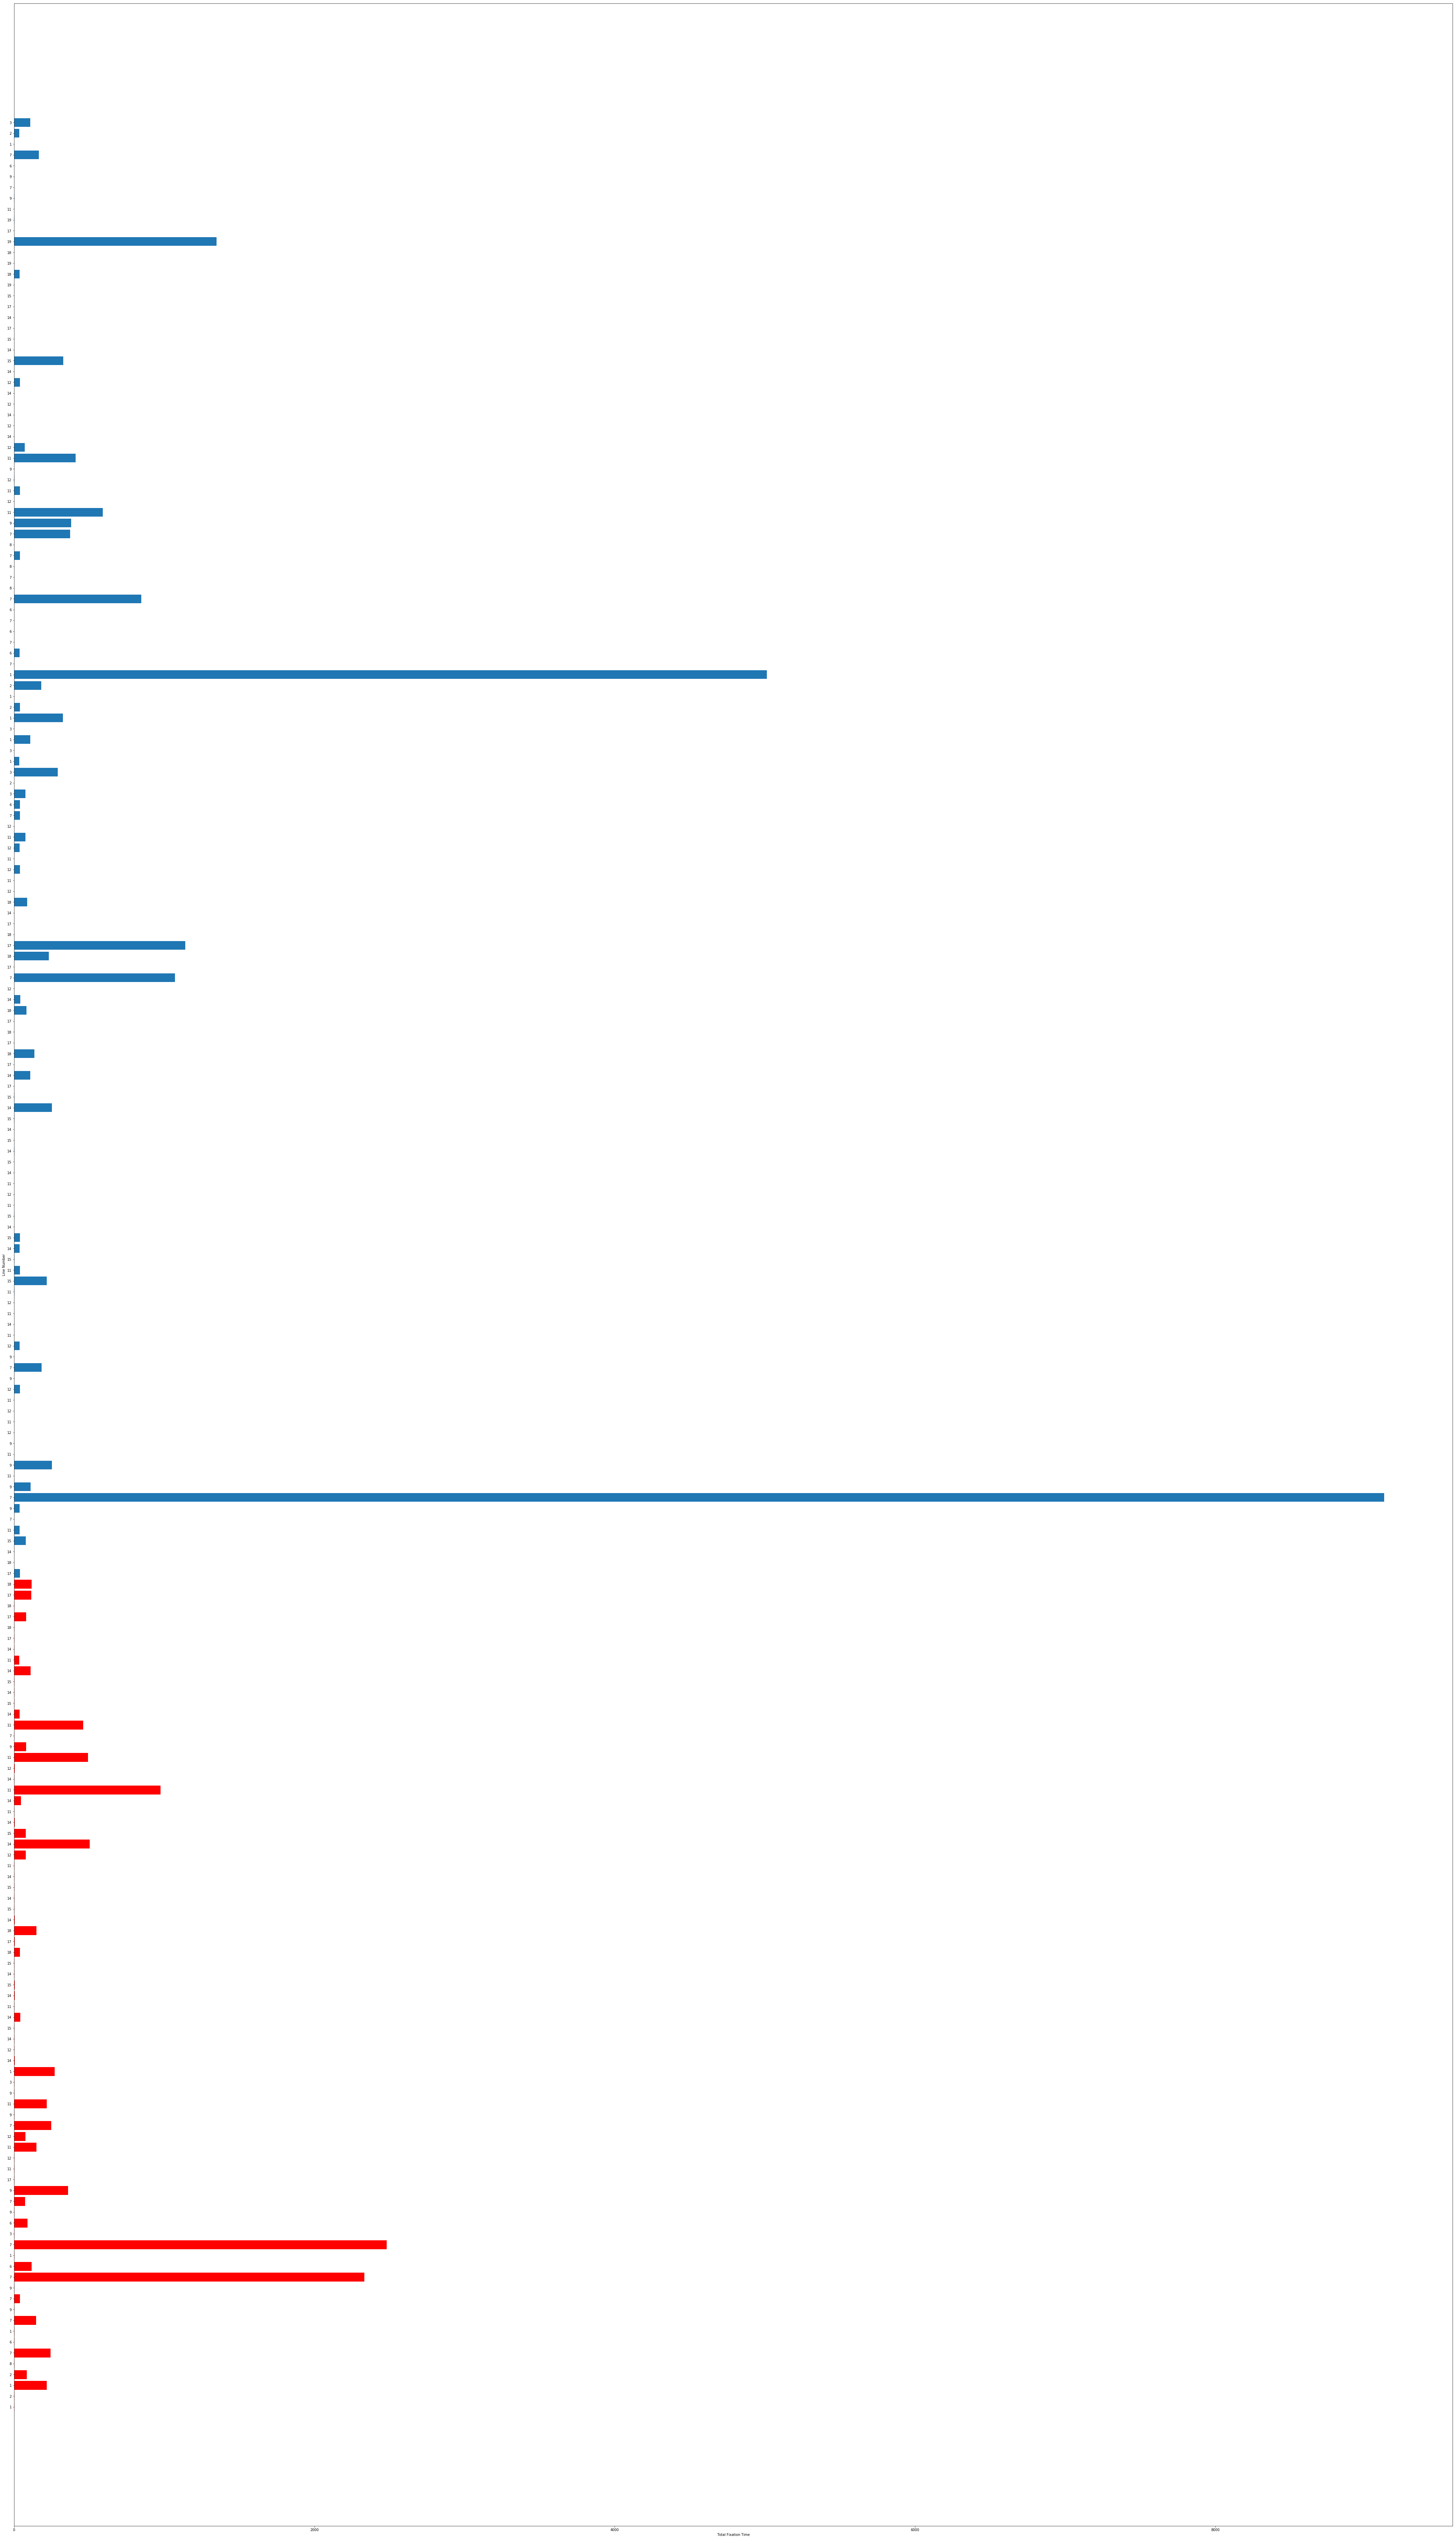

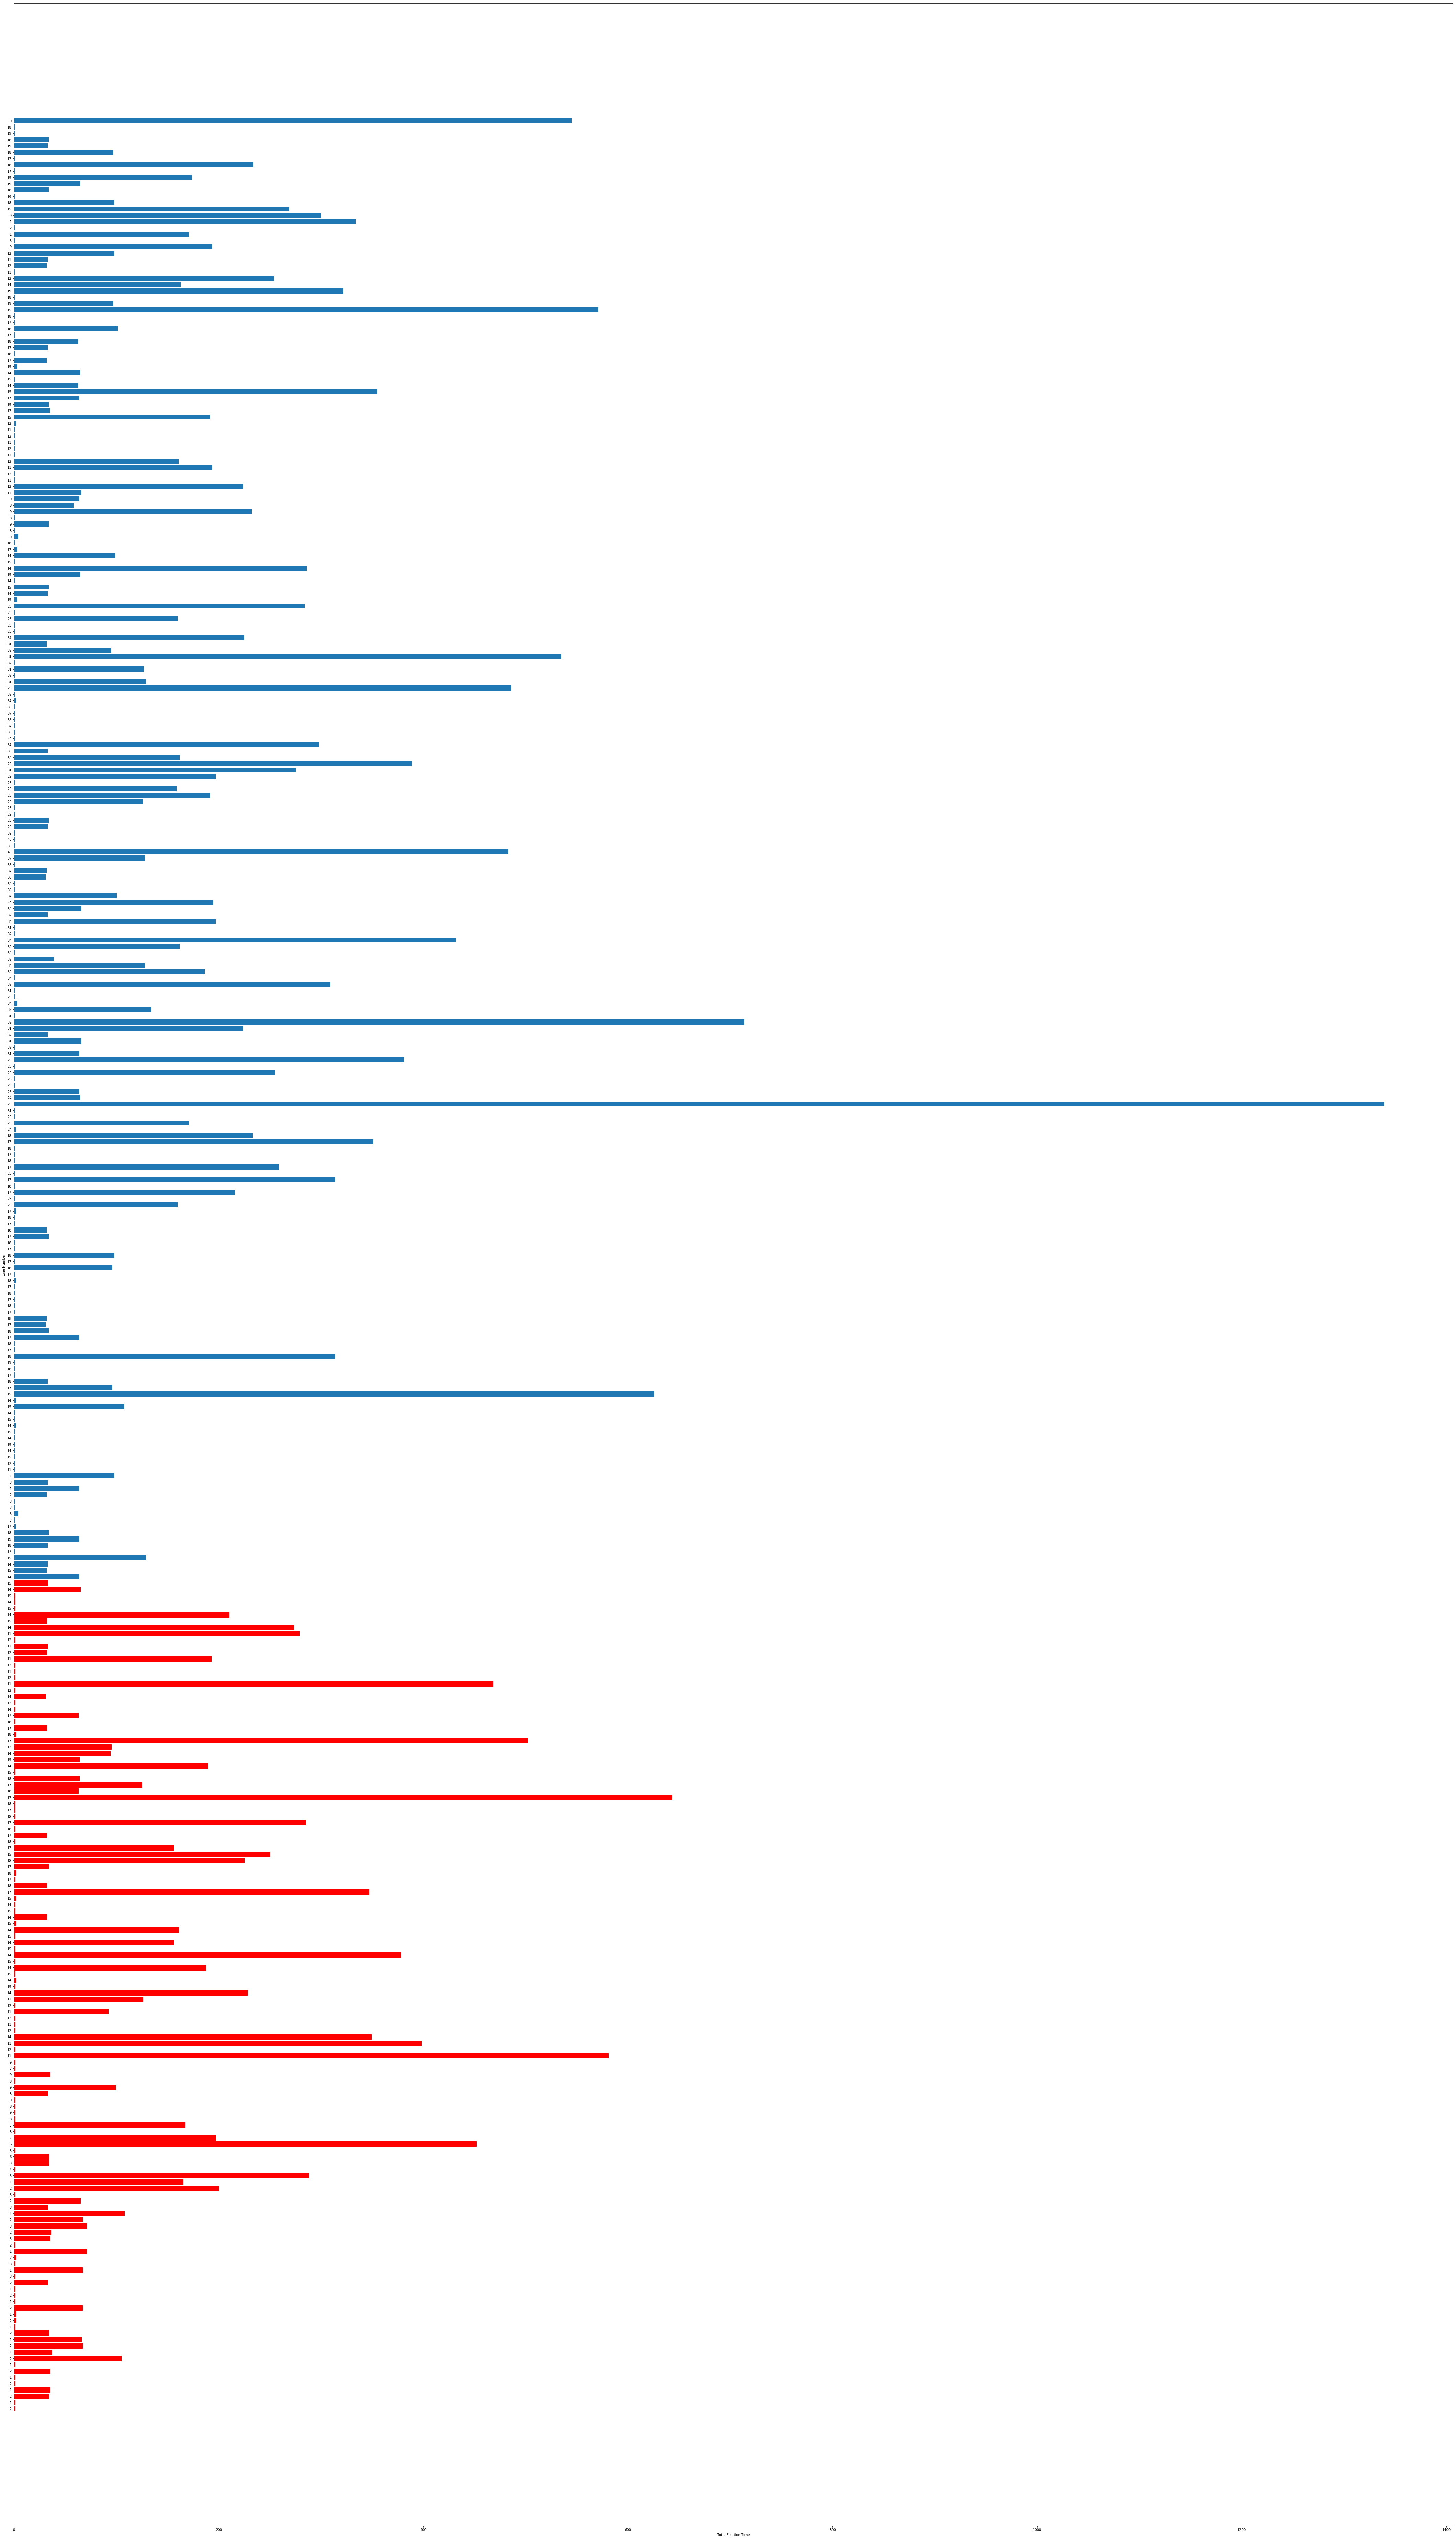

In [17]:
for sub in range(NUM_SUBJECTS):
    plt.figure(figsize=(75,135))
    xs = [x for x,y in prime_gaze_times[sub] if x in IMP_LINES_PRIME]
    ys = [y for x,y in prime_gaze_times[sub] if x in IMP_LINES_PRIME]
    rects = plt.barh(range(len(xs)),ys,tick_label=xs)
    plt.xlabel("Total Fixation Time")
    plt.ylabel("Line Number (Only Important)")
    i = 0
    for x,y in prime_gaze_times[sub]:
        if y == 0:
            continue
        if x in IMP_LINES_PRIME:
            rects[i].set_color('r')
        else:
            continue
        i+=1
    plt.savefig("./plots/gazetimes/prime/gaze_times_prime_imp{}.png".format(sub+1))
for sub in range(NUM_SUBJECTS):
    plt.figure(figsize=(75,135))
    xs = [x for x,y in prime_gaze_times[sub]]
    ys = [y for x,y in prime_gaze_times[sub]]
    plt.xlabel("Total Fixation Time")
    plt.ylabel("Line Number")
    rects = plt.barh(range(len(xs)),ys,tick_label=xs)
    i = 0
    for x,y in prime_gaze_times[sub]:
        if y == 0:
            continue
        if x in IMP_LINES_PRIME:
            rects[i].set_color('r')
        else:
            continue
        i+=1
    plt.savefig("./plots/gazetimes/prime/gaze_times_prime_all{}.png".format(sub+1))

In [ ]:
TOTAL_GAZE_TIMES_ARMSTRONG = []
for sub in range(NUM_SUBJECTS):
    data = np.array(armstrong_data[sub])
    total = 0
    for line in data:
        if line[1] != 0:
            total += line[5] - line[4] + 1
    TOTAL_GAZE_TIMES_ARMSTRONG.append(total)

TOTAL_GAZE_TIMES_PRIME = []
for sub in range(NUM_SUBJECTS):
    data = np.array(prime_data[sub])
    total = 0
    for line in data:
        if line[1] != 0:
            total += line[5] - line[4] + 1
    TOTAL_GAZE_TIMES_PRIME.append(total)

TOTAL_GAZE_TIMES_ARMSTRONG, TOTAL_GAZE_TIMES_PRIME

In [32]:
def gaze_time_imp(imp, data):
    data = np.array(data)
    total = 0
    for line in data:
        if line[1] == imp:
            total += line[5] - line[4] + 1
    return total

In [ ]:
armstrong_gaze_imp = []
armstrong_gaze_imp_perc = []
for sub in range(NUM_SUBJECTS):
    temp = []
    temp_perc = []
    for imp in IMP_LINES_ARMSTRONG:
        gaze_time = gaze_time_imp(imp,armstrong_data[sub])
        temp.append(gaze_time)
        temp_perc.append(gaze_time/TOTAL_GAZE_TIMES_ARMSTRONG[sub])
    armstrong_gaze_imp.append(temp)
    armstrong_gaze_imp_perc.append(temp_perc)
        
armstrong_gaze_imp, armstrong_gaze_imp_perc    

In [ ]:
prime_gaze_imp = []
prime_gaze_imp_perc = []
for sub in range(NUM_SUBJECTS):
    temp = []
    temp_perc = []
    for imp in IMP_LINES_PRIME:
        gaze_time = gaze_time_imp(imp,prime_data[sub])
        temp.append(gaze_time)
        temp_perc.append(gaze_time/TOTAL_GAZE_TIMES_PRIME[sub])
    prime_gaze_imp.append(temp)
    prime_gaze_imp_perc.append(temp_perc)
        
prime_gaze_imp, prime_gaze_imp_perc    

In [ ]:

for sub in range(NUM_SUBJECTS):
    if sub == 1:
        plt.bar(np.arange(len(IMP_LINES_ARMSTRONG))+sub*0.16,np.array(armstrong_gaze_imp_perc[sub])*100,width=0.2,tick_label=IMP_LINES_ARMSTRONG)
    else:
        plt.bar(np.arange(len(IMP_LINES_ARMSTRONG))+sub*0.16,np.array(armstrong_gaze_imp_perc[sub])*100,width=0.2)
    plt.xlabel("Important Line Number")
    plt.ylabel("Percentage of Fixation Time(%)")
    plt.savefig("./plots/gazetimes/armstrong/percent_fixation_imp_arms.png")

In [ ]:
for sub in range(NUM_SUBJECTS):
    if sub == 1:
        plt.bar(np.arange(len(IMP_LINES_PRIME))+sub*0.16,np.array(prime_gaze_imp_perc[sub])*100,width=0.2,tick_label=IMP_LINES_PRIME)
    else:
        plt.bar(np.arange(len(IMP_LINES_PRIME))+sub*0.16,np.array(prime_gaze_imp_perc[sub])*100,width=0.2)
    plt.xlabel("Important Line Number")
    plt.ylabel("Percentage of Fixation Time(%)")
    plt.savefig("./plots/gazetimes/prime/percent_fixation_imp_prime.png")

In [ ]:
armstrong_gaze_all = []
armstrong_gaze_all_perc = []
for sub in range(NUM_SUBJECTS):
    temp = []
    temp_perc = []
    for line in np.arange(LINES_ARMSTRONG):
        gaze_time = gaze_time_imp(line+1,armstrong_data[sub])
        temp.append(gaze_time)
        temp_perc.append(gaze_time/TOTAL_GAZE_TIMES_ARMSTRONG[sub])
    armstrong_gaze_all.append(temp)
    armstrong_gaze_all_perc.append(temp_perc)
        
armstrong_gaze_all, armstrong_gaze_all_perc   

In [ ]:
prime_gaze_all = []
prime_gaze_all_perc = []
for sub in range(NUM_SUBJECTS):
    temp = []
    temp_perc = []
    for line in np.arange(LINES_PRIME):
        gaze_time = gaze_time_imp(line+1,prime_data[sub])
        temp.append(gaze_time)
        temp_perc.append(gaze_time/TOTAL_GAZE_TIMES_PRIME[sub])
    prime_gaze_all.append(temp)
    prime_gaze_all_perc.append(temp_perc)
        
prime_gaze_all, prime_gaze_all_perc 

In [ ]:
plt.figure(figsize=(30,30))
for sub in range(NUM_SUBJECTS):
    if sub == 1:
        plt.bar(np.arange(LINES_ARMSTRONG)+sub*0.16,np.array(armstrong_gaze_all_perc[sub])*100,width=0.2,tick_label=np.arange(LINES_ARMSTRONG)+1)
    else:
        plt.bar(np.arange(LINES_ARMSTRONG)+sub*0.16,np.array(armstrong_gaze_all_perc[sub])*100,width=0.2)
    plt.xlabel("Line Number")
    plt.ylabel("Percentage of Fixation Time(%)")
    plt.savefig("./plots/gazetimes/armstrong/percent_fixation_all_arms.png")

NOTE: Line Numbers 22 and 24 (which have very high fixation % but NOT marked important) are the printf statements which have text data written inside them.

In [ ]:
plt.figure(figsize=(30,30))
for sub in range(NUM_SUBJECTS):
    if sub == 1:
        plt.bar(np.arange(LINES_PRIME)+sub*0.16,np.array(prime_gaze_all_perc[sub])*100,width=0.2,tick_label=np.arange(LINES_PRIME)+1)
    else:
        plt.bar(np.arange(LINES_PRIME)+sub*0.16,np.array(prime_gaze_all_perc[sub])*100,width=0.2)
    plt.xlabel("Line Number")
    plt.ylabel("Percentage of Fixation Time(%)")
    plt.savefig("./plots/gazetimes/prime/percent_fixation_all_prime.png")

NOTE: Line Numbers 7 (which have very high fixation % but NOT marked important) is a printf statement which has text data written inside it.

In [7]:
import os
base_dir = "./data/datafiles_V3/"
CODE_NUMS = [5,24,32]
data = {5 : [], 24 : [], 32 : []}
for code in CODE_NUMS:
    for x in os.listdir(base_dir + str(code)):
        data[code].append(pd.read_excel(base_dir + str(code) + "/" + x))

In [8]:
LINES = {5 : 21, 24 : 24, 32 : 35}
def init_map(m,tp=0):
    #tp -> 0 - [] array, 1 - int (0)
    for code in CODE_NUMS:
        if tp == 0:
            m[code] = []
        elif tp == 1:
            m[code] = 0
    return m

In [9]:
sequence_maps = {}
sequence_maps = init_map(sequence_maps)
for code in CODE_NUMS:
    for sub in range(len(data[code])):
        sequence_maps[code].append(get_seq_map(data[code][sub]))

In [10]:
tok_analysis = {}
tok_analysis = init_map(tok_analysis)

for code in CODE_NUMS:
    for m, total in sequence_maps[code]:
        line_ct = np.zeros(LINES[code])
        for k,v in m.items():
            line_ct[k] = v/total
        tok_analysis[code].append(line_ct)

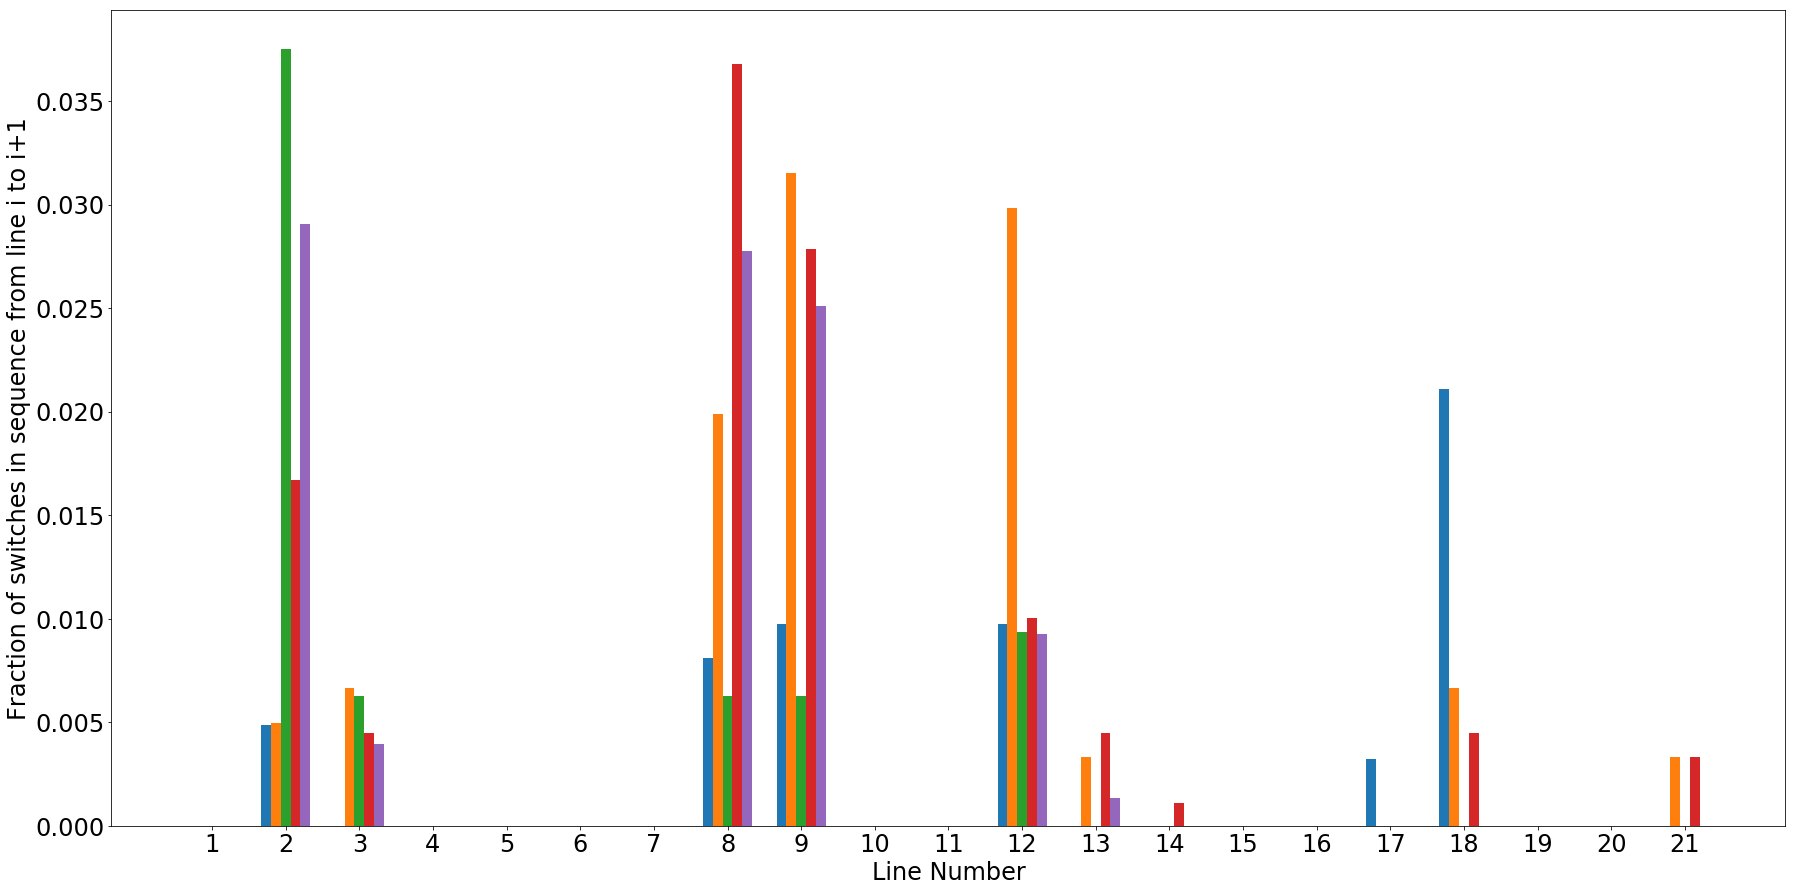

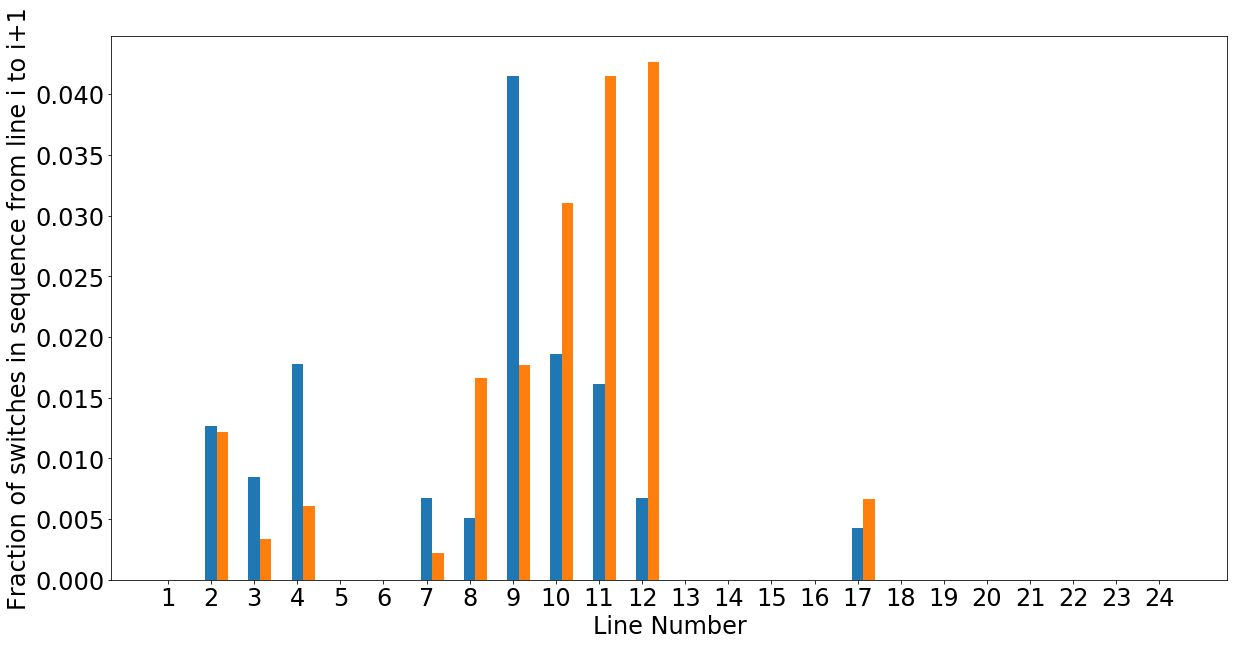

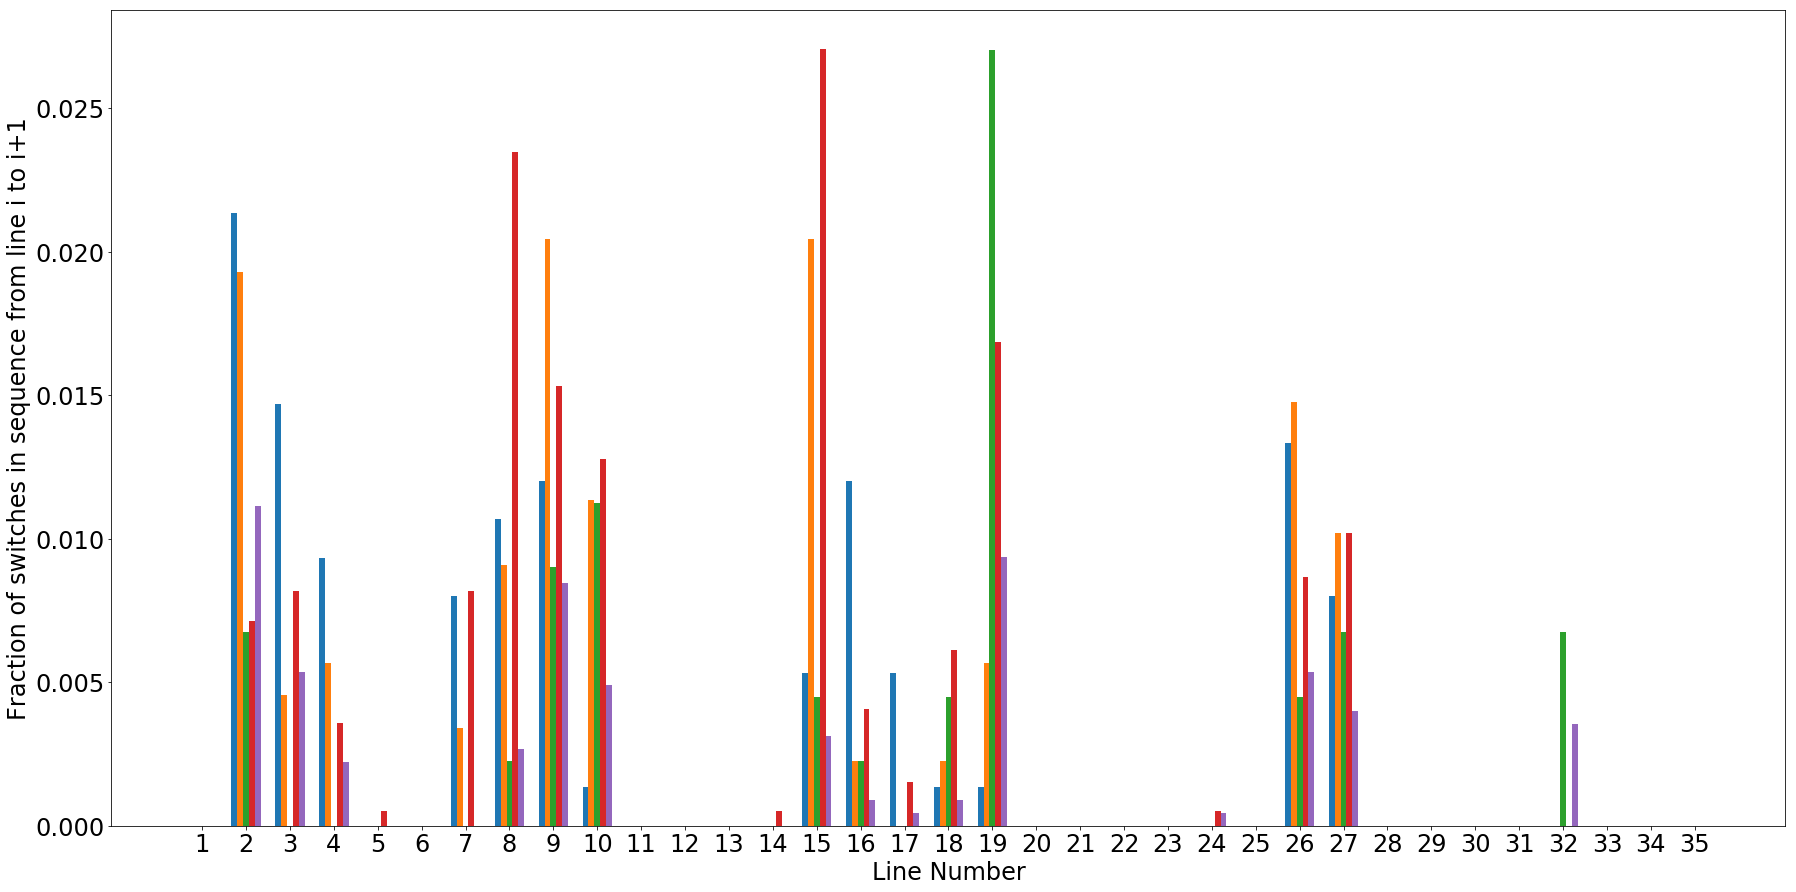

In [50]:
font = {'size'   : 24}
plt.rc('font', **font)
PLOT_BLACKLISTED = {5 : [1,4,7], 24: [], 32 : [1,4,5]}
FIGSIZES = {5 : (30,15), 24 : (20,10), 32 : (30,15)}
plt.show()
for code in CODE_NUMS:
    plt.figure(figsize=FIGSIZES[code])
    num_subs = len(data[code]) - len(PLOT_BLACKLISTED[code])
    ct = 0
    for sub in range(len(data[code])):
        if sub in PLOT_BLACKLISTED[code]:
            continue
        #plt.bar(np.arange(LINES[code])+sub*0.2,armstrong_tok_analysis[sub],width=0.2)
        if ct == int((num_subs-1)/2):
            plt.bar(np.arange(LINES[code])+ct*(0.8/(num_subs + 1)),np.array(tok_analysis[code][sub]),width=(0.8/(num_subs + 1)),tick_label=1+np.arange(LINES[code]))
        else:
            plt.bar(np.arange(LINES[code])+ct*(0.8/(num_subs + 1)),np.array(tok_analysis[code][sub]),width=(0.8/(num_subs + 1)))
        ct += 1
    #plt.show()
    plt.xlabel("Line Number")
    plt.ylabel("Fraction of switches in sequence from line i to i+1")
    plt.savefig("./plots/pres/sequence_analysis/code_{}.png".format(code)) 

In [29]:
TOTAL_GAZE_TIMES = {}
TOTAL_GAZE_TIMES = init_map(TOTAL_GAZE_TIMES)
for code in CODE_NUMS:
    for sub in range(len(data[code])):
        myarr = np.array(data[code][sub])
        total = 0
        for line in myarr:
            if line[1] != 0:
                total += line[5] - line[4] + 1
        TOTAL_GAZE_TIMES[code].append(total)

TOTAL_GAZE_TIMES

{5: [13100, 9559, 18976, 6652, 37360, 16682, 9871, 4483],
 24: [69573, 57708],
 32: [23875, 12699, 26175, 3917, 64629, 43800, 51270, 24825]}

In [30]:
IMP_LINES = {5 : [6, 8, 10, 11, 13, 16], 24: [9, 10, 11], 32 : [8, 14, 24, 25, 26]}

In [33]:
gaze_imp_perc = {}
gaze_imp_perc = init_map(gaze_imp_perc)
for code in CODE_NUMS:
    for sub in range(len(data[code])):
        temp_perc = []
        for imp in IMP_LINES[code]:
            gaze_time = gaze_time_imp(imp,data[code][sub])
            temp_perc.append(gaze_time/TOTAL_GAZE_TIMES[code][sub])
        gaze_imp_perc[code].append(temp_perc)
        

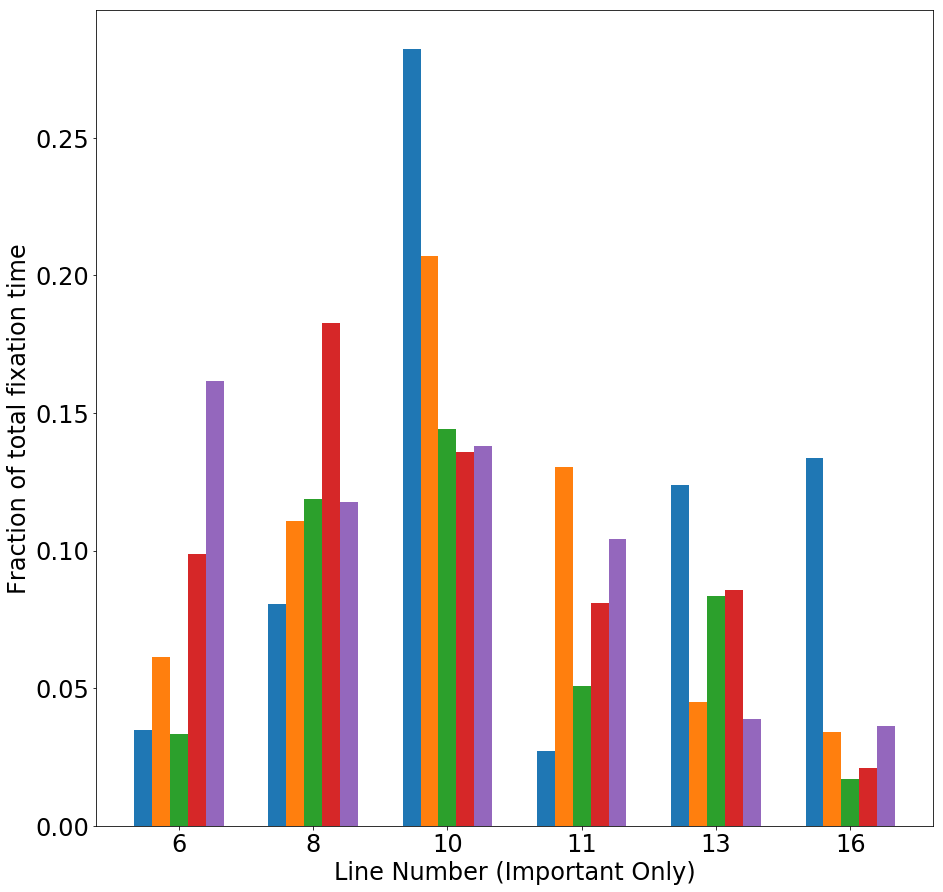

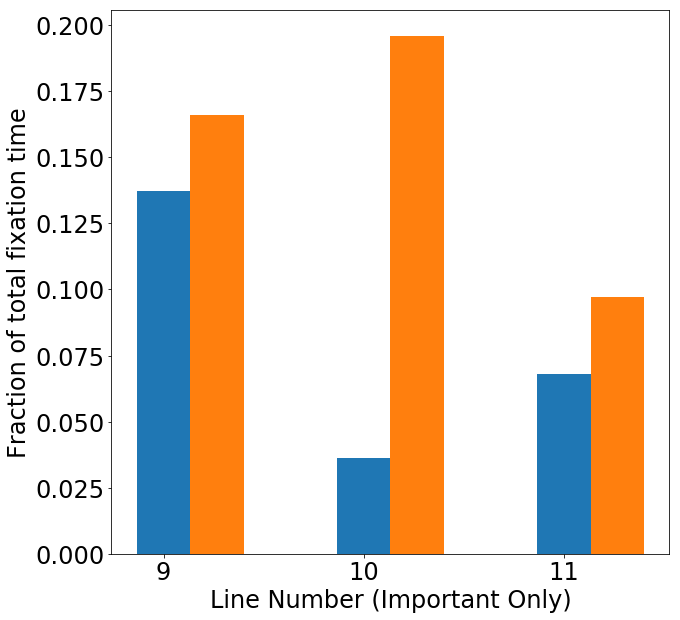

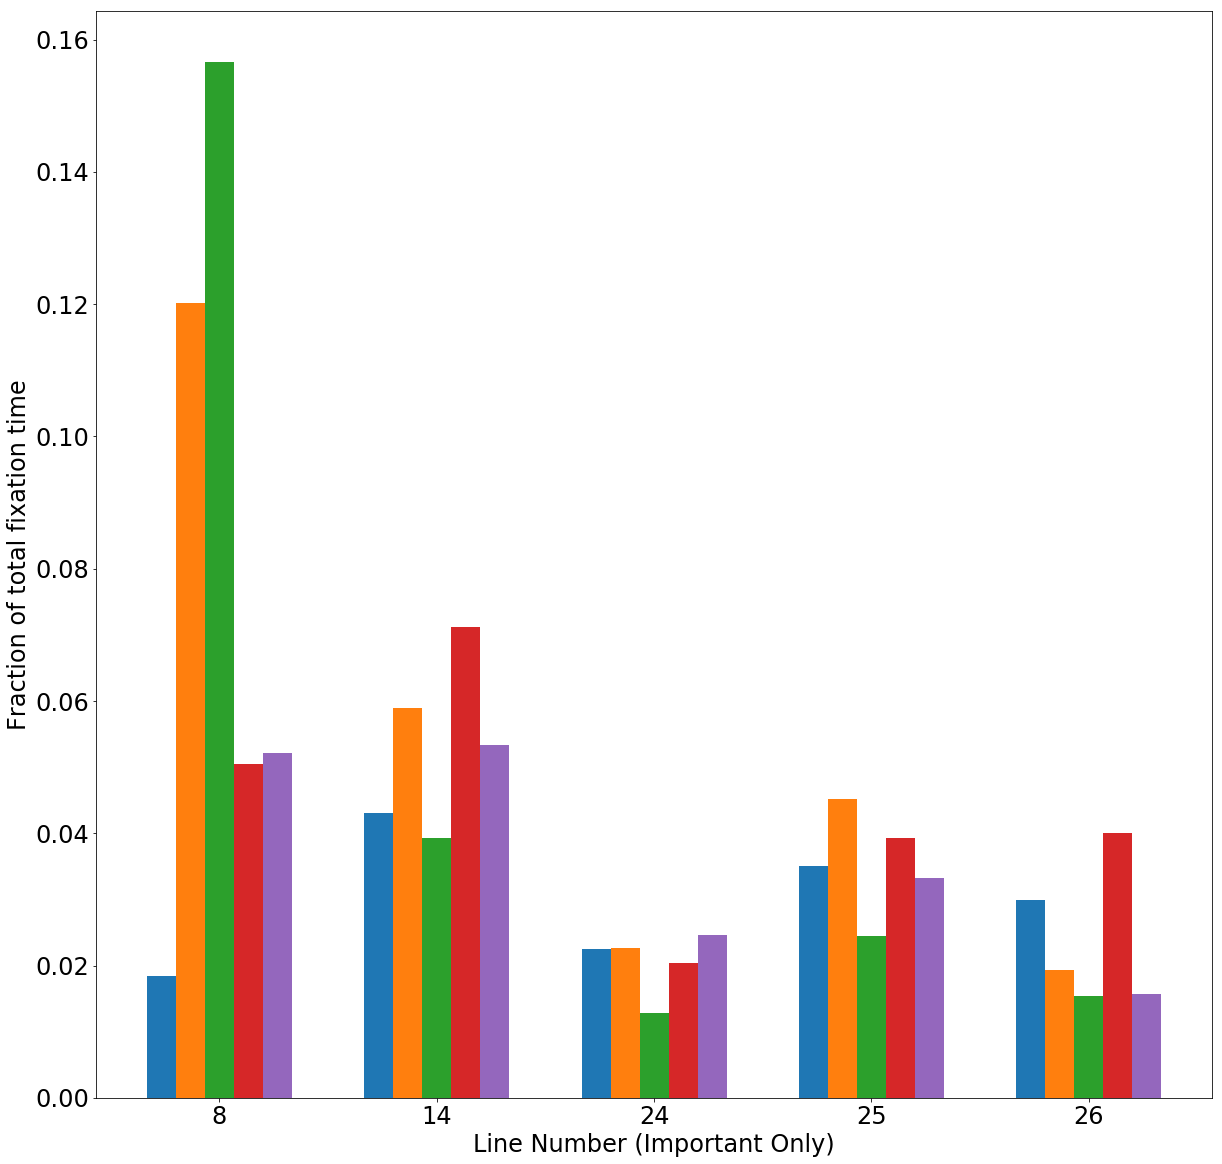

In [49]:
font = {'size'   : 24}
plt.rc('font', **font)
PLOT_BLACKLISTED = {5 : [1,6,7], 24: [], 32 : [0,3,5]}
FIGSIZES = {5 : (15,15), 24 : (10,10), 32 : (20,20)}
for code in CODE_NUMS:
    plt.figure(figsize=FIGSIZES[code])
    num_subs = len(data[code]) - len(PLOT_BLACKLISTED[code])
    ct = 0
    for sub in range(len(data[code])):
        if sub in PLOT_BLACKLISTED[code]:
            continue
        if ct == int((num_subs-1)/2):
            plt.bar(np.arange(len(IMP_LINES[code]))+ct*(0.8/(num_subs + 1)),np.array(gaze_imp_perc[code][sub]),width=(0.8/(num_subs + 1)),tick_label=IMP_LINES[code])
        else:
            plt.bar(np.arange(len(IMP_LINES[code]))+ct*(0.8/(num_subs + 1)),np.array(gaze_imp_perc[code][sub]),width=(0.8/(num_subs + 1)))
        ct += 1
    #plt.show()
    plt.xlabel("Line Number (Important Only)")
    plt.ylabel("Fraction of total fixation time")
    plt.savefig("./plots/pres/percent_fixation_imp/code_{}.png".format(code))




In [35]:
gaze_all_perc = {}
gaze_all_perc = init_map(gaze_all_perc)
for code in CODE_NUMS:
    for sub in range(len(data[code])):
        temp_perc = []
        for line in np.arange(LINES[code]):
            gaze_time = gaze_time_imp(line + 1,data[code][sub])
            temp_perc.append(gaze_time/TOTAL_GAZE_TIMES[code][sub])
        gaze_all_perc[code].append(temp_perc)


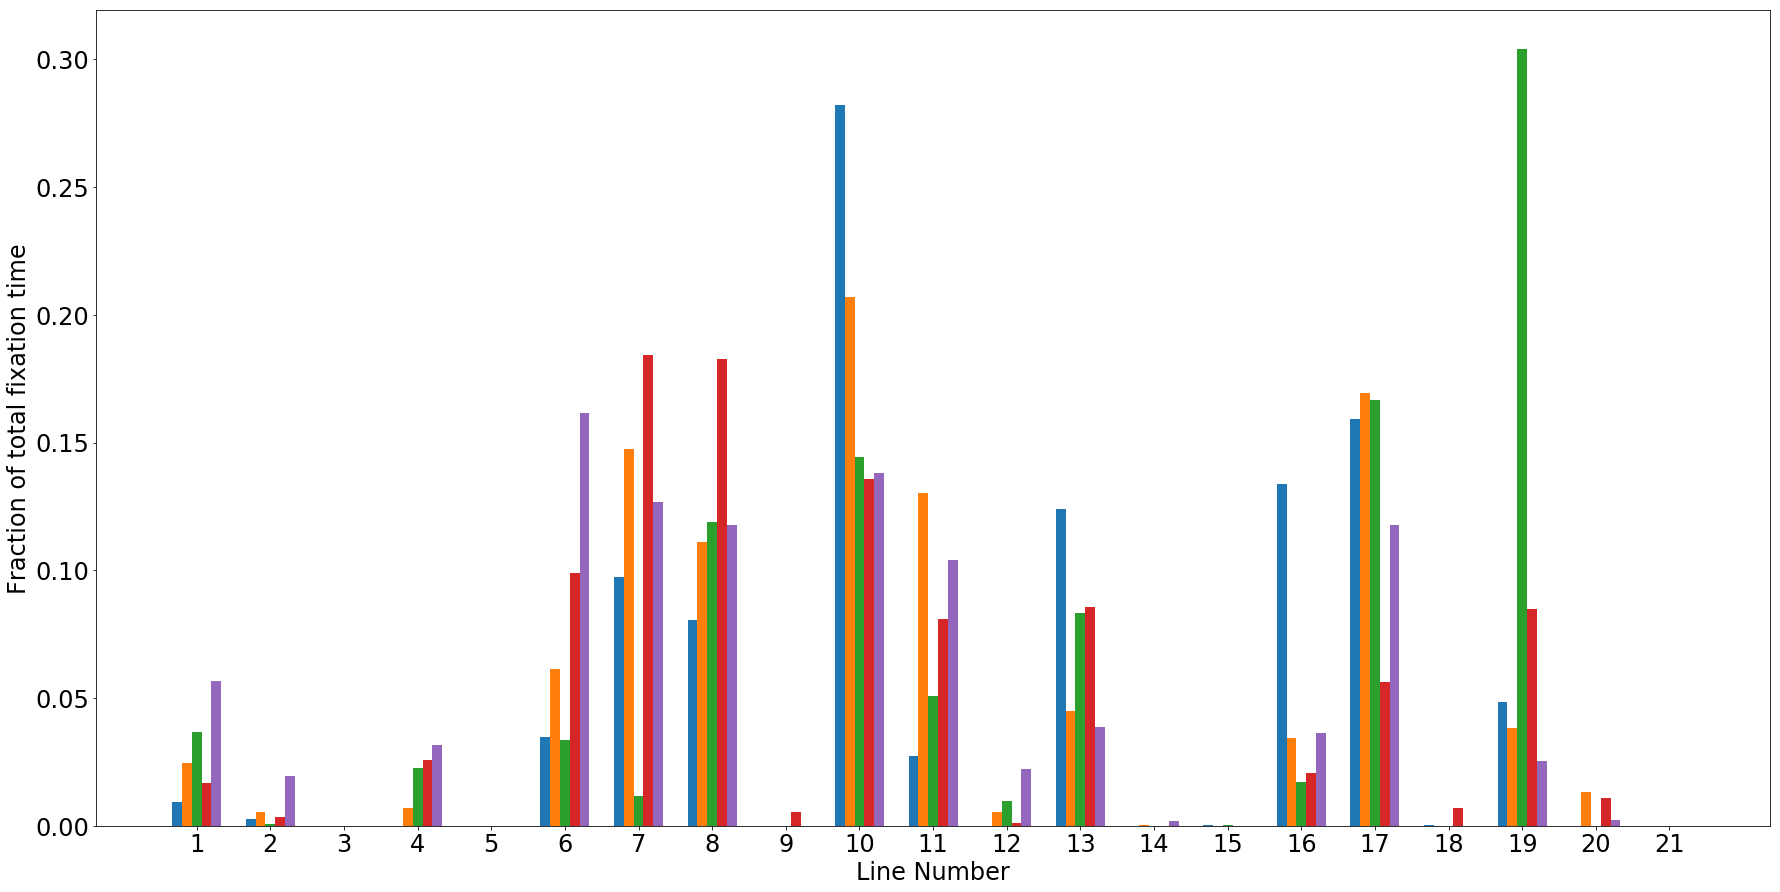

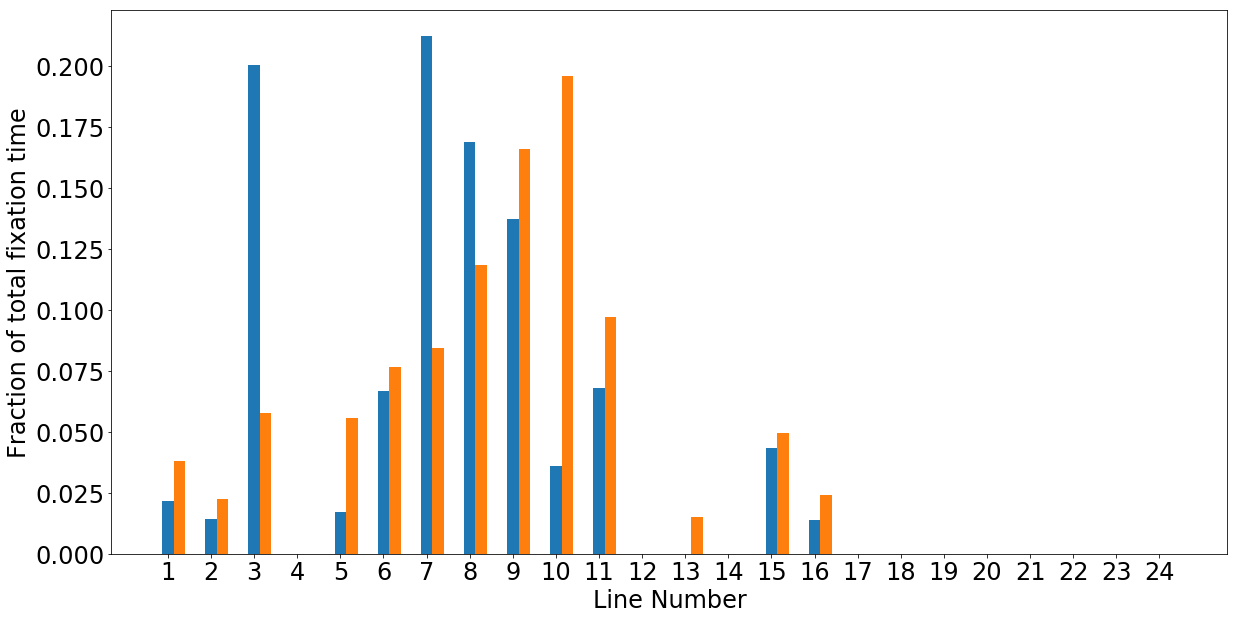

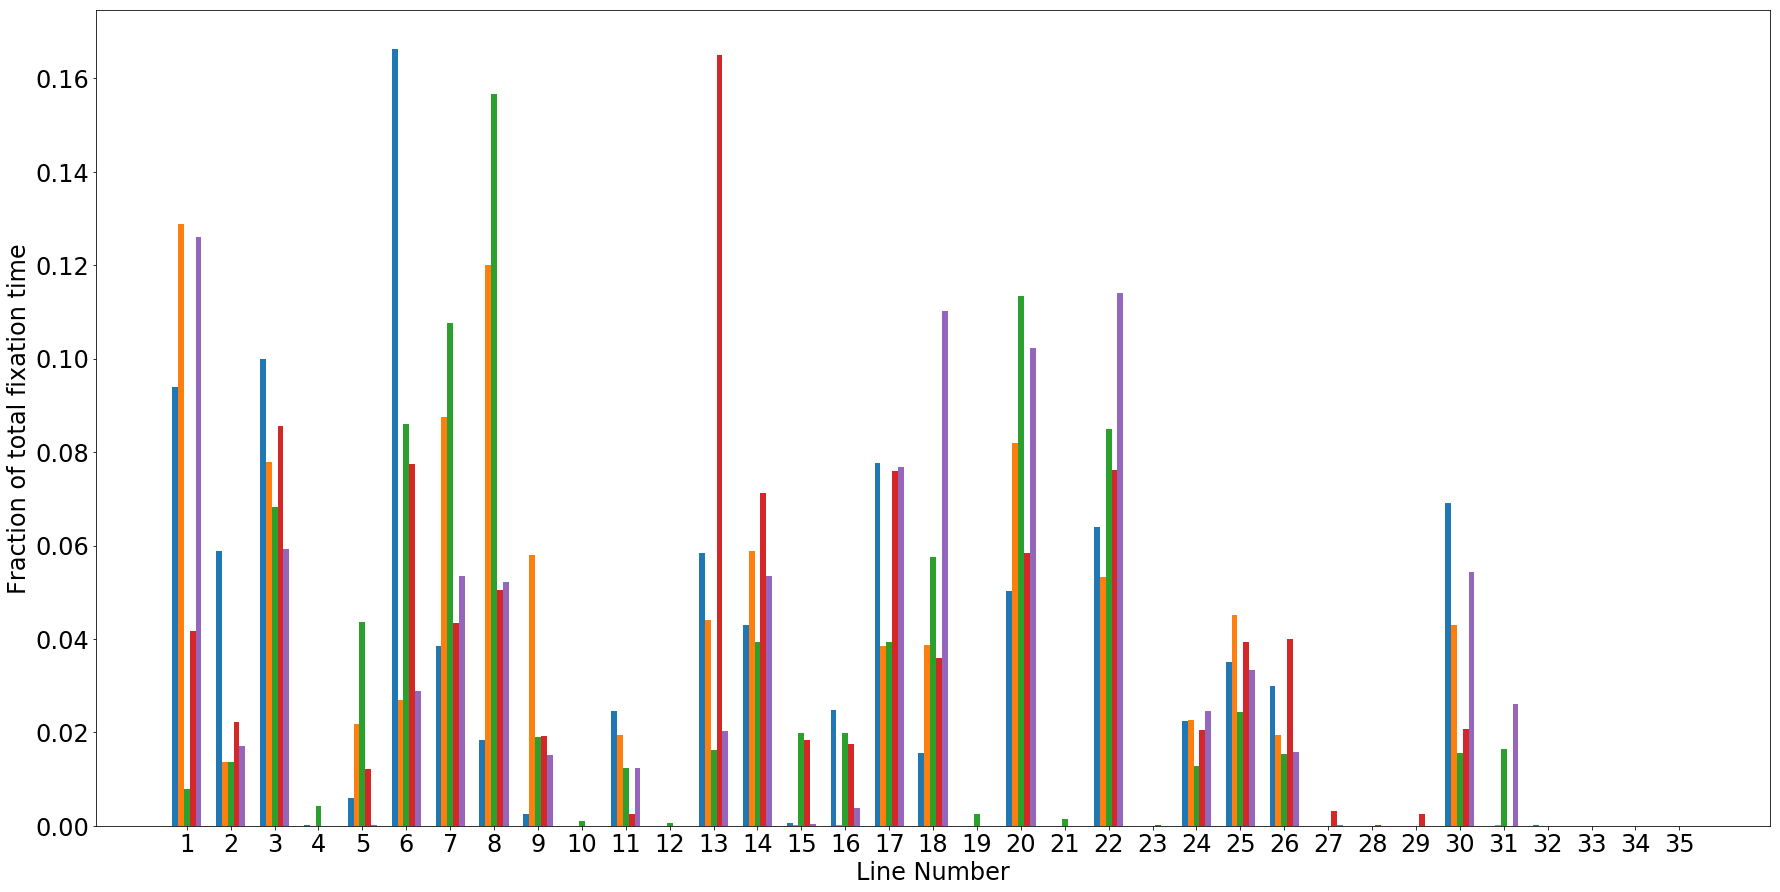

In [48]:
font = {'size'   : 24}
plt.rc('font', **font)
PLOT_BLACKLISTED = {5 : [1,6,7], 24: [], 32 : [0,3,5]}
FIGSIZES = {5 : (30,15), 24 : (20,10), 32 : (30,15)}
for code in CODE_NUMS:
    plt.figure(figsize=FIGSIZES[code])
    num_subs = len(data[code]) - len(PLOT_BLACKLISTED[code])
    ct = 0
    for sub in range(len(data[code])):
        if sub in PLOT_BLACKLISTED[code]:
            continue
        if ct == int((num_subs-1)/2):
            plt.bar(np.arange(LINES[code])+ct*(0.8/(num_subs + 1)),np.array(gaze_all_perc[code][sub]),width=(0.8/(num_subs + 1)),tick_label=np.arange(LINES[code])+1)
        else:
            plt.bar(np.arange(LINES[code])+ct*(0.8/(num_subs + 1)),np.array(gaze_all_perc[code][sub]),width=(0.8/(num_subs + 1)))
        ct += 1
    #plt.show()
    plt.xlabel("Line Number")
    plt.ylabel("Fraction of total fixation time")
    plt.savefig("./plots/pres/percent_fixation_all/code_{}.png".format(code))
